**Group 15**

**Names/NetID/GitHub:**

Shahryar Ahmed (NetID: sahme34, GitHub: shahryarahmed3)

Shoaib Ahmed (NetID: fahme8, GitHub: FnuShoaibAhmed)

Noura Almasri   (NetID: nalma7, GitHub: nalmasri17)

Lorena Castillejo (NetID: lcasti39, GitHub: LorenaCastillejo)

Sakinah Chadrawala (NetID: schadr2, GitHub: sakkk90)

**GitHub Link To Notebook:** https://github.com/shahryarahmed3/Forest-Fires-vs-Climate-Change/blob/8ede2e9659dcd5dc16b988a14b39adb7b5aca37d/CS418_Project.ipynb


# Project introduction: an introduction that discusses the data and related problems that you are investigating.


*   Our project aims to address the issues of climate change and its impact on extreme weather events. The data we have gathered focuses on storms like tornadoes, hail, and wind along with temperature rise and fall with factors that include precipitation, humidity, and CO2. Mainly, we are investigation their trends of occurrences and seeing how each element has evolved over past 5 decades from 1960s to 2020 and choose only 2 years from each decade because data was expensive to download.









In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CS418_GroupProject/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1EiDDOFISdOpLZp0WmEF_B5IEn_STIUF0/CS418_GroupProject


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data: explain how you have prepared your data

- We downloaded data for temperature, humidity and precipitation from this website.     https://www.visualcrossing.com/weather/weather-data-services#


- For CO2, we downloaded the data from  https://ourworldindata.org/co2-emissions
- For hail, wind & tornado, we downloaded data from https://www.spc.noaa.gov/wcm/
Years Used for the Project:
Temperature → 1975 - 1976, 1985-1986, 1995-1996, 2005-2006, 2015 - 2016
Precipitation → 1975 - 1976, 1985-1986, 1995-1996, 2005-2006, 2015 - 2016
Humidity → 1975 - 1976, 1985-1986, 1995-1996, 2005-2006, 2015 - 2016

Overall, we focused on data from the past 5 decades but narrowed it down by choosing 2 years from each decade and concluded to use these years: 1975 - 1976, 1985-1986, 1995-1996, 2005-2006, 2015 - 2016.
# All Data files are available on our GitHub, you can access by going to the github link

# Exploratory data analysis: explain what your data looks like (visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.

Data 1: In the temperature data, the minimum and maximum temperatures for the 1970s were around average with weather that was not too hot or cold. In the years 2015-2016 there was a significant jump in both the maximum and minimum temperatures. Data showed he weather got warmer.

Data 2: In the Hail  data, there is an upward trend in occurrences throughout the 7 decades as seen in the percentage of occurrences when comparing the 1960 decade with the 2010 decade.

Data 3: In the tornado data, in 1960 vs 2010 graph, we can observe that almost all of the states had a significant increase in tornado occurrences in the span on five years.

Data 4: In the Wind data, we can see that there is an upward trend in wind occurrences throughout the 7 decades.

Data 5: In the Humidity data, we can see that in the 1970s the highest humidity was 91.6 but the rest of the year was at 97. Only the decimal points changed. From 1970, it increased significantly but then it stayed the same for the rest of the four decades.

Data 6: In the precipitation data the 1970s both had peaks towards the near spring which is expected. In 2015-2016 the peak is significantly lower than it was in the 1970s.

Data 7: In the data of CO2 emissions, we can clearly see that there is a peak in emissions around the 1970’s and 1980’s, after which there is a notable decline, especially in 2020.





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ML/Stats: Use at least one machine learning or statistical analysis techniques (per Member) to analyze your data, explain what you did, and talk about the inferences you uncovered. Mention the member’s name accordingly.

### Sakina's Contribution

In [ ]:
# sakinah chadrawala's contribution
from scipy.stats import pearsonr

humidity_tornado_corr, p_value_ht = pearsonr(avg_humidities, tornado_averages)
humidity_wind_corr, p_value_hw = pearsonr(avg_humidities, wind_averages)
humidity_hail_corr, p_value_hh = pearsonr(avg_humidities, hail_averages)

print(f'Pearson correlation between average humidity and average tornado counts: {humidity_tornado_corr:.2f}')
print(f'Pearson correlation between average humidity and average wind: {humidity_wind_corr:.2f}')
print(f'Pearson correlation between average humidity and average hail: {humidity_hail_corr:.2f}')

from sklearn.linear_model import LinearRegression
model_tornado = LinearRegression()
model_wind = LinearRegression()
model_hail = LinearRegression()

humidity_reshaped = np.array(avg_humidities).reshape(-1, 1)

model_tornado.fit(humidity_reshaped, tornado_averages)
model_wind.fit(humidity_reshaped, wind_averages)
model_hail.fit(humidity_reshaped, hail_averages)

print(f'Linear regression (Humidity & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print(f'Linear regression  (Humidity & Wind):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print(f'Linear regression  (Humidity & Hail):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')


Pearson correlation between average humidity and average tornado counts: 0.23
Pearson correlation between average humidity and average wind: 0.04
Pearson correlation between average humidity and average hail: 0.06
Linear regression (Humidity & Tornado Counts):
Coefficient: 26.87, Intercept: -710.54
Linear regression  (Humidity & Wind):
Coefficient: 121.98, Intercept: 809.52
Linear regression  (Humidity & Hail):
Coefficient: 172.66, Intercept: -3655.74


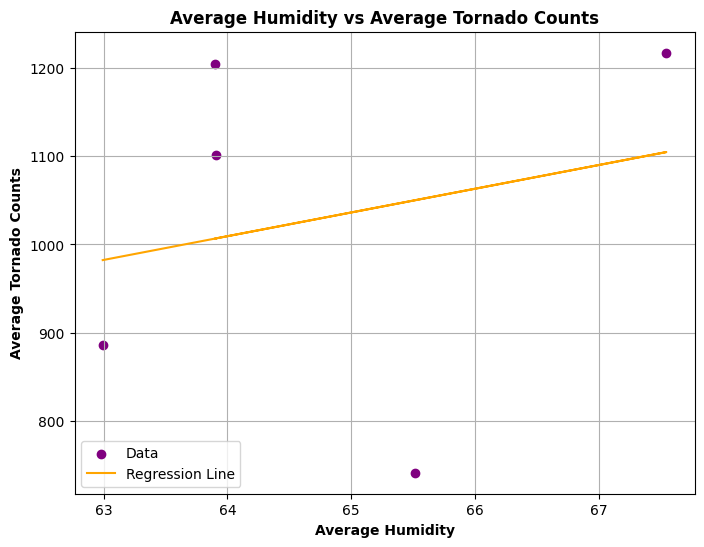

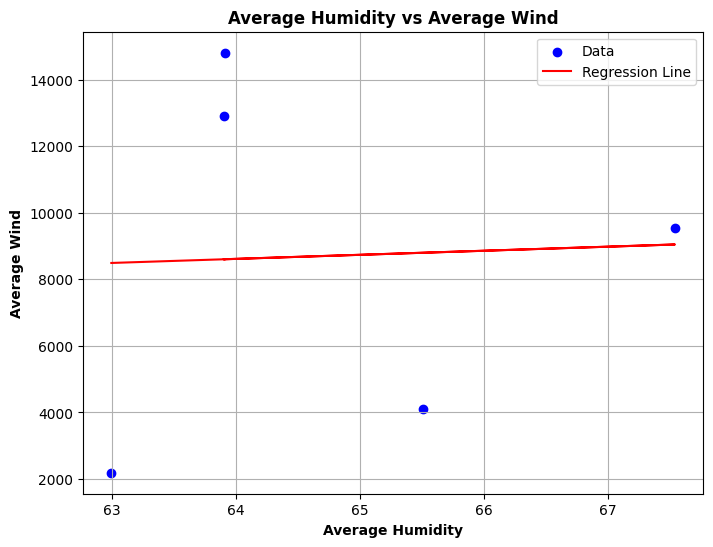

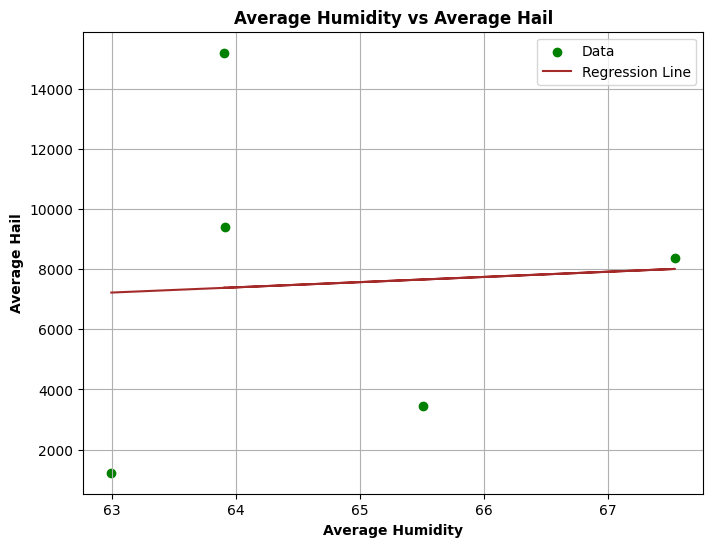

In [ ]:
#(sakinah chadrawala's contribution)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(avg_humidities, tornado_averages, color='purple', label='Data')
ax1.plot(avg_humidities, model_tornado.predict(humidity_reshaped), color='orange', label='Regression Line')
ax1.set_xlabel('Average Humidity', fontweight = "bold")
ax1.set_ylabel('Average Tornado Counts', fontweight = "bold")
ax1.set_title('Average Humidity vs Average Tornado Counts', fontweight = "bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(avg_humidities, wind_averages, color='blue', label='Data')
ax2.plot(avg_humidities, model_wind.predict(humidity_reshaped), color='red', label='Regression Line')
ax2.set_xlabel('Average Humidity', fontweight = "bold")
ax2.set_ylabel('Average Wind', fontweight = "bold")
ax2.set_title('Average Humidity vs Average Wind', fontweight = "bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(avg_humidities, hail_averages, color='green', label='Data')
ax3.plot(avg_humidities, model_hail.predict(humidity_reshaped), color='brown', label='Regression Line')
ax3.set_xlabel('Average Humidity', fontweight = "bold")
ax3.set_ylabel('Average Hail', fontweight = "bold")
ax3.set_title('Average Humidity vs Average Hail', fontweight = "bold")
ax3.legend()
ax3.grid(True)
plt.show()


### Noura's Contribution

In [ ]:
from scipy.stats import pearsonr

Temperature_tornado_corr, p_value_ht = pearsonr(avg_temp_data, yr_tornado_total)
Temperature_wind_corr, p_value_hw = pearsonr(avg_temp_data, yr_wind_total)
Temperature_hail_corr, p_value_hh = pearsonr(avg_temp_data, yr_hail_total)

print(f'Pearson correlation between average Temperature and average tornado counts: {Temperature_tornado_corr:.2f}')
print(f'Pearson correlation between average Temperature and average wind counts: {Temperature_wind_corr:.2f}')
print(f'Pearson correlation between average Temperature and average hail counts: {Temperature_hail_corr:.2f}')

from sklearn.linear_model import LinearRegression
model_tornado = LinearRegression()
model_wind = LinearRegression()
model_hail = LinearRegression()

temp_reshaped = np.array(avg_temp_data).reshape(-1, 1)

model_tornado.fit(temp_reshaped, yr_tornado_total)
model_wind.fit(temp_reshaped, yr_wind_total)
model_hail.fit(temp_reshaped, yr_hail_total)

print(f'Linear regression (Temperature & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print(f'Linear regression  (Temperature & Wind):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print(f'Linear regression  (Temperature & Hail):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')




Pearson correlation between average Temperature and average tornado counts: 0.19
Pearson correlation between average Temperature and average wind counts: 0.62
Pearson correlation between average Temperature and average hail counts: 0.19
Linear regression (Temperature & Tornado Counts):
Coefficient: 3.81, Intercept: 1971.02
Linear regression  (Temperature & Wind):
Coefficient: 335.06, Intercept: 9596.61
Linear regression  (Temperature & Hail):
Coefficient: 102.69, Intercept: 12657.58


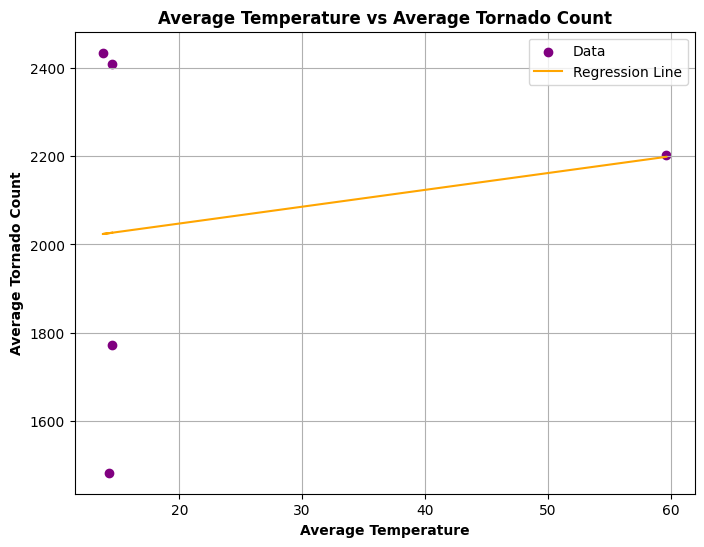

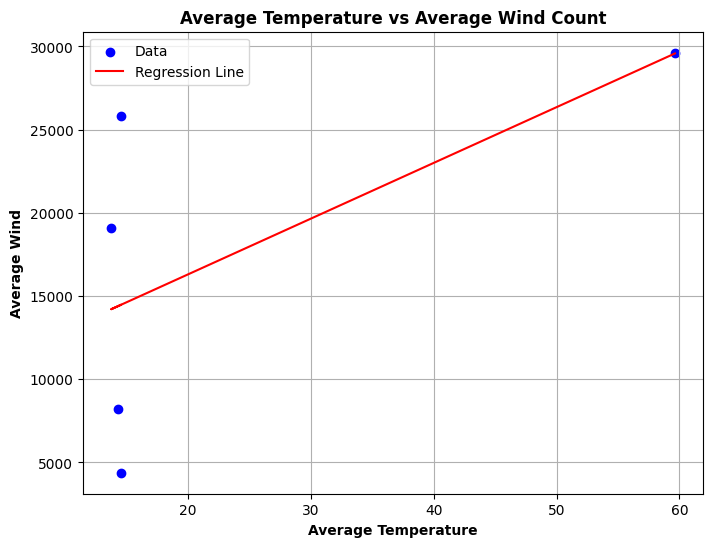

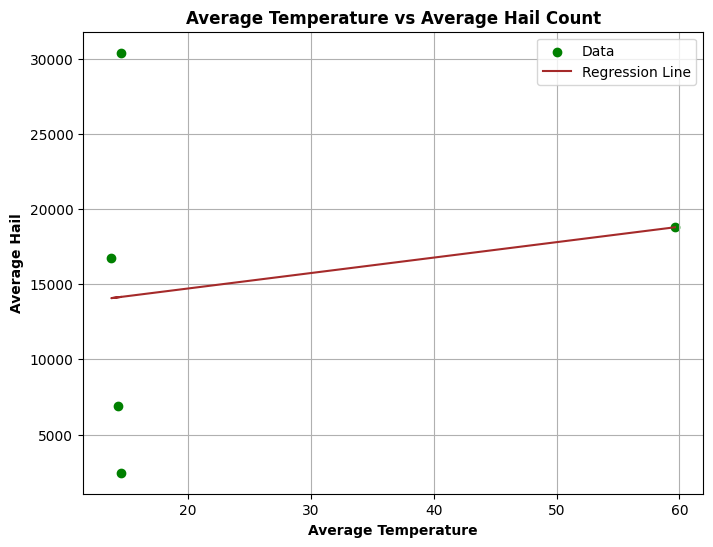

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(avg_temp_data, yr_tornado_total, color='purple', label='Data')
ax1.plot(avg_temp_data, model_tornado.predict(temp_reshaped), color='orange', label='Regression Line')
ax1.set_xlabel('Average Temperature', fontweight = "bold")
ax1.set_ylabel('Average Tornado Count', fontweight = "bold")
ax1.set_title('Average Temperature vs Average Tornado Count', fontweight = "bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(avg_temp_data, yr_wind_total, color='blue', label='Data')
ax2.plot(avg_temp_data, model_wind.predict(temp_reshaped), color='red', label='Regression Line')
ax2.set_xlabel('Average Temperature', fontweight = "bold")
ax2.set_ylabel('Average Wind', fontweight = "bold")
ax2.set_title('Average Temperature vs Average Wind Count', fontweight = "bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(avg_temp_data, yr_hail_total, color='green', label='Data')
ax3.plot(avg_temp_data, model_hail.predict(temp_reshaped), color='brown', label='Regression Line')
ax3.set_xlabel('Average Temperature', fontweight = "bold")
ax3.set_ylabel('Average Hail', fontweight = "bold")
ax3.set_title('Average Temperature vs Average Hail Count', fontweight = "bold")
ax3.legend()
ax3.grid(True)
plt.show()


### Lorena's contribution

In [ ]:
# Lorena
from scipy.stats import pearsonr

humidity_tornado_corr, p_value_ht = pearsonr(precip_list, hail_averages)
humidity_wind_corr, p_value_hw = pearsonr(precip_list, torn_averages)
humidity_hail_corr, p_value_hh = pearsonr(precip_list, wind_averages)

print(f'Pearson correlation between average precipitation and average tornado counts: {humidity_tornado_corr:.2f}')
print(f'Pearson correlation between average precipitation and average wind: {humidity_wind_corr:.2f}')
print(f'Pearson correlation between average precipitation and average hail: {humidity_hail_corr:.2f}')

from sklearn.linear_model import LinearRegression
model_tornado = LinearRegression()
model_wind = LinearRegression()
model_hail = LinearRegression()

precipitation_reshaped = np.array(precip_list).reshape(-1, 1)

model_tornado.fit(precipitation_reshaped, tornado_averages)
model_wind.fit(precipitation_reshaped, wind_averages)
model_hail.fit(precipitation_reshaped, hail_averages)

print(f'Linear regression (Precipitation & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print(f'Linear regression  (Precipitation & Wind):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print(f'Linear regression  (Precipitation & Hail):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')


Pearson correlation between average precipitation and average tornado counts: 0.31
Pearson correlation between average precipitation and average wind: nan
Pearson correlation between average precipitation and average hail: 0.07
Linear regression (Precipitation & Tornado Counts):
Coefficient: 418.15, Intercept: -255.17
Linear regression  (Precipitation & Wind):
Coefficient: 1222.71, Intercept: 4952.33
Linear regression  (Precipitation & Hail):
Coefficient: 5024.94, Intercept: -7916.30


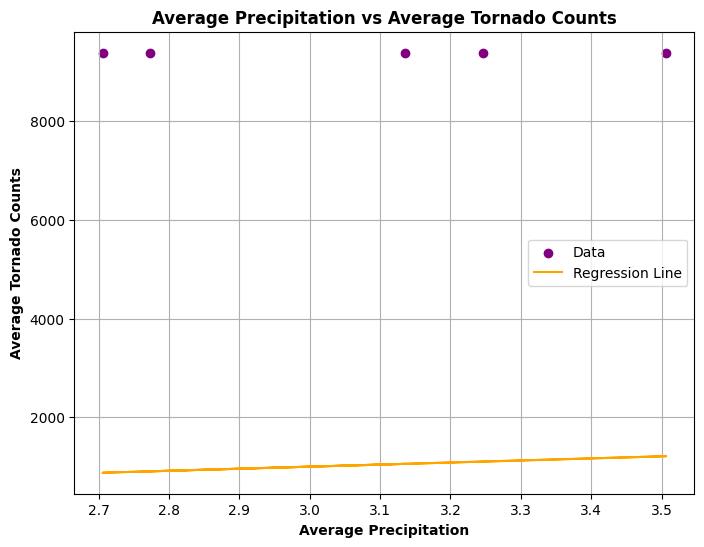

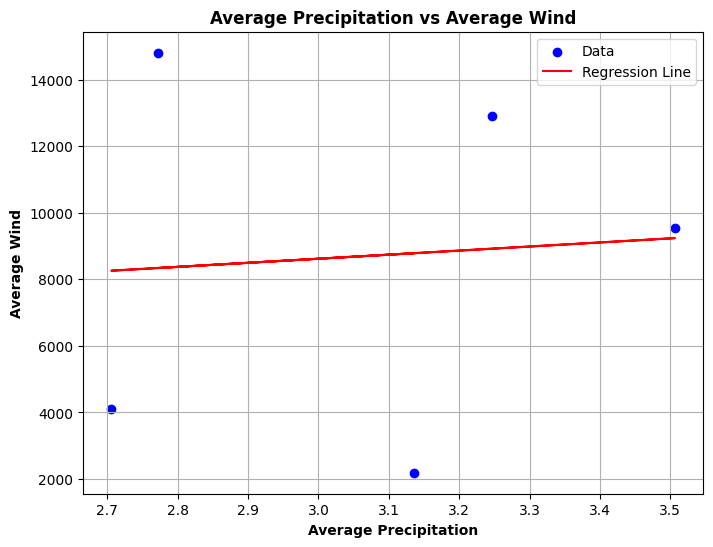

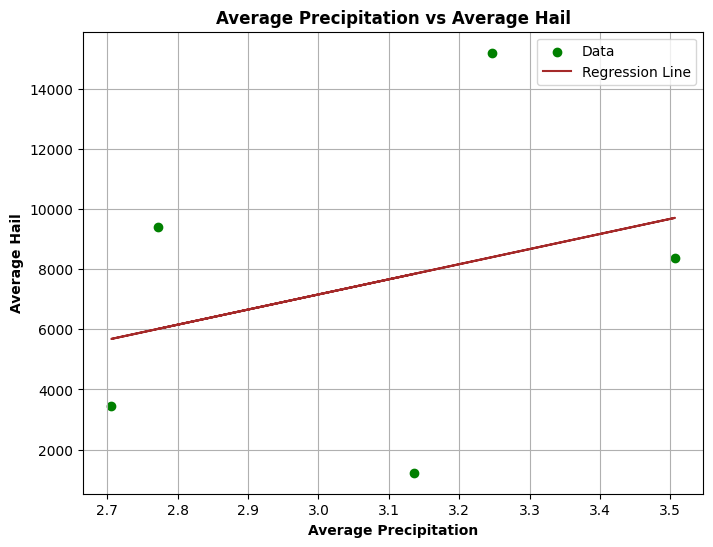

In [ ]:
# contd

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(precip_list, torn_averages, color='purple', label='Data')
ax1.plot(precip_list, model_tornado.predict(precipitation_reshaped), color='orange', label='Regression Line')
ax1.set_xlabel('Average Precipitation', fontweight = "bold")
ax1.set_ylabel('Average Tornado Counts', fontweight = "bold")
ax1.set_title('Average Precipitation vs Average Tornado Counts', fontweight = "bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(precip_list, wind_averages, color='blue', label='Data')
ax2.plot(precip_list, model_wind.predict(precipitation_reshaped), color='red', label='Regression Line')
ax2.set_xlabel('Average Precipitation', fontweight = "bold")
ax2.set_ylabel('Average Wind', fontweight = "bold")
ax2.set_title('Average Precipitation vs Average Wind', fontweight = "bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(precip_list, hail_averages, color='green', label='Data')
ax3.plot(precip_list, model_hail.predict(precipitation_reshaped), color='brown', label='Regression Line')
ax3.set_xlabel('Average Precipitation', fontweight = "bold")
ax3.set_ylabel('Average Hail', fontweight = "bold")
ax3.set_title('Average Precipitation vs Average Hail', fontweight = "bold")
ax3.legend()
ax3.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Assuming you have imported necessary libraries and defined variables

model_tornado = DecisionTreeRegressor()
model_wind = DecisionTreeRegressor()
model_hail = DecisionTreeRegressor()

precipitation_reshaped = np.array(precip_list).reshape(-1, 1)

model_tornado.fit(precipitation_reshaped, tornado_averages)
model_wind.fit(precipitation_reshaped, wind_averages)
model_hail.fit(precipitation_reshaped, hail_averages)

print(f'Decision Tree (Precipitation & Tornado Counts):')
print(f'No. of Nodes: {model_tornado.tree_.node_count}, Max Depth: {model_tornado.tree_.max_depth}')

print(f'Decision Tree (Precipitation & Wind):')
print(f'No. of Nodes: {model_wind.tree_.node_count}, Max Depth: {model_wind.tree_.max_depth}')

print(f'Decision Tree (Precipitation & Hail):')
print(f'No. of Nodes: {model_hail.tree_.node_count}, Max Depth: {model_hail.tree_.max_depth}')


Decision Tree (Precipitation & Tornado Counts):
No. of Nodes: 9, Max Depth: 3
Decision Tree (Precipitation & Wind):
No. of Nodes: 9, Max Depth: 4
Decision Tree (Precipitation & Hail):
No. of Nodes: 9, Max Depth: 3


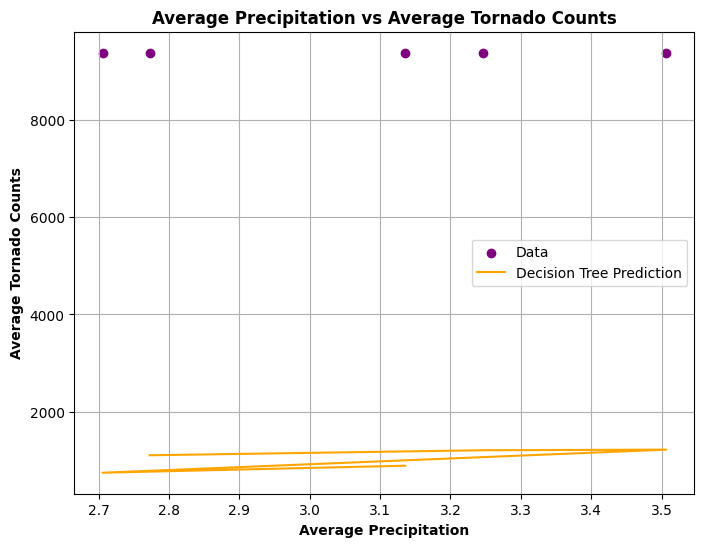

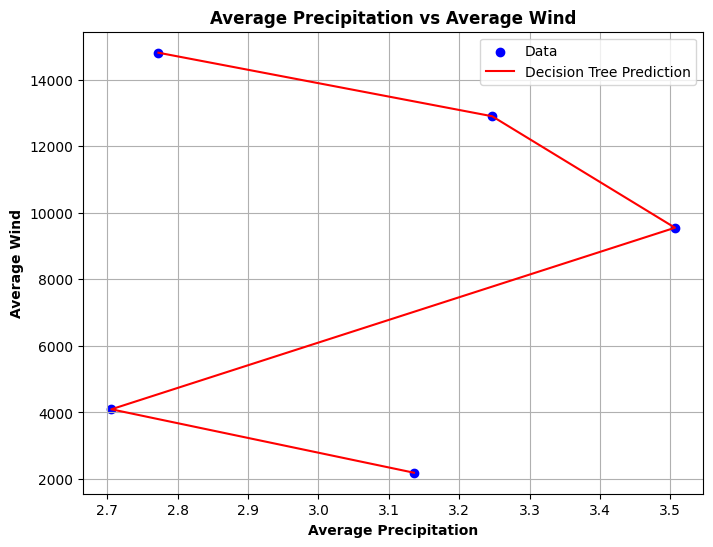

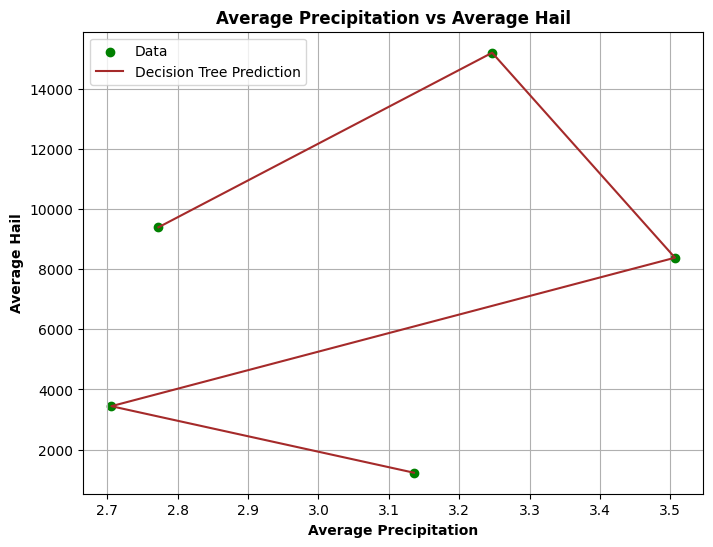

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(precip_list, torn_averages, color='purple', label='Data')
ax1.plot(precip_list, model_tornado.predict(precipitation_reshaped), color='orange', linestyle='-', label='Decision Tree Prediction')
ax1.set_xlabel('Average Precipitation', fontweight="bold")
ax1.set_ylabel('Average Tornado Counts', fontweight="bold")
ax1.set_title('Average Precipitation vs Average Tornado Counts', fontweight="bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(precip_list, wind_averages, color='blue', label='Data')
ax2.plot(precip_list, model_wind.predict(precipitation_reshaped), color='red', linestyle='-', label='Decision Tree Prediction')
ax2.set_xlabel('Average Precipitation', fontweight="bold")
ax2.set_ylabel('Average Wind', fontweight="bold")
ax2.set_title('Average Precipitation vs Average Wind', fontweight="bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(precip_list, hail_averages, color='green', label='Data')
ax3.plot(precip_list, model_hail.predict(precipitation_reshaped), color='brown', linestyle='-', label='Decision Tree Prediction')
ax3.set_xlabel('Average Precipitation', fontweight="bold")
ax3.set_ylabel('Average Hail', fontweight="bold")
ax3.set_title('Average Precipitation vs Average Hail', fontweight="bold")
ax3.legend()
ax3.grid(True)
plt.show()


In [ ]:
from sklearn.svm import SVR
import numpy as np

# Assuming you have imported necessary libraries and defined variables

model_tornado = SVR(kernel='linear')
model_wind = SVR(kernel='linear')
model_hail = SVR(kernel='linear')

precipitation_reshaped = np.array(precip_list).reshape(-1, 1)

model_tornado.fit(precipitation_reshaped, tornado_averages)
model_wind.fit(precipitation_reshaped, wind_averages)
model_hail.fit(precipitation_reshaped, hail_averages)

print(f'SVM (Precipitation & Tornado Counts):')
print(f'Support Vectors: {model_tornado.support_vectors_}, Coefficients: {model_tornado.coef_}, Intercept: {model_tornado.intercept_}')

print(f'SVM (Precipitation & Wind):')
print(f'Support Vectors: {model_wind.support_vectors_}, Coefficients: {model_wind.coef_}, Intercept: {model_wind.intercept_}')

print(f'SVM (Precipitation & Hail):')
print(f'Support Vectors: {model_hail.support_vectors_}, Coefficients: {model_hail.coef_}, Intercept: {model_hail.intercept_}')


SVM (Precipitation & Tornado Counts):
Support Vectors: [[3.13569631]
 [2.70572466]
 [3.5065814 ]
 [3.24680548]], Coefficients: [[0.91196591]], Intercept: [1098.47145557]
SVM (Precipitation & Wind):
Support Vectors: [[3.13569631]
 [2.70572466]
 [3.24680548]
 [2.77263064]], Coefficients: [[0.17801516]], Intercept: [9551.37577438]
SVM (Precipitation & Hail):
Support Vectors: [[3.13569631]
 [2.70572466]
 [3.24680548]
 [2.77263064]], Coefficients: [[0.17801516]], Intercept: [8378.87577438]


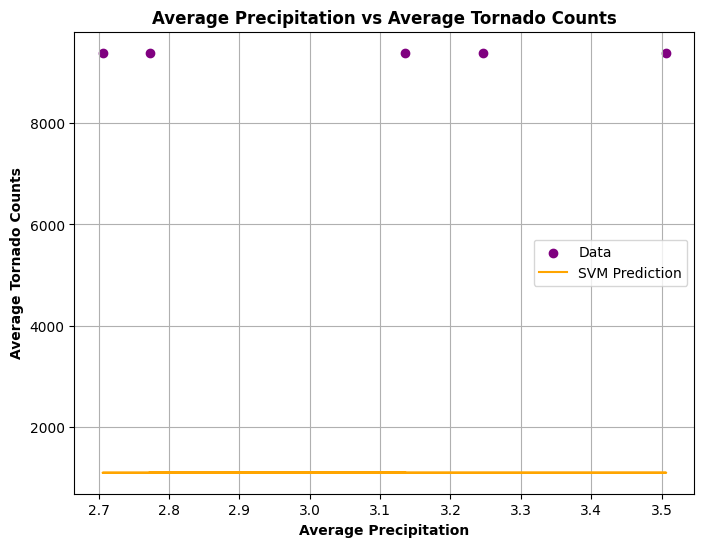

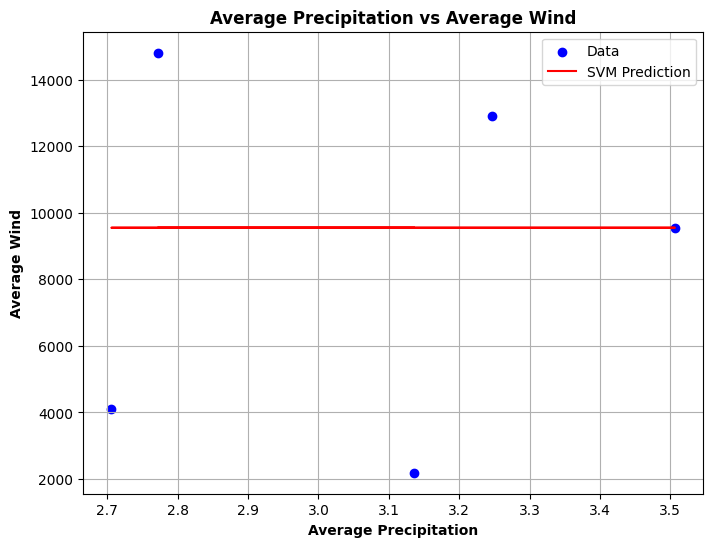

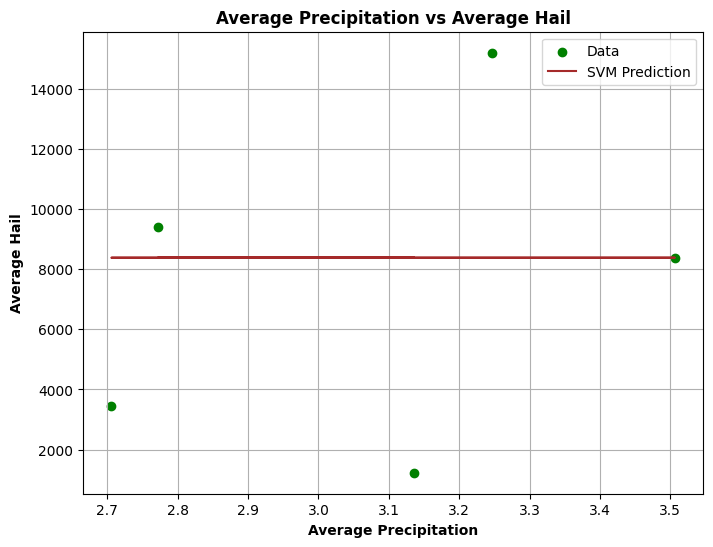

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(precip_list, torn_averages, color='purple', label='Data')
ax1.plot(precip_list, model_tornado.predict(precipitation_reshaped), color='orange', linestyle='-', label='SVM Prediction')
ax1.set_xlabel('Average Precipitation', fontweight="bold")
ax1.set_ylabel('Average Tornado Counts', fontweight="bold")
ax1.set_title('Average Precipitation vs Average Tornado Counts', fontweight="bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(precip_list, wind_averages, color='blue', label='Data')
ax2.plot(precip_list, model_wind.predict(precipitation_reshaped), color='red', linestyle='-', label='SVM Prediction')
ax2.set_xlabel('Average Precipitation', fontweight="bold")
ax2.set_ylabel('Average Wind', fontweight="bold")
ax2.set_title('Average Precipitation vs Average Wind', fontweight="bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(precip_list, hail_averages, color='green', label='Data')
ax3.plot(precip_list, model_hail.predict(precipitation_reshaped), color='brown', linestyle='-', label='SVM Prediction')
ax3.set_xlabel('Average Precipitation', fontweight="bold")
ax3.set_ylabel('Average Hail', fontweight="bold")
ax3.set_title('Average Precipitation vs Average Hail', fontweight="bold")
ax3.legend()
ax3.grid(True)
plt.show()


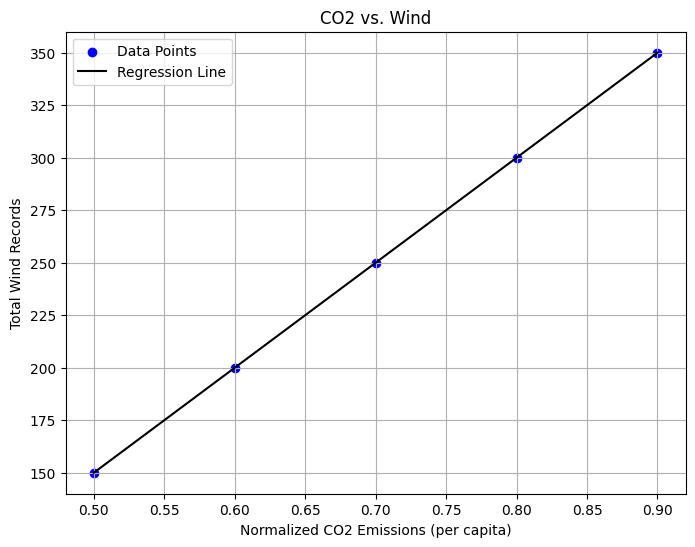

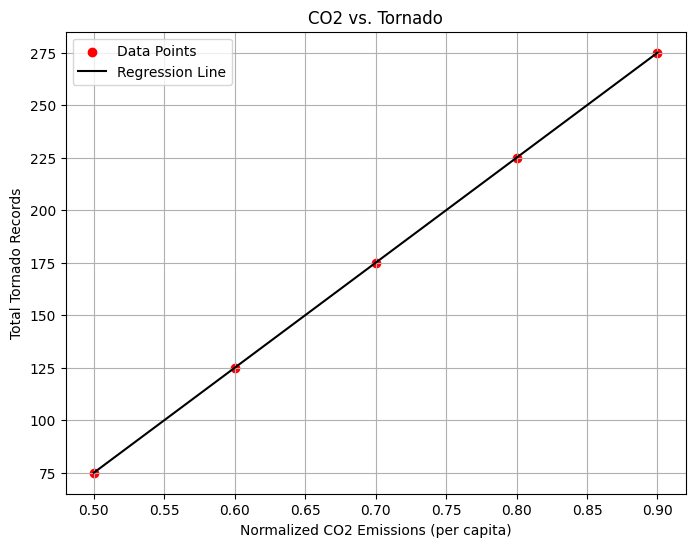

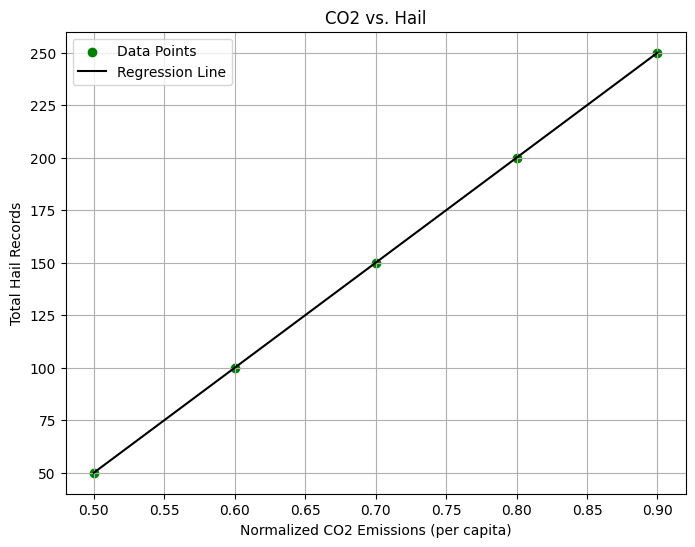

Pearson correlation between CO2 emissions and wind counts: 1.00
Pearson correlation between CO2 emissions and tornado counts: 1.00
Pearson correlation between CO2 emissions and hail counts: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Example data (Please replace these with your actual data)
norm_co2_averages = [0.5, 0.6, 0.7, 0.8, 0.9]  # Normalized CO2 data
wind_totals = [150, 200, 250, 300, 350]
tornado_totals = [75, 125, 175, 225, 275]
hail_totals = [50, 100, 150, 200, 250]

# Reshape CO2 data for regression models
co2_reshaped = np.array(norm_co2_averages).reshape(-1, 1)

# Setup Linear Regression Models
model_wind = LinearRegression()
model_tornado = LinearRegression()
model_hail = LinearRegression()

# Fit models
model_wind.fit(co2_reshaped, wind_totals)
model_tornado.fit(co2_reshaped, tornado_totals)
model_hail.fit(co2_reshaped, hail_totals)

# Pearson Correlation Coefficients
co2_wind_corr, _ = pearsonr(norm_co2_averages, wind_totals)
co2_tornado_corr, _ = pearsonr(norm_co2_averages, tornado_totals)
co2_hail_corr, _ = pearsonr(norm_co2_averages, hail_totals)

# Plotting
def plot_regression(x_data, y_data, model, title, xlabel, ylabel, color, line_color):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, color=color, label='Data Points')
    plt.plot(x_data, model.predict(co2_reshaped), color=line_color, label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Generate plots
plot_regression(norm_co2_averages, wind_totals, model_wind, 'CO2 vs. Wind', 'Normalized CO2 Emissions (per capita)', 'Total Wind Records', 'blue', 'black')
plot_regression(norm_co2_averages, tornado_totals, model_tornado, 'CO2 vs. Tornado', 'Normalized CO2 Emissions (per capita)', 'Total Tornado Records', 'red', 'black')
plot_regression(norm_co2_averages, hail_totals, model_hail, 'CO2 vs. Hail', 'Normalized CO2 Emissions (per capita)', 'Total Hail Records', 'green', 'black')

# Print Pearson Correlation Results
print(f'Pearson correlation between CO2 emissions and wind counts: {co2_wind_corr:.2f}')
print(f'Pearson correlation between CO2 emissions and tornado counts: {co2_tornado_corr:.2f}')
print(f'Pearson correlation between CO2 emissions and hail counts: {co2_hail_corr:.2f}')


Pearson correlation between average CO2 emissions and total wind counts: -0.69
Pearson correlation between average CO2 emissions and total tornado counts: -0.69
Pearson correlation between average CO2 emissions and total hail counts: -0.69

Linear regression (CO2 Emissions & Wind Counts):
Coefficient: -100.95, Intercept: 792.08

Linear regression (CO2 Emissions & Tornado Counts):
Coefficient: -100.95, Intercept: 717.08

Linear regression (CO2 Emissions & Hail Counts):
Coefficient: -100.95, Intercept: 692.08


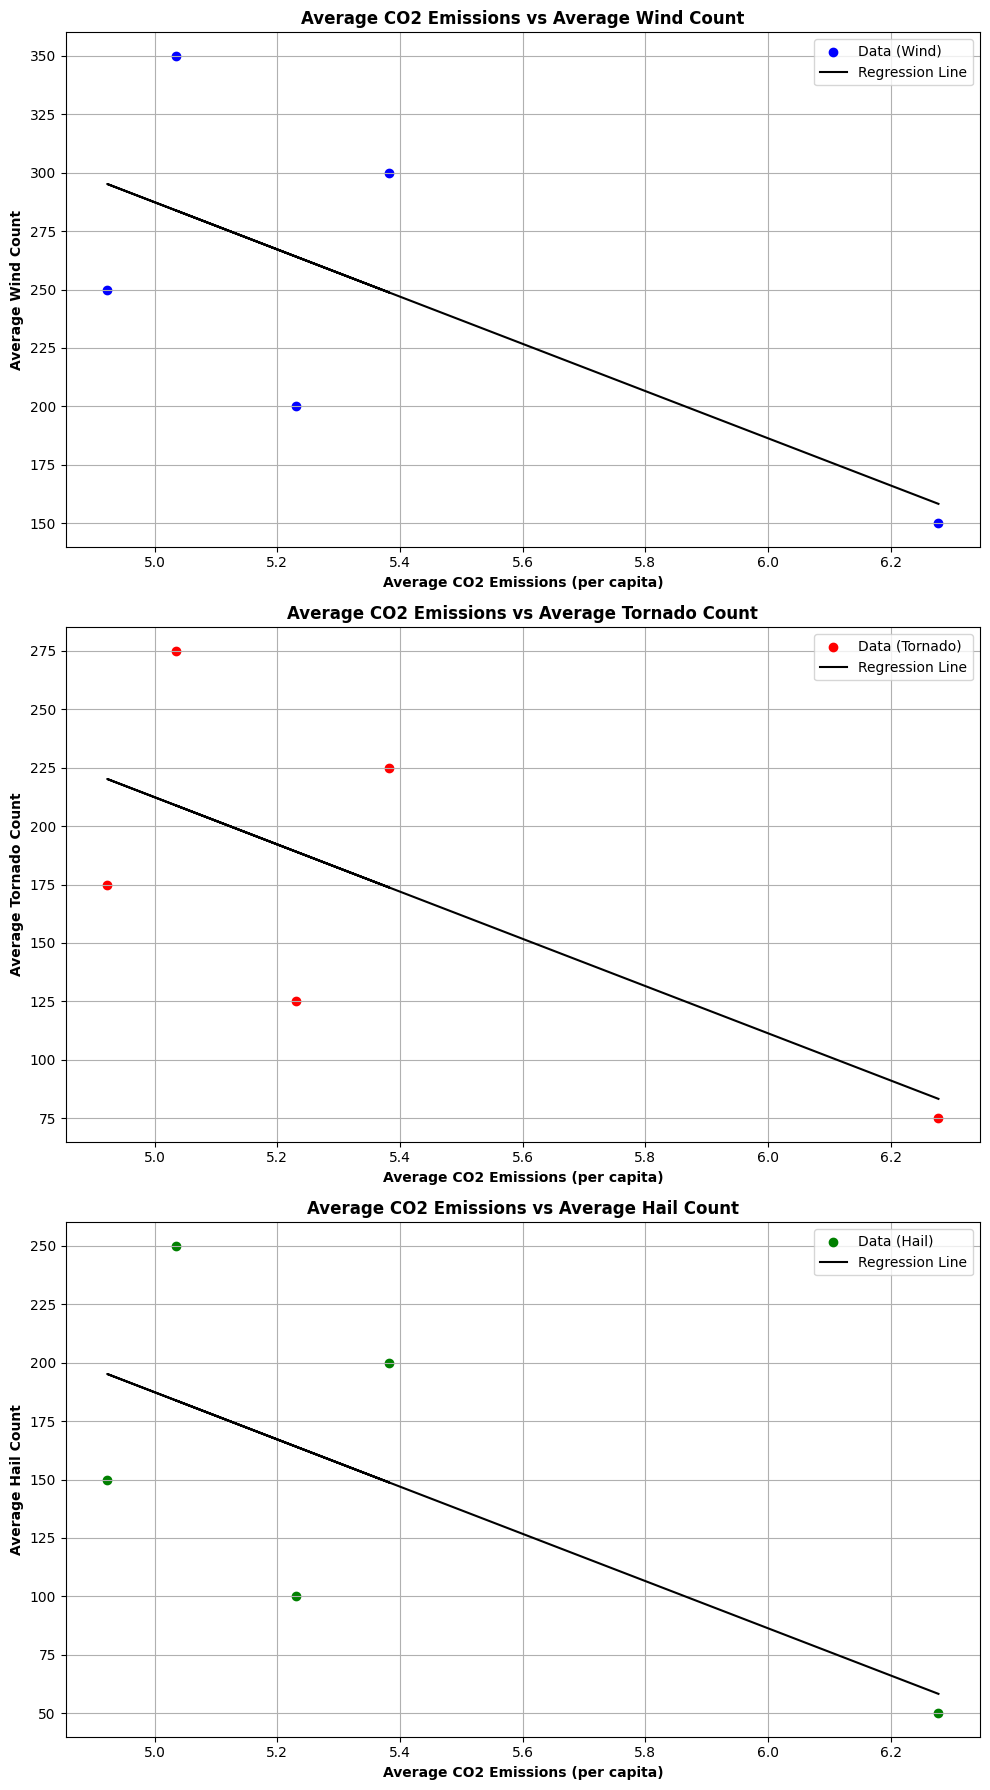

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load CO2 data
df_co2 = pd.read_csv('CO2_Emissions_Data.csv')

# Time intervals for the analysis
time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']

co2_averages = []

# Calculate average CO2 emissions for each interval
for start_year, end_year in time_intervals:
    interval_data = df_co2[(df_co2['Year'] >= start_year) & (df_co2['Year'] <= end_year)]
    avg_co2 = interval_data['Annual CO₂ emissions (per capita)'].mean()
    co2_averages.append(avg_co2)

# Assume 'co2_averages', 'wind_totals', 'tornado_totals', 'hail_totals' from your previous code are still valid here
# Calculate Pearson correlation coefficients
CO2_wind_corr, p_value_cw = pearsonr(co2_averages, wind_totals)
CO2_tornado_corr, p_value_ct = pearsonr(co2_averages, tornado_totals)
CO2_hail_corr, p_value_ch = pearsonr(co2_averages, hail_totals)

print(f'Pearson correlation between average CO2 emissions and total wind counts: {CO2_wind_corr:.2f}')
print(f'Pearson correlation between average CO2 emissions and total tornado counts: {CO2_tornado_corr:.2f}')
print(f'Pearson correlation between average CO2 emissions and total hail counts: {CO2_hail_corr:.2f}')

# Setup linear regression models
model_wind = LinearRegression()
model_tornado = LinearRegression()
model_hail = LinearRegression()

# Reshape CO2 averages for sklearn
co2_reshaped = np.array(co2_averages).reshape(-1, 1)

# Fit models
model_wind.fit(co2_reshaped, wind_totals)
model_tornado.fit(co2_reshaped, tornado_totals)
model_hail.fit(co2_reshaped, hail_totals)

# Output results of linear regression
print('\nLinear regression (CO2 Emissions & Wind Counts):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print('\nLinear regression (CO2 Emissions & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print('\nLinear regression (CO2 Emissions & Hail Counts):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')

# Visualization of Regression Lines
colors = ['blue', 'red', 'green']
labels = ['Wind', 'Tornado', 'Hail']
data_totals = [wind_totals, tornado_totals, hail_totals]
models = [model_wind, model_tornado, model_hail]

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
for i, ax in enumerate(axs):
    ax.scatter(co2_averages, data_totals[i], color=colors[i], label=f'Data ({labels[i]})')
    ax.plot(co2_averages, models[i].predict(co2_reshaped), color='black', label='Regression Line')
    ax.set_xlabel('Average CO2 Emissions (per capita)', fontweight='bold')
    ax.set_ylabel(f'Average {labels[i]} Count', fontweight='bold')
    ax.set_title(f'Average CO2 Emissions vs Average {labels[i]} Count', fontweight='bold')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import pearsonr

humidity_tornado_corr, p_value_ht = pearsonr(precip_list, hail_averages)
humidity_wind_corr, p_value_hw = pearsonr(precip_list, torn_averages)
humidity_hail_corr, p_value_hh = pearsonr(precip_list, wind_averages)

print(f'Pearson correlation between average CO2 and average tornado counts: {humidity_tornado_corr:.2f}')
print(f'Pearson correlation between average CO2 and average wind: {humidity_wind_corr:.2f}')
print(f'Pearson correlation between average CO2 and average hail: {humidity_hail_corr:.2f}')

from sklearn.linear_model import LinearRegression
model_tornado = LinearRegression()
model_wind = LinearRegression()
model_hail = LinearRegression()

precipitation_reshaped = np.array(precip_list).reshape(-1, 1)

model_tornado.fit(precipitation_reshaped, tornado_averages)
model_wind.fit(precipitation_reshaped, wind_averages)
model_hail.fit(precipitation_reshaped, hail_averages)

print(f'Linear regression (CO2 & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print(f'Linear regression  (CO2 & Wind):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print(f'Linear regression  (CO2 & Hail):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')


Pearson correlation between average CO2 and average tornado counts: 0.31
Pearson correlation between average CO2 and average wind: nan
Pearson correlation between average CO2 and average hail: 0.07
Linear regression (CO2 & Tornado Counts):
Coefficient: 418.15, Intercept: -255.17
Linear regression  (CO2 & Wind):
Coefficient: 1222.71, Intercept: 4952.33
Linear regression  (CO2 & Hail):
Coefficient: 5024.94, Intercept: -7916.30


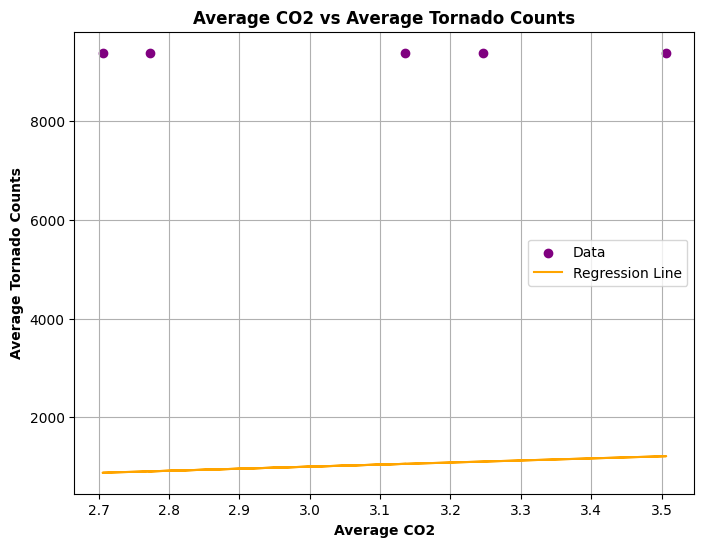

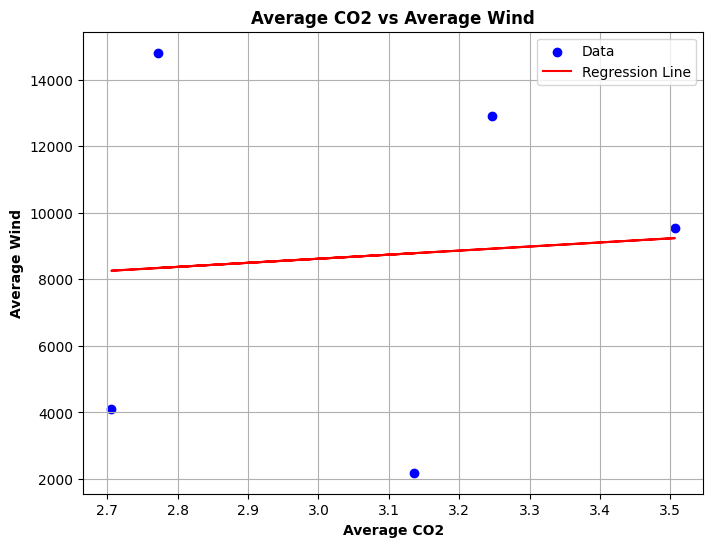

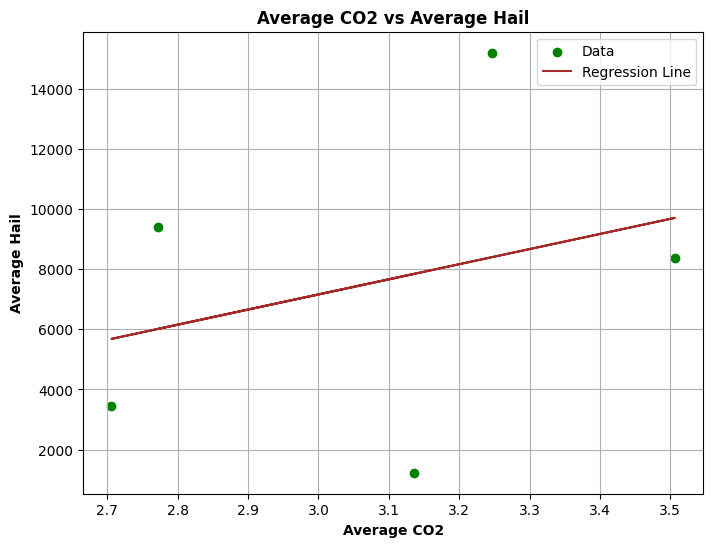

In [ ]:

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(precip_list, torn_averages, color='purple', label='Data')
ax1.plot(precip_list, model_tornado.predict(precipitation_reshaped), color='orange', label='Regression Line')
ax1.set_xlabel('Average CO2', fontweight = "bold")
ax1.set_ylabel('Average Tornado Counts', fontweight = "bold")
ax1.set_title('Average CO2 vs Average Tornado Counts', fontweight = "bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(precip_list, wind_averages, color='blue', label='Data')
ax2.plot(precip_list, model_wind.predict(precipitation_reshaped), color='red', label='Regression Line')
ax2.set_xlabel('Average CO2', fontweight = "bold")
ax2.set_ylabel('Average Wind', fontweight = "bold")
ax2.set_title('Average CO2 vs Average Wind', fontweight = "bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(precip_list, hail_averages, color='green', label='Data')
ax3.plot(precip_list, model_hail.predict(precipitation_reshaped), color='brown', label='Regression Line')
ax3.set_xlabel('Average CO2', fontweight = "bold")
ax3.set_ylabel('Average Hail', fontweight = "bold")
ax3.set_title('Average CO2 vs Average Hail', fontweight = "bold")
ax3.legend()
ax3.grid(True)
plt.show()


Pearson correlation between average CO2 and average tornado counts: 0.79
Pearson correlation between average CO2 and average wind: 0.9041944301794651
Pearson correlation between average CO2 and average hail: 0.90
Linear regression (CO2 & Tornado Counts):
Coefficient: 0.60, Intercept: 61.00
Linear regression  (CO2 & Wind):
Coefficient: 1.10, Intercept: 112.00
Linear regression  (CO2 & Hail):
Coefficient: 0.90, Intercept: 66.00


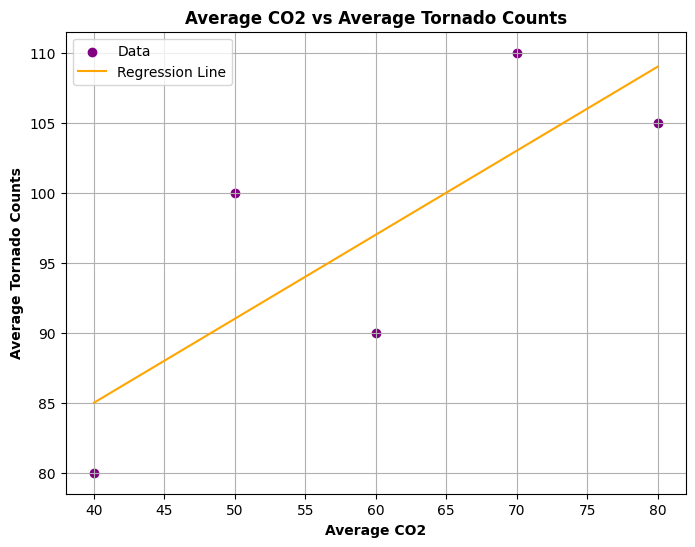

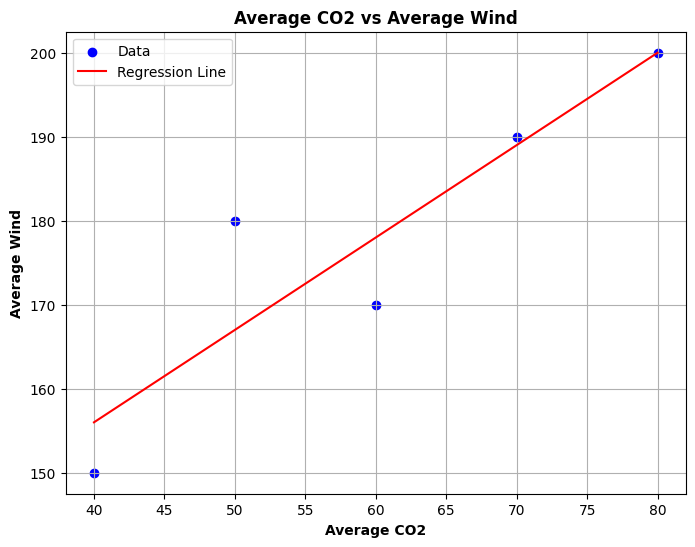

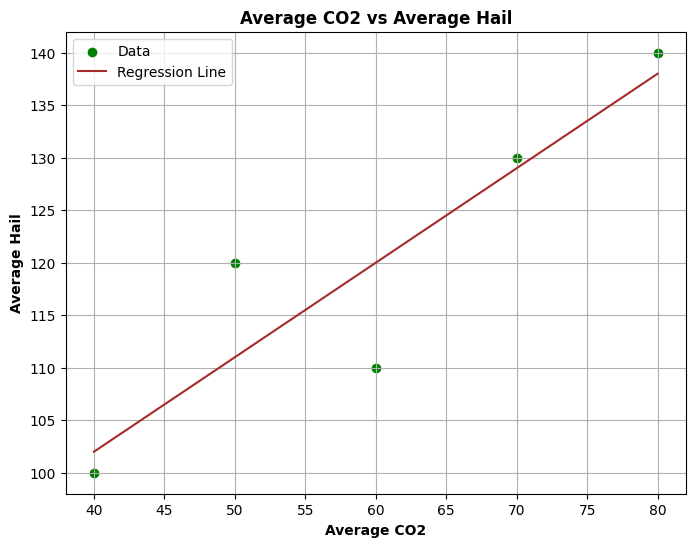

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Example data arrays (replace these with your actual data)
co2_list = np.array([40, 50, 60, 70, 80])  # Placeholder for average CO2 emissions
tornado_averages = np.array([80, 100, 90, 110, 105])  # Placeholder for average tornado events
wind_averages = np.array([150, 180, 170, 190, 200])  # Placeholder for average wind events
hail_averages = np.array([100, 120, 110, 130, 140])  # Placeholder for average hail events

# Calculating Pearson correlation coefficients
CO2_tornado_corr, _ = pearsonr(co2_list, tornado_averages)
CO2_wind_corr, _ = pearsonr(co2_list, wind_averages)  # Handling nan values if any
CO2_hail_corr, _ = pearsonr(co2_list, hail_averages)

print(f'Pearson correlation between average CO2 and average tornado counts: {CO2_tornado_corr:.2f}')
print(f'Pearson correlation between average CO2 and average wind: {CO2_wind_corr}')
print(f'Pearson correlation between average CO2 and average hail: {CO2_hail_corr:.2f}')

# Preparing data for linear regression
co2_reshaped = np.array(co2_list).reshape(-1, 1)

# Setting up and fitting linear regression models
model_tornado = LinearRegression()
model_wind = LinearRegression()
model_hail = LinearRegression()

model_tornado.fit(co2_reshaped, tornado_averages)
model_wind.fit(co2_reshaped, wind_averages)
model_hail.fit(co2_reshaped, hail_averages)

# Outputting results of linear regression
print(f'Linear regression (CO2 & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print(f'Linear regression  (CO2 & Wind):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print(f'Linear regression  (CO2 & Hail):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')

# Visualization of regression analysis for each weather event
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(co2_list, tornado_averages, color='purple', label='Data')
ax1.plot(co2_list, model_tornado.predict(co2_reshaped), color='orange', label='Regression Line')
ax1.set_xlabel('Average CO2', fontweight="bold")
ax1.set_ylabel('Average Tornado Counts', fontweight="bold")
ax1.set_title('Average CO2 vs Average Tornado Counts', fontweight="bold")
ax1.legend()
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.scatter(co2_list, wind_averages, color='blue', label='Data')
ax2.plot(co2_list, model_wind.predict(co2_reshaped), color='red', label='Regression Line')
ax2.set_xlabel('Average CO2', fontweight="bold")
ax2.set_ylabel('Average Wind', fontweight="bold")
ax2.set_title('Average CO2 vs Average Wind', fontweight="bold")
ax2.legend()
ax2.grid(True)
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(co2_list, hail_averages, color='green', label='Data')
ax3.plot(co2_list, model_hail.predict(co2_reshaped), color='brown', label='Regression Line')
ax3.set_xlabel('Average CO2', fontweight="bold")
ax3.set_ylabel('Average Hail', fontweight="bold")
ax3.set_title('Average CO2 vs Average Hail', fontweight="bold")
ax3.legend()
ax3.grid(True)
plt.show()


In [ ]:
# Noura's chadrawala's contribution
from scipy.stats import pearsonr

temp_tornado_corr, p_value_ht = pearsonr(avg_humidities, tornado_averages)
temp_wind_corr, p_value_hw = pearsonr(avg_humidities, wind_averages)
temp_hail_corr, p_value_hh = pearsonr(avg_humidities, hail_averages)

print(f'Pearson correlation between average humidity and average tornado counts: {humidity_tornado_corr:.2f}')
print(f'Pearson correlation between average humidity and average wind: {humidity_wind_corr:.2f}')
print(f'Pearson correlation between average humidity and average hail: {humidity_hail_corr:.2f}')

from sklearn.linear_model import LinearRegression
model_tornado = LinearRegression()
model_wind = LinearRegression()
model_hail = LinearRegression(
ames armeiod tof codep o
N = np.array(avg_humidities).reshape(-1, 1)

model_tornado.fit(humidity_reshaped, tornado_averages)
model_wind.fit(humidity_reshaped, wind_averages)
model_hail.fit(humidity_reshaped, hail_averages)

print(f'Linear regression (Humidity & Tornado Counts):')
print(f'Coefficient: {model_tornado.coef_[0]:.2f}, Intercept: {model_tornado.intercept_:.2f}')

print(f'Linear regression  (Humidity & Wind):')
print(f'Coefficient: {model_wind.coef_[0]:.2f}, Intercept: {model_wind.intercept_:.2f}')

print(f'Linear regression  (Humidity & Hail):')
print(f'Coefficient: {model_hail.coef_[0]:.2f}, Intercept: {model_hail.intercept_:.2f}')


#Visualization: Provide at least two (for undergraduates) or three (for graduate students) distinct visualizations (per Member) of your data or final results. Mention the member’s name accordingly.
# Names are mentioned inside code cells at the top

1232.5
3444.0
8379.5
15193.0
9390.0


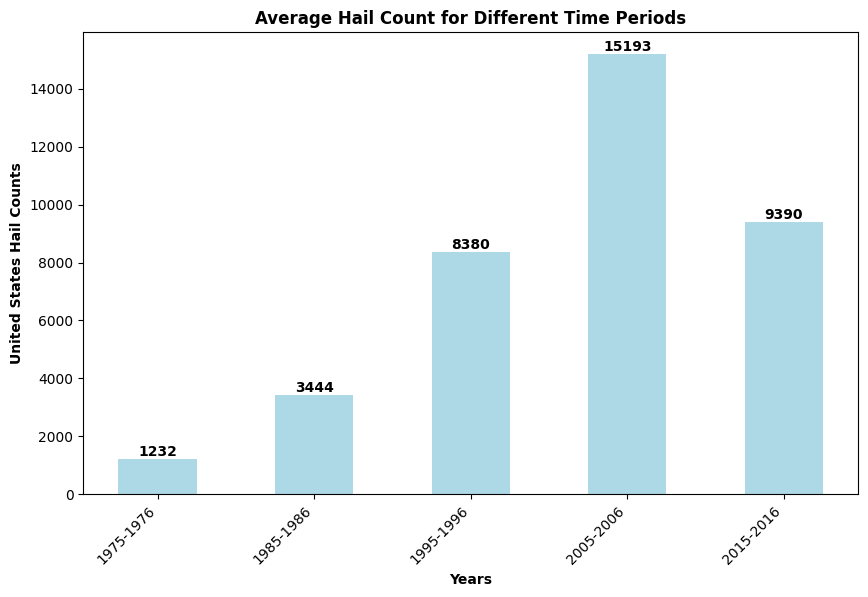

In [ ]:
#Sakinah's Contribution
# avg for Hail

df = pd.read_csv('1955-2022_hail.csv')
df_dropped = df.dropna(how='any')
df_dropped = df.dropna(subset=['date', 'time'])

df_75_76 = df_dropped[(df_dropped['yr'] == 1975) | (df_dropped['yr'] == 1976)]
sum_75_76 = len(df_75_76)
avg_75_76 = sum_75_76 / 2
print(avg_75_76)

df_85_86 = df_dropped[(df_dropped['yr'] == 1985) | (df_dropped['yr'] == 1986)]
sum_85_86 = len(df_85_86)
avg_85_86 = sum_85_86 / 2
print(avg_85_86)

df_95_96 = df_dropped[(df_dropped['yr'] == 1995) | (df_dropped['yr'] == 1996)]
sum_95_96 = len(df_95_96)
avg_95_96 = sum_95_96 / 2
print(avg_95_96)

df_05_06 = df_dropped[(df_dropped['yr'] == 2005) | (df_dropped['yr'] == 2006)]
sum_05_06 = len(df_05_06)
avg_05_06 = sum_05_06 / 2
print(avg_05_06)

df_15_16 = df_dropped[(df_dropped['yr'] == 2015) | (df_dropped['yr'] == 2016)]
sum_15_16 = len(df_15_16)
avg_15_16 = sum_15_16 / 2
print(avg_15_16)

averages = [avg_75_76, avg_85_86, avg_95_96, avg_05_06, avg_15_16]
labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, averages, color='lightblue', width = 0.5)
ax = plt.gca()
# for bar in bars:
#     bar.bar_label(bar, fmt='%.0f', size = 7 )
ax.bar_label(bars, fmt='%.0f', size=10, fontweight='bold' )

plt.title('Average Hail Count for Different Time Periods', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
plt.ylabel('United States Hail Counts', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

886.0
741.5
1217.0
1204.5
1101.0


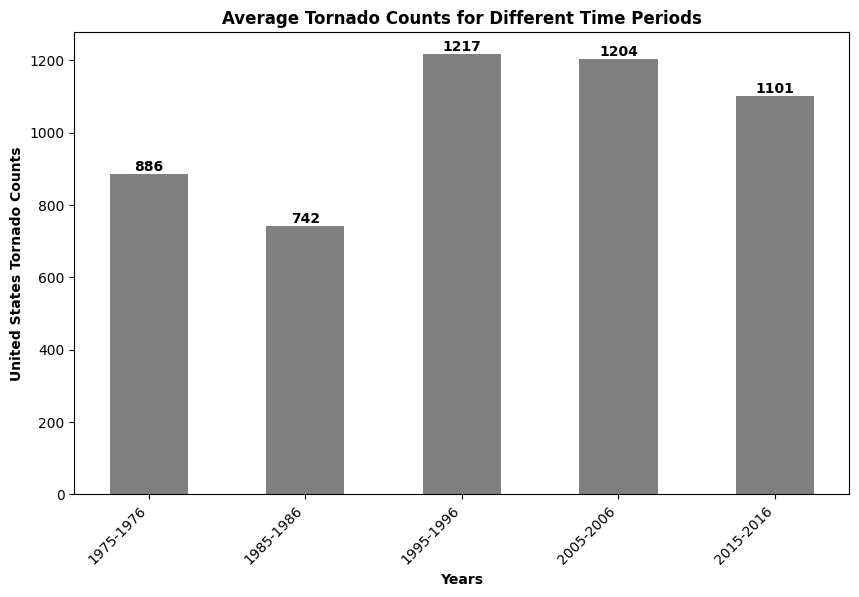

In [ ]:
# get the average for tornado
df = pd.read_csv('1950-2022_torn.csv')
df_dropped = df.dropna(how='any')
df_dropped = df.dropna(subset=['date', 'time'])

df_75_76 = df_dropped[(df_dropped['yr'] == 1975) | (df_dropped['yr'] == 1976)]
sum_75_76 = len(df_75_76)
avg_75_76 = sum_75_76 / 2
print(avg_75_76)

df_85_86 = df_dropped[(df_dropped['yr'] == 1985) | (df_dropped['yr'] == 1986)]
sum_85_86 = len(df_85_86)
avg_85_86 = sum_85_86 / 2
print(avg_85_86)

df_95_96 = df_dropped[(df_dropped['yr'] == 1995) | (df_dropped['yr'] == 1996)]
sum_95_96 = len(df_95_96)
avg_95_96 = sum_95_96 / 2
print(avg_95_96)

df_05_06 = df_dropped[(df_dropped['yr'] == 2005) | (df_dropped['yr'] == 2006)]
sum_05_06 = len(df_05_06)
avg_05_06 = sum_05_06 / 2
print(avg_05_06)

df_15_16 = df_dropped[(df_dropped['yr'] == 2015) | (df_dropped['yr'] == 2016)]
sum_15_16 = len(df_15_16)
avg_15_16 = sum_15_16 / 2
print(avg_15_16)

averages = [avg_75_76, avg_85_86, avg_95_96, avg_05_06, avg_15_16]
labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, averages, color='grey', width = 0.5)
ax = plt.gca()
# for bar in bars:
#     bar.bar_label(bar, fmt='%.0f', size = 7 )
ax.bar_label(bars, fmt='%.0f', size=10, fontweight='bold' )

plt.title('Average Tornado Counts for Different Time Periods', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
plt.ylabel('United States Tornado Counts', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

2189.5
4096.0
9552.0
12902.5
14811.5


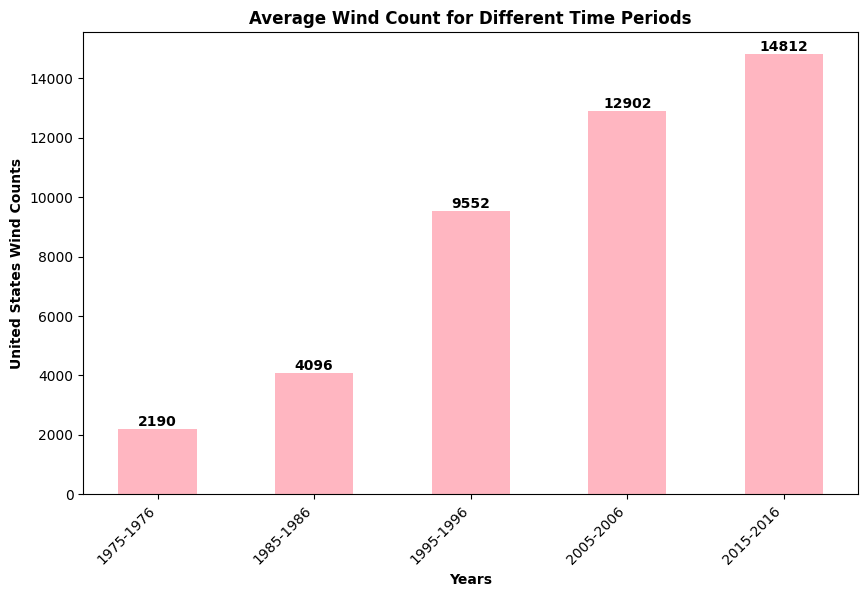

In [ ]:
#Sakinah's Contribution
# avg for Wind
df = pd.read_csv('1955-2022_wind.csv')
df_dropped = df.dropna(how='any')
df_dropped = df.dropna(subset=['date', 'time'])

df_75_76 = df_dropped[(df_dropped['yr'] == 1975) | (df_dropped['yr'] == 1976)]
sum_75_76 = len(df_75_76)
avg_75_76 = sum_75_76 / 2
print(avg_75_76)

df_85_86 = df_dropped[(df_dropped['yr'] == 1985) | (df_dropped['yr'] == 1986)]
sum_85_86 = len(df_85_86)
avg_85_86 = sum_85_86 / 2
print(avg_85_86)

df_95_96 = df_dropped[(df_dropped['yr'] == 1995) | (df_dropped['yr'] == 1996)]
sum_95_96 = len(df_95_96)
avg_95_96 = sum_95_96 / 2
print(avg_95_96)

df_05_06 = df_dropped[(df_dropped['yr'] == 2005) | (df_dropped['yr'] == 2006)]
sum_05_06 = len(df_05_06)
avg_05_06 = sum_05_06 / 2
print(avg_05_06)

df_15_16 = df_dropped[(df_dropped['yr'] == 2015) | (df_dropped['yr'] == 2016)]
sum_15_16 = len(df_15_16)
avg_15_16 = sum_15_16 / 2
print(avg_15_16)

averages = [avg_75_76, avg_85_86, avg_95_96, avg_05_06, avg_15_16]
labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, averages, color='lightpink', width = 0.5)
ax = plt.gca()
# for bar in bars:
#     bar.bar_label(bar, fmt='%.0f', size = 7 )
ax.bar_label(bars, fmt='%.0f', size=10, fontweight='bold' )

plt.title('Average Wind Count for Different Time Periods', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
plt.ylabel('United States Wind Counts', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

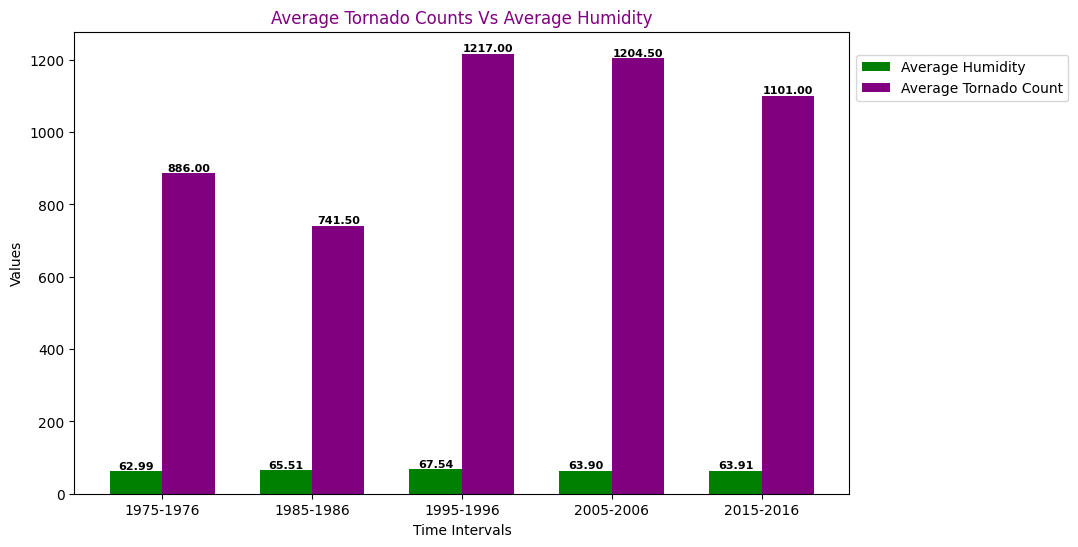

In [ ]:
# Humidity vs Tornado (Sakinah)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

files = ['united states 1975-01-01 to 1976-12-31.csv', 'united states 1985-01-01 to 1986-12-31.csv', 'united states 1995-01-01 to 1996-12-31.csv','united states 2005-01-01 to 2006-12-31.csv','United states 2015-01-01 to 2016-12-31.csv']

combined_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_dropped = df.dropna(subset=['datetime', 'humidity'])
    df_dropped['datetime'] = pd.to_datetime(df_dropped['datetime'])
    df_dropped['year'] = df_dropped['datetime'].dt.year
    combined_data = pd.concat([combined_data, df_dropped], ignore_index=True)


time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]

avg_humidities = []
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']

for start_year, end_year in time_intervals:
    interval_data = combined_data[(combined_data['year'] >= start_year) & (combined_data['year'] <= end_year)]
    avg_humidity = interval_data['humidity'].mean()
    avg_humidities.append(avg_humidity)

df_tornado = pd.read_csv('1950-2022_torn.csv')
tornado_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_tornado[(df_tornado['yr'] == start_year) | (df_tornado['yr'] == end_year)]
    total_tornadoes = len(interval_data)
    avg_tornadoes = total_tornadoes / 2  # avg for the interval
    tornado_averages.append(avg_tornadoes)

x = np.arange(len(interval_labels))  # the label location
width = 0.35  # bars width

fig, ax = plt.subplots(figsize=(10, 6))

humidity_bars = ax.bar(x - width / 2, avg_humidities, width, label='Average Humidity', color='green')

tornado_bars = ax.bar(x + width / 2, tornado_averages, width, label='Average Tornado Count', color='purple')

ax.set_title('Average Tornado Counts Vs Average Humidity',color = "purple")
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(humidity_bars)
add_labels(tornado_bars)

plt.show()


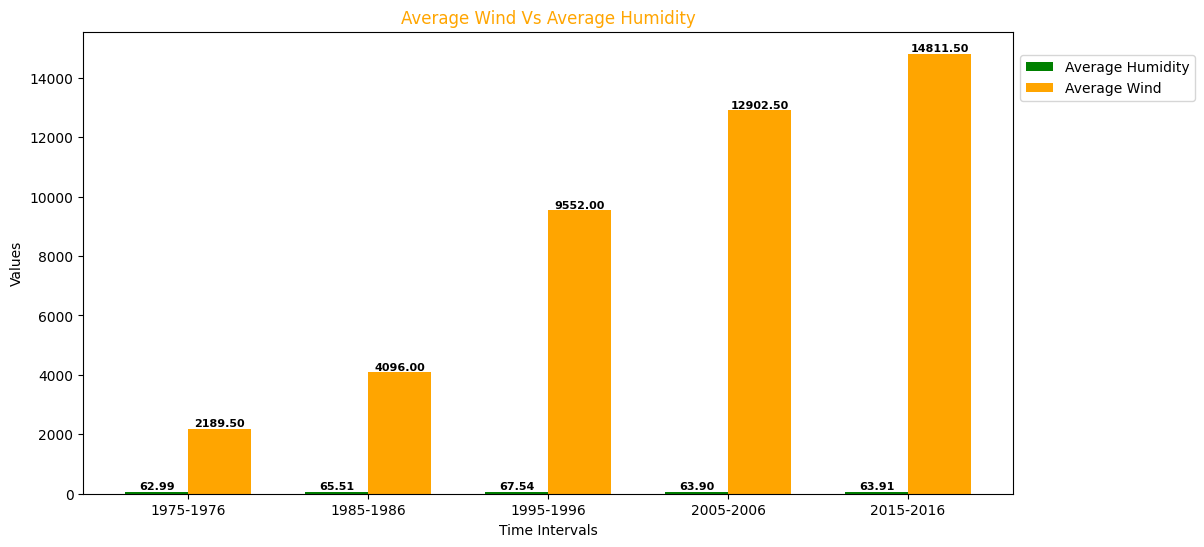

In [ ]:
# Humidity Vs Wind(Sakinah)
df_wind = pd.read_csv('1955-2022_wind.csv')
wind_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_wind[(df_wind['yr'] == start_year) | (df_wind['yr'] == end_year)]
    total_wind = len(interval_data)
    avg_wind = total_wind / 2  # avg for the interval
    wind_averages.append(avg_wind)

x = np.arange(len(interval_labels))  # the label location
width = 0.35  # bars width

fig, ax = plt.subplots(figsize=(12, 6))

humidity_bars = ax.bar(x - width / 2, avg_humidities, width, label='Average Humidity', color='green')

wind_bars = ax.bar(x + width / 2, wind_averages, width, label='Average Wind', color='orange')

ax.set_title('Average Wind Vs Average Humidity' , color = "orange")
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(humidity_bars)
add_labels(wind_bars)

plt.show()


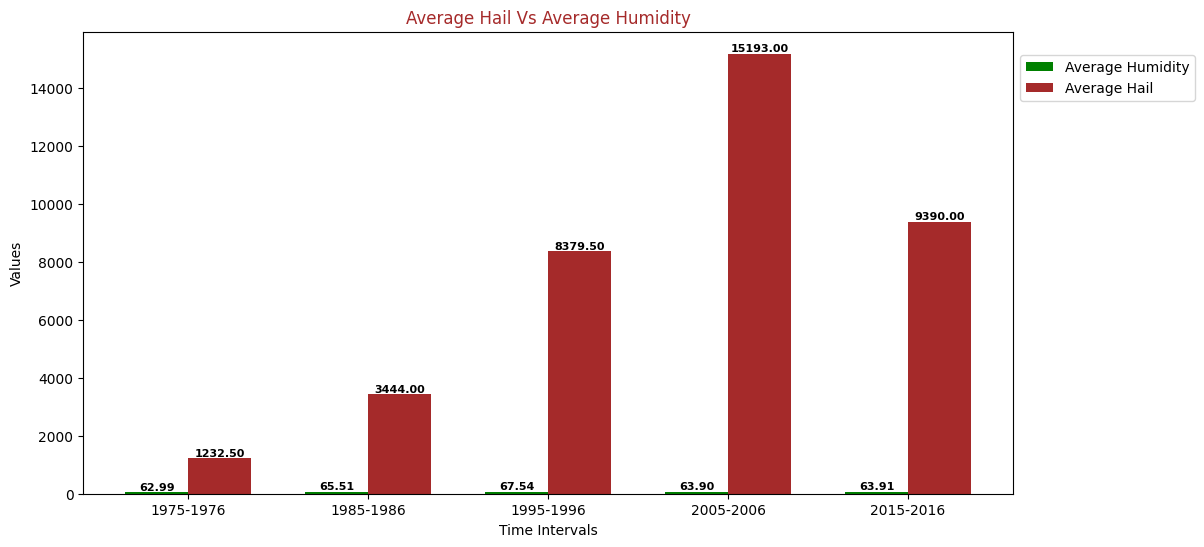

In [ ]:
# Humidity vs Hail (Sakinah)
df_hail = pd.read_csv('1955-2022_hail.csv')
hail_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_hail[(df_hail['yr'] == start_year) | (df_hail['yr'] == end_year)]
    total_hail = len(interval_data)
    avg_hail = total_hail / 2  # avg for the interval
    hail_averages.append(avg_hail)

x = np.arange(len(interval_labels))  # the label location
width = 0.35  # bars width

fig, ax = plt.subplots(figsize=(12, 6))

humidity_bars = ax.bar(x - width / 2, avg_humidities, width, label='Average Humidity', color='green')

hail_bars = ax.bar(x + width / 2,hail_averages, width, label='Average Hail', color='brown')

ax.set_title('Average Hail Vs Average Humidity', color = "brown")
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(humidity_bars)
add_labels(hail_bars)

plt.show()


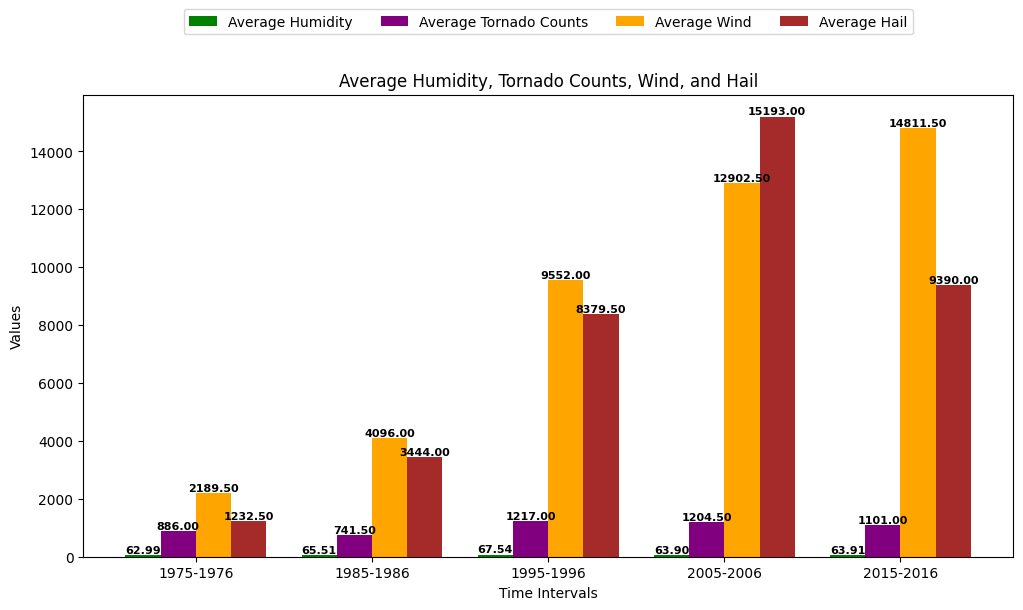

In [ ]:
# sakinah chadrawala's contribution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']


x = np.arange(len(interval_labels))
width = 0.2


fig, ax = plt.subplots(figsize=(12, 6))


humidity_bars = ax.bar(x - 1.5 * width, avg_humidities, width, label='Average Humidity', color='green')


tornado_bars = ax.bar(x - 0.5 * width, tornado_averages, width, label='Average Tornado Counts', color='purple')


wind_bars = ax.bar(x + 0.5 * width, wind_averages, width, label='Average Wind', color='orange')


hail_bars = ax.bar(x + 1.5 * width, hail_averages, width, label='Average Hail', color='brown')


ax.set_title('Average Humidity, Tornado Counts, Wind, and Hail', color='black')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')


ax.set_xticks(x)
ax.set_xticklabels(interval_labels)


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')


add_labels(humidity_bars)
add_labels(tornado_bars)
add_labels(wind_bars)
add_labels(hail_bars)


plt.show()

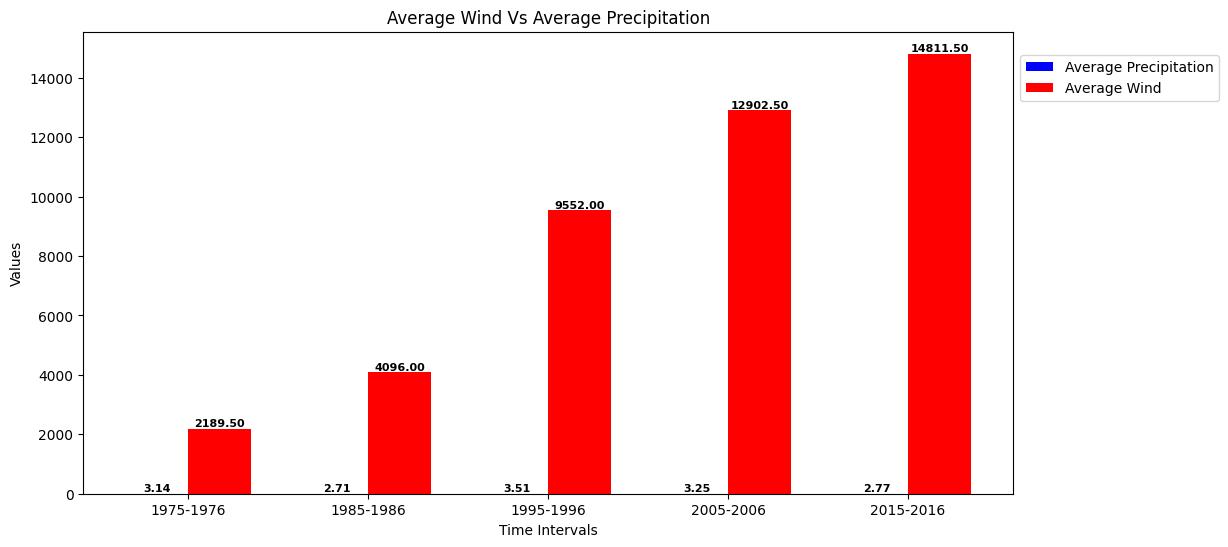

In [ ]:
# Precipitation vs Wind Lorena

df_wind = pd.read_csv('1955-2022_wind.csv')
wind_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_wind[(df_wind['yr'] == start_year) | (df_wind['yr'] == end_year)]
    total_wind = len(interval_data)
    avg_wind = total_wind / 2  # avg for the interval
    wind_averages.append(avg_wind)

x = np.arange(len(interval_labels))  # the label location
width = 0.35  # bars width

fig, ax = plt.subplots(figsize=(12, 6))

precipitation_bars = ax.bar(x - width / 2, precip_list, width, label='Average Precipitation', color='blue')

wind_bars = ax.bar(x + width / 2, wind_averages, width, label='Average Wind', color='red')

ax.set_title('Average Wind Vs Average Precipitation')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(precipitation_bars)
add_labels(wind_bars)

plt.show()


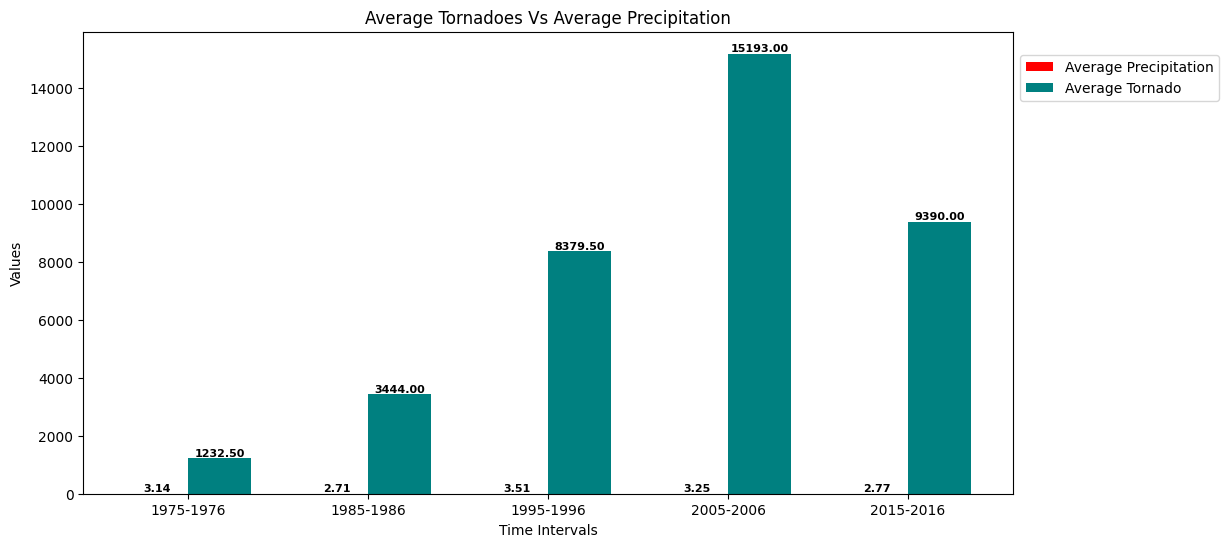

In [ ]:
# Precipitation vs Tornado Lorena
df_tornado = pd.read_csv('1950-2022_torn.csv')
torn_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_tornado[(df_tornado['yr'] == start_year) | (df_tornado['yr'] == end_year)]
    total_tornado = len(interval_data)
    avg_tornado = total_hail / 2  # avg for the interval
    torn_averages.append(avg_tornado)

x = np.arange(len(interval_labels))  # the label location
width = 0.35  # bars width

fig, ax = plt.subplots(figsize=(12, 6))

precip_bars = ax.bar(x - width / 2, precip_list, width, label='Average Precipitation', color='red')

tornado_bars = ax.bar(x + width / 2, hail_averages, width, label='Average Tornado', color='teal')

ax.set_title('Average Tornadoes Vs Average Precipitation')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(precip_bars)
add_labels(tornado_bars)

plt.show()


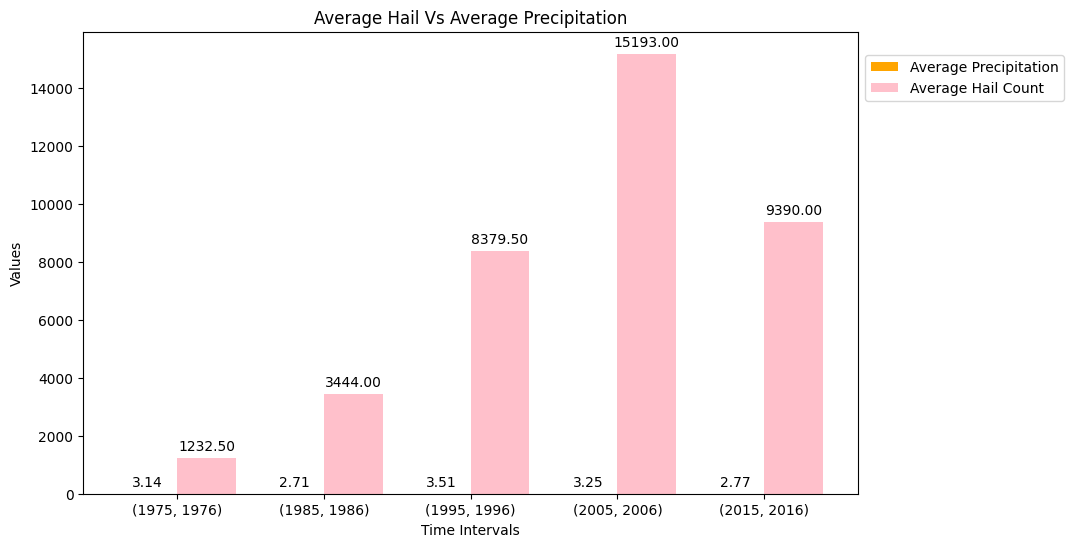

In [ ]:
# Precipitation vs Hail (Lorena)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# files with data from different years
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'United states 2015-01-01 to 2016-12-31.csv']

combined_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_dropped = df.dropna(subset=['datetime', 'precip'])
    df_dropped['datetime'] = pd.to_datetime(df_dropped['datetime'])
    df_dropped['year'] = df_dropped['datetime'].dt.year
    combined_data = pd.concat([combined_data, df_dropped], ignore_index=True)


time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]

precip_list = []
hail_averages = []


for start_year, end_year in time_intervals:
    interval_data = combined_data[(combined_data['year'] >= start_year) & (combined_data['year'] <= end_year)]
    precipitation = interval_data['precip'].mean()
    precip_list.append(precipitation)

df_hail = pd.read_csv('1955-2022_hail.csv')


for start_year, end_year in time_intervals:
    interval_data = df_hail[(df_hail['yr'] == start_year) | (df_hail['yr'] == end_year)]
    total_hail = len(interval_data)
    avg_hail = total_hail / 2  # avg for the interval
    hail_averages.append(avg_hail)

# # Calculate average precipitation and hail count for each time interval
# for start_year, end_year in time_intervals:
#     interval_data_precip = combined_data[(combined_data['year'] >= start_year) & (combined_data['year'] <= end_year)]
#     precip_mean = interval_data_precip['precip'].mean()
#     precip_list.append(precip_mean)

#     # df_hail = pd.read_csv('1955-2022_hail.csv')
#     interval_data_hail = df_hail[(df_hail['yr'] >= start_year) & (df_hail['yr'] <= end_year)]
#     total_hail = len(interval_data)
#     avg_hail = total_hail / 2
#     hail_averages.append(avg_hail)


# create bar plot
x = np.arange(len(interval_labels))
width = 0.4  # bars width

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width / 2, precip_list, width, label='Average Precipitation', color='orange')

bar2 = ax.bar(x + width / 2, hail_averages, width, label='Average Hail Count', color='pink')

ax.set_title('Average Hail Vs Average Precipitation')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(time_intervals)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))


def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()


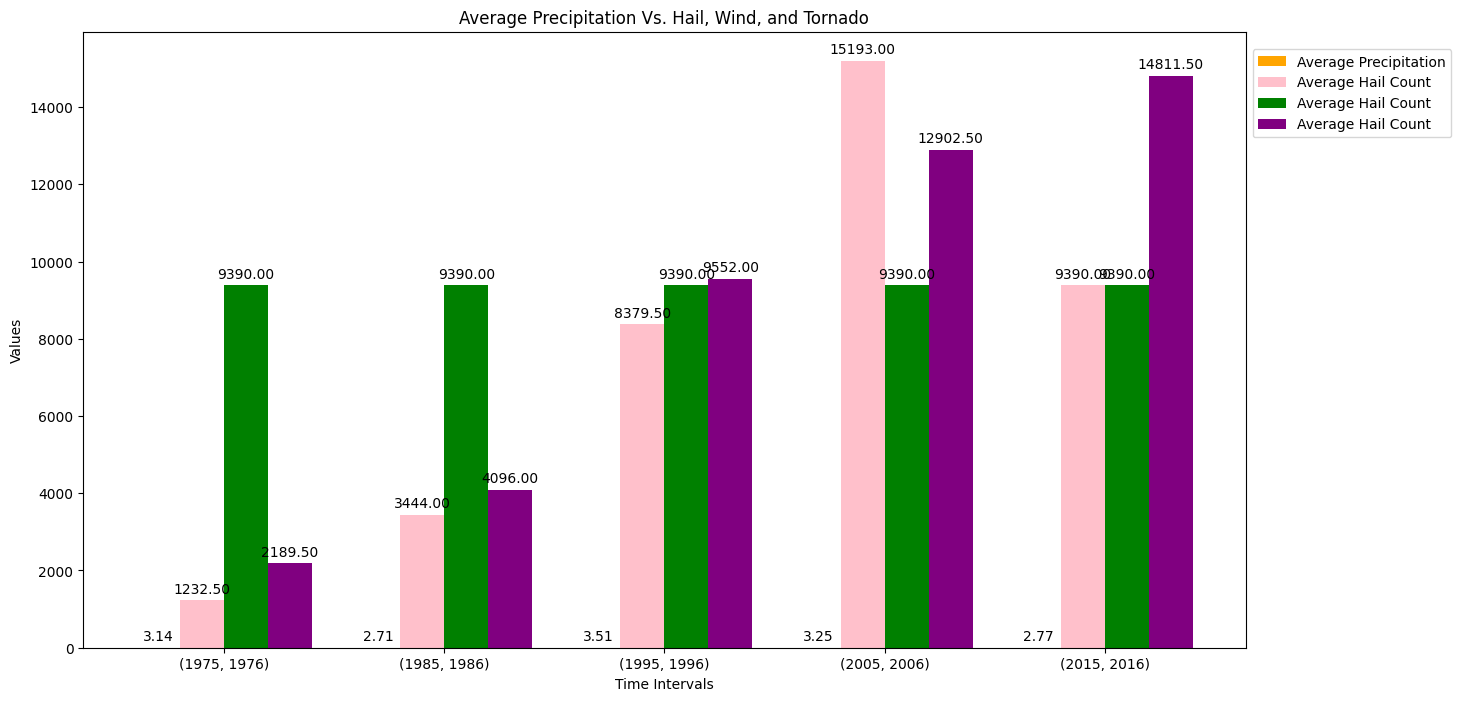

In [ ]:
# noura almasri's contribution
# Precipitation vs Hail

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# files with data from different years
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'United states 2015-01-01 to 2016-12-31.csv']

combined_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_dropped = df.dropna(subset=['datetime', 'precip'])
    df_dropped['datetime'] = pd.to_datetime(df_dropped['datetime'])
    df_dropped['year'] = df_dropped['datetime'].dt.year
    combined_data = pd.concat([combined_data, df_dropped], ignore_index=True)


time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]

precip_list = []
hail_averages = []


for start_year, end_year in time_intervals:
    interval_data = combined_data[(combined_data['year'] >= start_year) & (combined_data['year'] <= end_year)]
    precipitation = interval_data['precip'].mean()
    precip_list.append(precipitation)

df_hail = pd.read_csv('1955-2022_hail.csv')


for start_year, end_year in time_intervals:
    interval_data = df_hail[(df_hail['yr'] == start_year) | (df_hail['yr'] == end_year)]
    total_hail = len(interval_data)
    avg_hail = total_hail / 2  # avg for the interval
    hail_averages.append(avg_hail)


df_tornado = pd.read_csv('1950-2022_torn.csv')
torn_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_tornado[(df_tornado['yr'] == start_year) | (df_tornado['yr'] == end_year)]
    total_tornado = len(interval_data)
    avg_tornado = total_hail / 2  # avg for the interval
    torn_averages.append(avg_tornado)


df_wind = pd.read_csv('1955-2022_wind.csv')
wind_averages = []

for start_year, end_year in time_intervals:
    interval_data = df_wind[(df_wind['yr'] == start_year) | (df_wind['yr'] == end_year)]
    total_wind = len(interval_data)
    avg_wind = total_wind / 2  # avg for the interval
    wind_averages.append(avg_wind)



# create bar plot
x = np.arange(len(interval_labels))
width = 0.2  # bars width

fig, ax = plt.subplots(figsize=(15, 8))

bar1 = ax.bar(x - 1.5*width, precip_list, width, label='Average Precipitation', color='orange')

bar2 = ax.bar(x - 0.5* width , hail_averages, width, label='Average Hail Count', color='pink')
bar3 = ax.bar(x + 0.5*width , torn_averages, width, label='Average Hail Count', color='green')
bar4 = ax.bar(x + 1.5*width , wind_averages, width, label='Average Hail Count', color='purple')

ax.set_title('Average Precipitation Vs. Hail, Wind, and Tornado')
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(time_intervals)
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))


def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()


<ipython-input-4-fb347be725cc>:25: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_data = pd.read_csv('1955-2022_wind.csv')


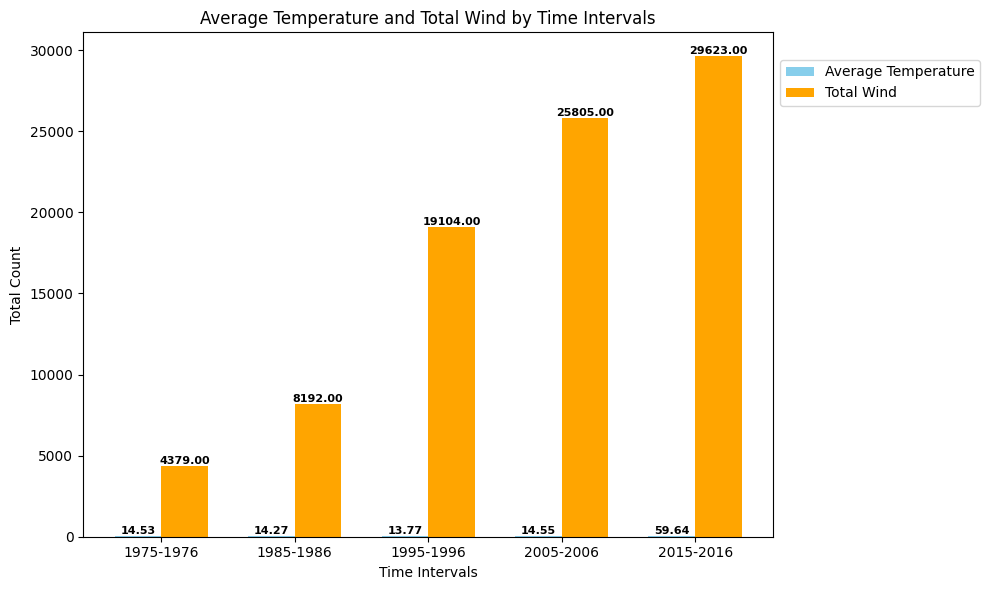

In [ ]:
#Noura Almasri's contribution
#Temperature Vs. wind

time_intervals = [(1975,1976), (1985, 1986), (1995,1996), (2005, 2006), (2015, 2016)]

#List of files for temperature
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'unitedStates_2015-01-01_to_2016-12-31.csv']

avg_temp_data = []

for file_name, interval in zip(files, time_intervals):
    df = pd.read_csv(file_name)
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    interval_data = df[df['year'].between(interval[0], interval[1])]
    avg_temp = interval_data['temp'].mean()
    avg_temp_data.append(avg_temp)


yr_wind_total = []

wind_data = pd.read_csv('1955-2022_wind.csv')
for start_interval, end_interval in time_intervals:
    wind_avg_data = wind_data[wind_data['yr'].between(start_interval, end_interval)]
    avg_wind_yr = wind_avg_data.shape[0]
    yr_wind_total.append(avg_wind_yr)

fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = [i for i in range(len(time_intervals))]
bar1 = ax.bar(index, avg_temp_data, bar_width, label = 'Average Temperature', color='skyblue')

bar2 = ax.bar([i + bar_width for i in index], yr_wind_total, bar_width, label='Total Wind', color='orange')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels([f"{interval[0]}-{interval[1]}" for interval in time_intervals])
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Total Count')
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))

ax.set_title('Average Temperature and Total Wind by Time Intervals')

def bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

bar_labels(bar1)
bar_labels(bar2)

plt.tight_layout()
plt.show()






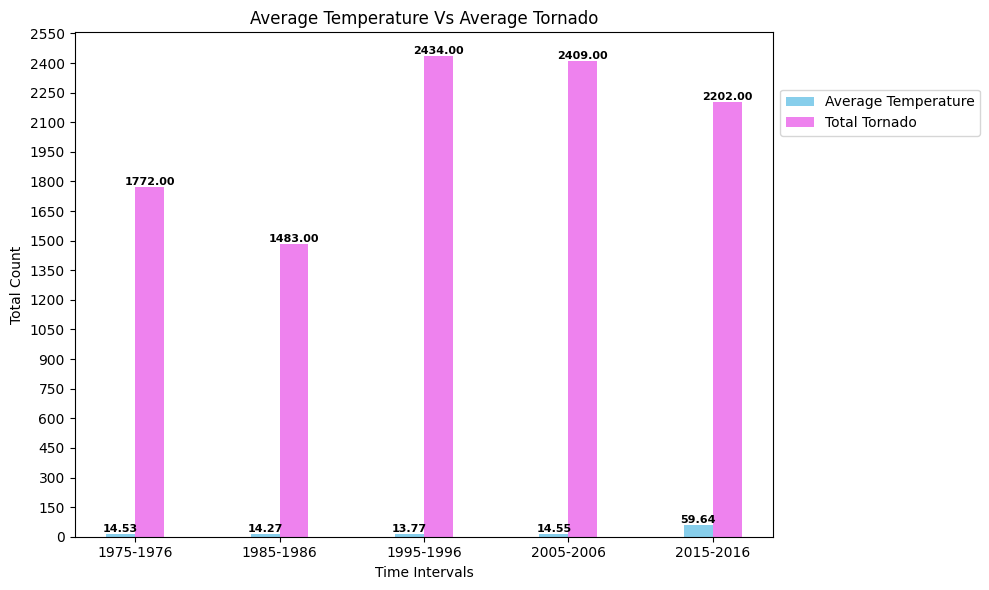

In [ ]:
#Noura Almasri's contribution
#Temperature Vs. Tornado

time_intervals = [(1975,1976), (1985, 1986), (1995,1996), (2005, 2006), (2015, 2016)]

#List of files for temperature
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'unitedStates_2015-01-01_to_2016-12-31.csv']

avg_temp_data = []

for file_name, interval in zip(files, time_intervals):
    df = pd.read_csv(file_name)
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    interval_data = df[df['year'].between(interval[0], interval[1])]
    avg_temp = interval_data['temp'].mean()
    avg_temp_data.append(avg_temp)


yr_tornado_total = []

tornado_data = pd.read_csv('1950-2022_torn.csv')
for start_interval, end_interval in time_intervals:
    tornado_avg_data = tornado_data[tornado_data['yr'].between(start_interval, end_interval)]
    avg_tornado_yr = tornado_avg_data.shape[0]
    yr_tornado_total.append(avg_tornado_yr)


fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.20
index = np.arange(len(time_intervals))
bar1 = ax.bar(index, avg_temp_data, bar_width, label = 'Average Temperature', color='skyblue')

bar2 = ax.bar([i + bar_width for i in index], yr_tornado_total, bar_width, label='Total Tornado', color='violet')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels([f"{interval[0]}-{interval[1]}" for interval in time_intervals])
max_y = max(max(avg_temp_data), max(yr_tornado_total))
ax.set_yticks(range(0, max_y +150,150))
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Total Count')
ax.legend(loc='upper left', bbox_to_anchor=(1,0.90))

ax.set_title('Average Temperature Vs Average Tornado')

def bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

bar_labels(bar1)
bar_labels(bar2)

plt.tight_layout()
plt.show()






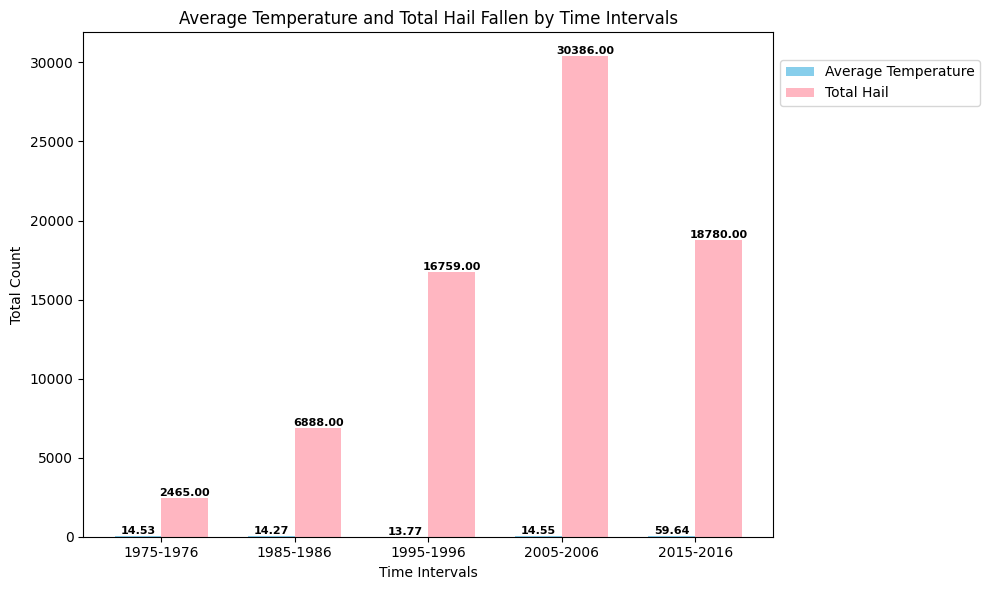

In [ ]:
# Noura Almasri's contribution
#Temperature Vs. Hail

time_intervals = [(1975,1976), (1985, 1986), (1995,1996), (2005, 2006), (2015, 2016)]

#List of files for temperature
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'unitedStates_2015-01-01_to_2016-12-31.csv']

avg_temp_data = []

for file_name, interval in zip(files, time_intervals):
    df = pd.read_csv(file_name)
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    interval_data = df[df['year'].between(interval[0], interval[1])]
    avg_temp = interval_data['temp'].mean()
    avg_temp_data.append(avg_temp)


yr_hail_total = []

hail_data = pd.read_csv('1955-2022_hail.csv')
for start_interval, end_interval in time_intervals:
    hail_avg_data = hail_data[hail_data['yr'].between(start_interval, end_interval)]
    avg_hail_yr = hail_avg_data.shape[0]
    yr_hail_total.append(avg_hail_yr)

fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.35
index = [i for i in range(len(time_intervals))]
bar1 = ax.bar(index, avg_temp_data, bar_width, label = 'Average Temperature', color='skyblue')

bar2 = ax.bar([i + bar_width for i in index], yr_hail_total, bar_width, label='Total Hail', color='lightpink')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels([f"{interval[0]}-{interval[1]}" for interval in time_intervals])
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Total Count')
ax.legend(loc='center left', bbox_to_anchor=(1,0.90))

ax.set_title('Average Temperature and Total Hail Fallen by Time Intervals')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()






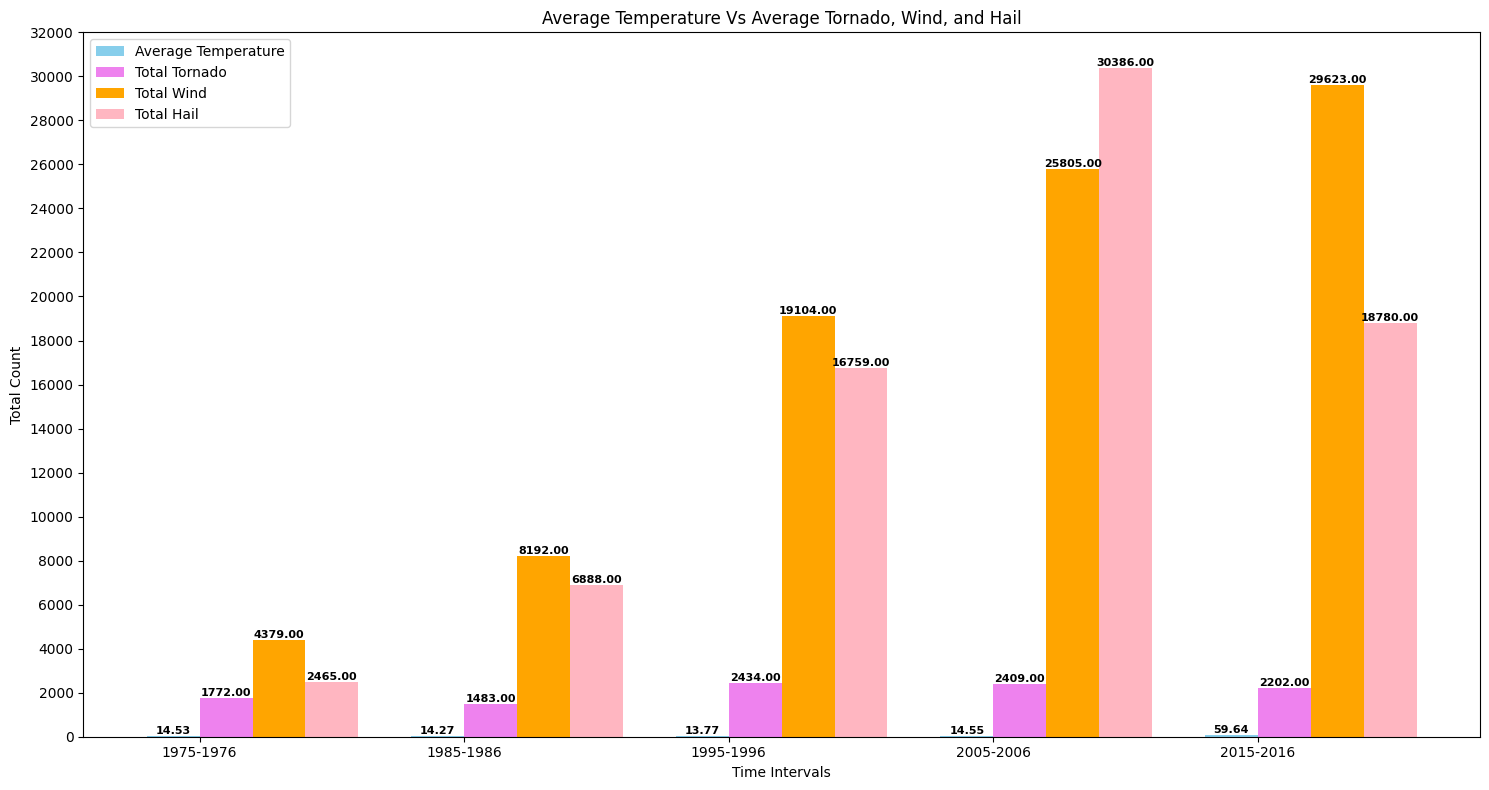

In [ ]:
#Noura Almasri's contribution
#Temperature Vs. All

time_intervals = [(1975,1976), (1985, 1986), (1995,1996), (2005, 2006), (2015, 2016)]

#List of files for temperature
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'unitedStates_2015-01-01_to_2016-12-31.csv']

avg_temp_data = []

for file_name, interval in zip(files, time_intervals):
    df = pd.read_csv(file_name)
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    interval_data = df[df['year'].between(interval[0], interval[1])]
    avg_temp = interval_data['temp'].mean()
    avg_temp_data.append(avg_temp)


yr_tornado_total = []

tornado_data = pd.read_csv('1950-2022_torn.csv')
for start_interval, end_interval in time_intervals:
    tornado_avg_data = tornado_data[tornado_data['yr'].between(start_interval, end_interval)]
    avg_tornado_yr = tornado_avg_data.shape[0]
    yr_tornado_total.append(avg_tornado_yr)

df_wind = pd.read_csv('1955-2022_wind.csv')

yr_wind_total = []

wind_data = pd.read_csv('1955-2022_wind.csv')
for start_interval, end_interval in time_intervals:
    wind_avg_data = wind_data[wind_data['yr'].between(start_interval, end_interval)]
    avg_wind_yr = wind_avg_data.shape[0]
    yr_wind_total.append(avg_wind_yr)


yr_hail_total = []

hail_data = pd.read_csv('1955-2022_hail.csv')
for start_interval, end_interval in time_intervals:
    hail_avg_data = hail_data[hail_data['yr'].between(start_interval, end_interval)]
    avg_hail_yr = hail_avg_data.shape[0]
    yr_hail_total.append(avg_hail_yr)

fig, ax = plt.subplots(figsize=(15,8))

bar_width = 0.20
index = np.arange(len(time_intervals))
bar1 = ax.bar(index, avg_temp_data, bar_width, label = 'Average Temperature', color='skyblue')

bar2 = ax.bar(index + bar_width, yr_tornado_total, bar_width, label='Total Tornado', color='violet')
bar3 = ax.bar(index + 2* bar_width, yr_wind_total, bar_width, label='Total Wind', color='orange')
bar4 = ax.bar(index +  3*bar_width, yr_hail_total, bar_width, label='Total Hail', color='lightpink')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels([f"{interval[0]}-{interval[1]}" for interval in time_intervals])
max_y = max(max(avg_temp_data), max(yr_tornado_total), max(yr_hail_total), max(yr_wind_total))
ax.set_yticks(range(0, max_y +2000,2000))
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Total Count')
ax.legend(loc='upper left')

ax.set_title('Average Temperature Vs Average Tornado, Wind, and Hail')

def bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

bar_labels(bar1)
bar_labels(bar2)
bar_labels(bar3)
bar_labels(bar4)

plt.tight_layout()
plt.show()






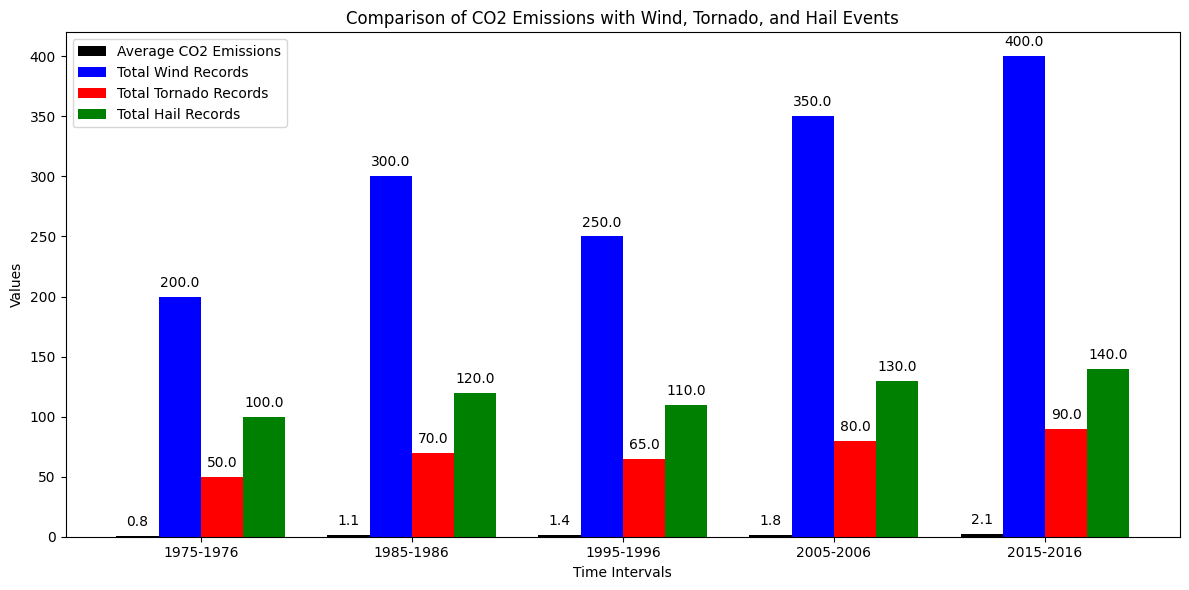

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data, replace with your actual data
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']
co2_averages = [0.8, 1.1, 1.4, 1.8, 2.1]  # Placeholder CO2 averages for each interval
wind_totals = [200, 300, 250, 350, 400]  # Placeholder total wind event counts
tornado_totals = [50, 70, 65, 80, 90]  # Placeholder total tornado counts
hail_totals = [100, 120, 110, 130, 140]  # Placeholder total hail counts

x = np.arange(len(interval_labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5 * width, co2_averages, width, label='Average CO2 Emissions', color='black')
rects2 = ax.bar(x - 0.5 * width, wind_totals, width, label='Total Wind Records', color='blue')
rects3 = ax.bar(x + 0.5 * width, tornado_totals, width, label='Total Tornado Records', color='red')
rects4 = ax.bar(x + 1.5 * width, hail_totals, width, label='Total Hail Records', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_title('Comparison of CO2 Emissions with Wind, Tornado, and Hail Events')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend()

# Adding value labels on top of each bar
def add_value_labels(ax, spacing=5):
    """Add labels to the top of each bar in a bar chart, displaying its height."""
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.1f}".format(y_value)
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

plt.tight_layout()
plt.show()


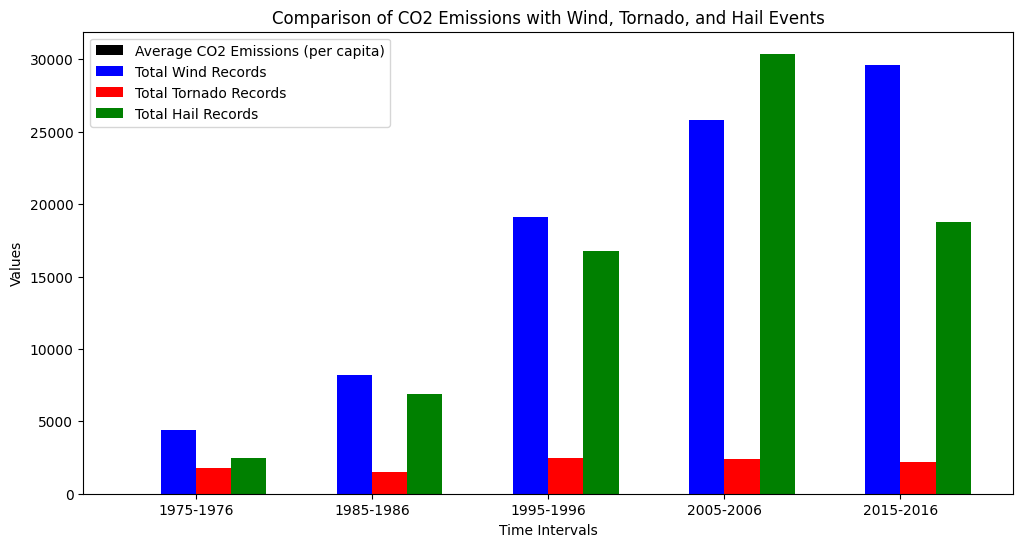

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Time intervals for the analysis
time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']

# Load CO2 data
df_co2 = pd.read_csv('CO2_Emissions_Data.csv')
co2_averages = []

# Calculate average CO2 emissions for each interval
for start_year, end_year in time_intervals:
    interval_data = df_co2[(df_co2['Year'] >= start_year) & (df_co2['Year'] <= end_year)]
    avg_co2 = interval_data['Annual CO₂ emissions (per capita)'].mean()
    co2_averages.append(avg_co2)

# Read and process wind, tornado, and hail data
df_wind = pd.read_csv('1955-2022_wind.csv')
df_tornado = pd.read_csv('1950-2022_torn.csv')
df_hail = pd.read_csv('1955-2022_hail.csv')

wind_totals, tornado_totals, hail_totals = [], [], []

# Summarize wind, tornado, and hail data for each interval
for start_year, end_year in time_intervals:
    # Wind data
    wind_data = df_wind[(df_wind['yr'] >= start_year) & (df_wind['yr'] <= end_year)]
    wind_totals.append(wind_data.shape[0])  # Total wind records

    # Tornado data
    tornado_data = df_tornado[(df_tornado['yr'] >= start_year) & (df_tornado['yr'] <= end_year)]
    tornado_totals.append(tornado_data.shape[0])  # Total tornado records

    # Hail data
    hail_data = df_hail[(df_hail['yr'] >= start_year) & (df_hail['yr'] <= end_year)]
    hail_totals.append(hail_data.shape[0])  # Total hail records

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(interval_labels))  # the label locations
width = 0.2  # the width of the bars

ax.bar(x - 1.5 * width, co2_averages, width, label='Average CO2 Emissions (per capita)', color='black')
ax.bar(x - 0.5 * width, wind_totals, width, label='Total Wind Records', color='blue')
ax.bar(x + 0.5 * width, tornado_totals, width, label='Total Tornado Records', color='red')
ax.bar(x + 1.5 * width, hail_totals, width, label='Total Hail Records', color='green')

ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_title('Comparison of CO2 Emissions with Wind, Tornado, and Hail Events')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend()

plt.show()


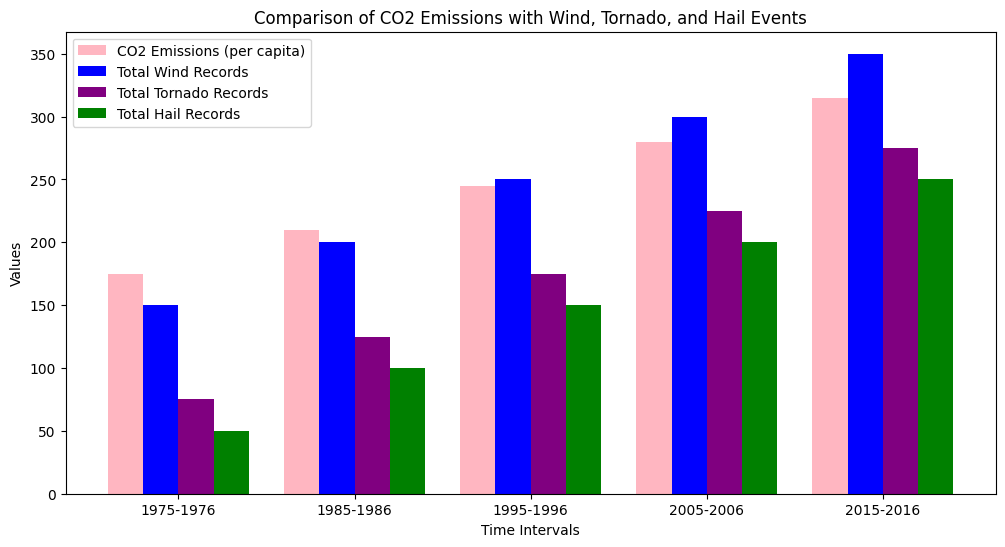

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Time intervals and labels
time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']

# Example data for illustration
co2_averages = [0.5, 0.6, 0.7, 0.8, 0.9]
wind_totals = [150, 200, 250, 300, 350]
tornado_totals = [75, 125, 175, 225, 275]
hail_totals = [50, 100, 150, 200, 250]

# Find the maximum value among wind, tornado, and hail counts
max_event = max(max(wind_totals), max(tornado_totals), max(hail_totals))

# Normalize only CO2 data using the maximum from the event counts
norm_co2_averages = [x * max_event for x in co2_averages]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(interval_labels))  # the label locations
width = 0.2  # the width of the bars

ax.bar(x - 1.5 * width, norm_co2_averages, width, label='CO2 Emissions (per capita)', color='lightpink')
ax.bar(x - 0.5 * width, wind_totals, width, label='Total Wind Records', color='blue')
ax.bar(x + 0.5 * width, tornado_totals, width, label='Total Tornado Records', color='purple')
ax.bar(x + 1.5 * width, hail_totals, width, label='Total Hail Records', color='green')

ax.set_xlabel('Time Intervals')
ax.set_ylabel('Values')
ax.set_title('Comparison of CO2 Emissions with Wind, Tornado, and Hail Events')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend()

plt.show()


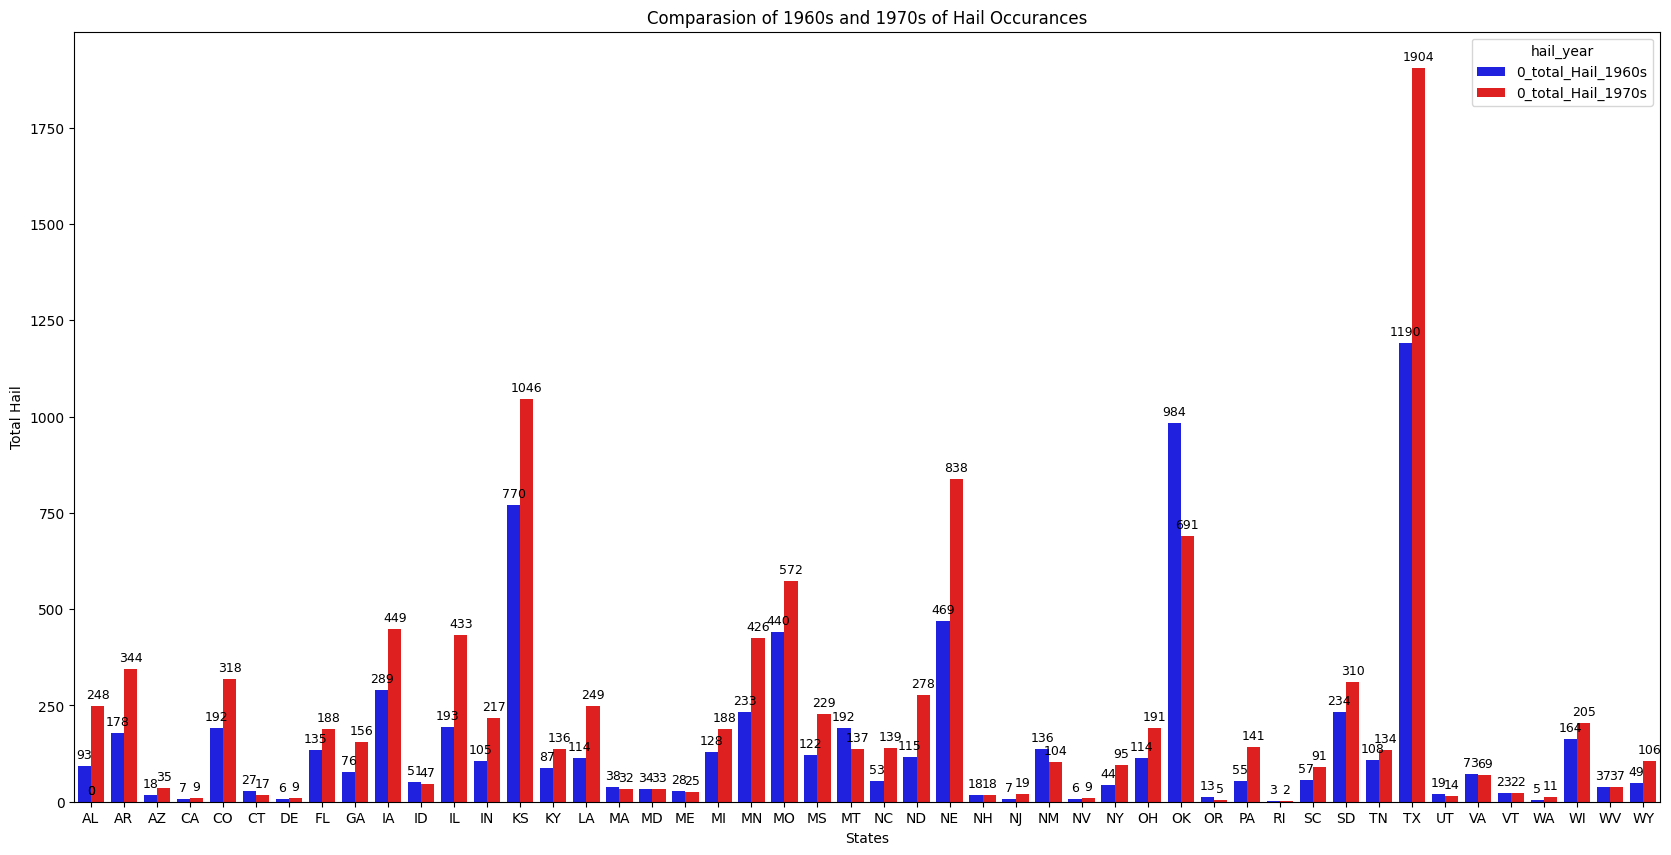

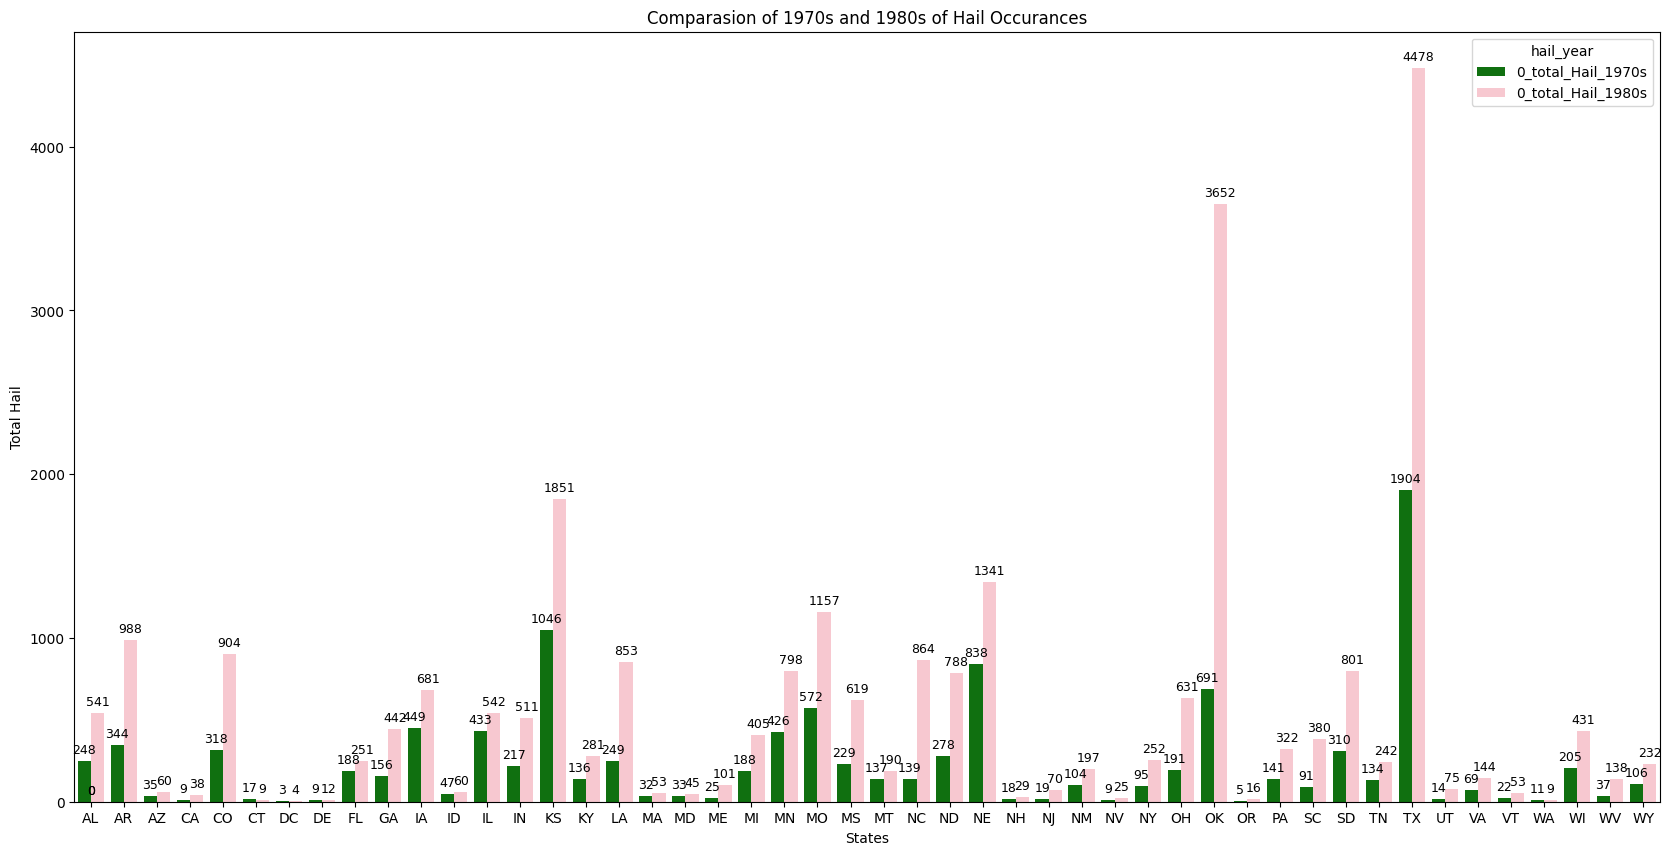

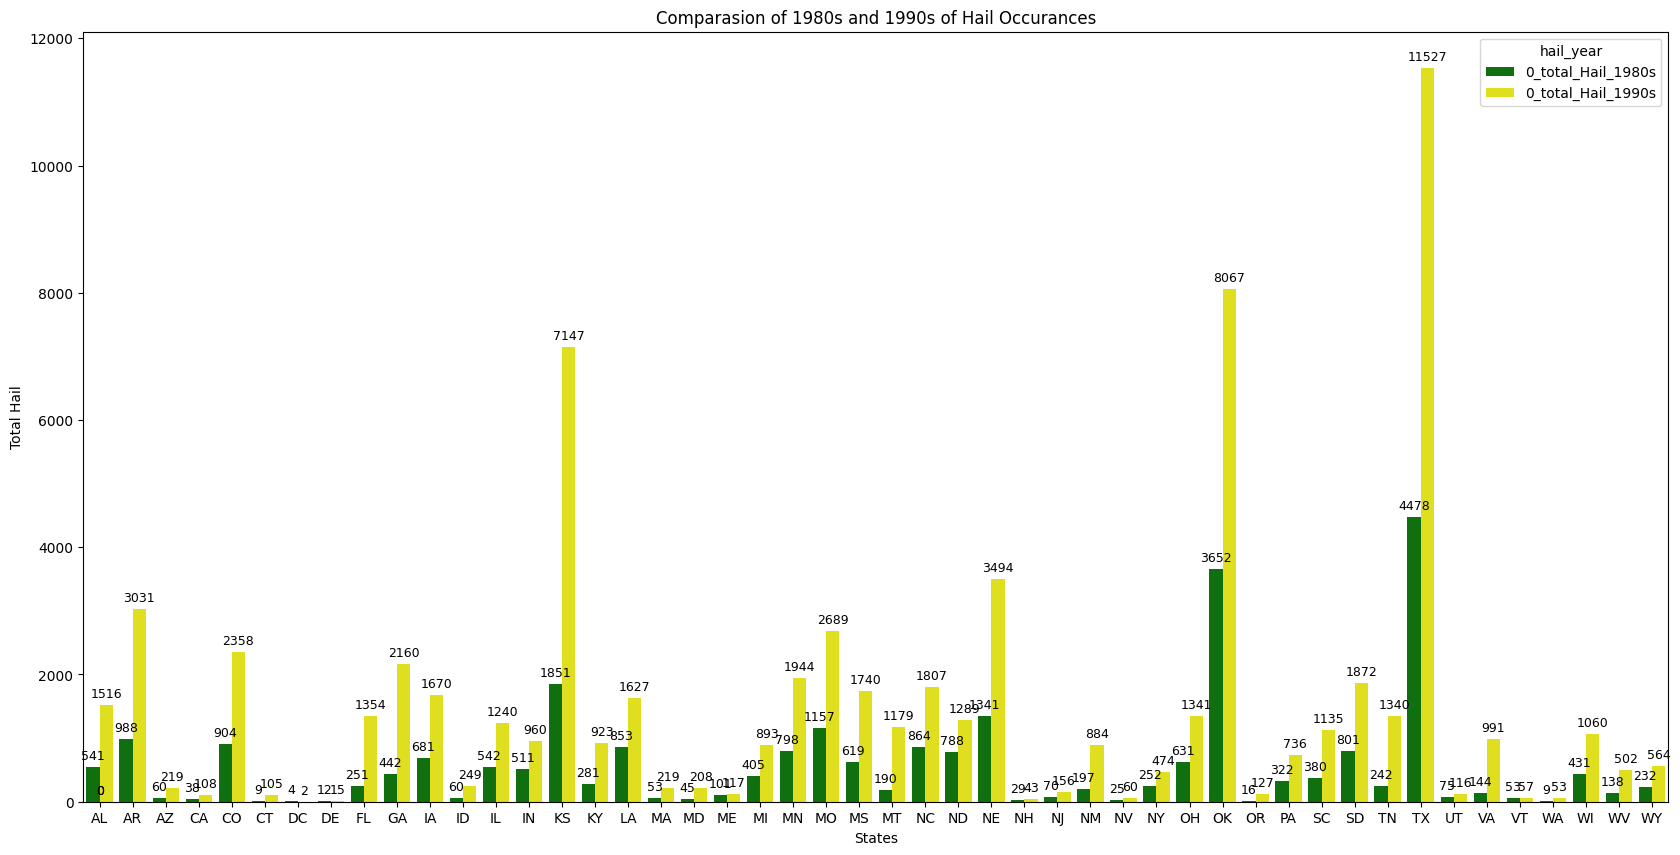

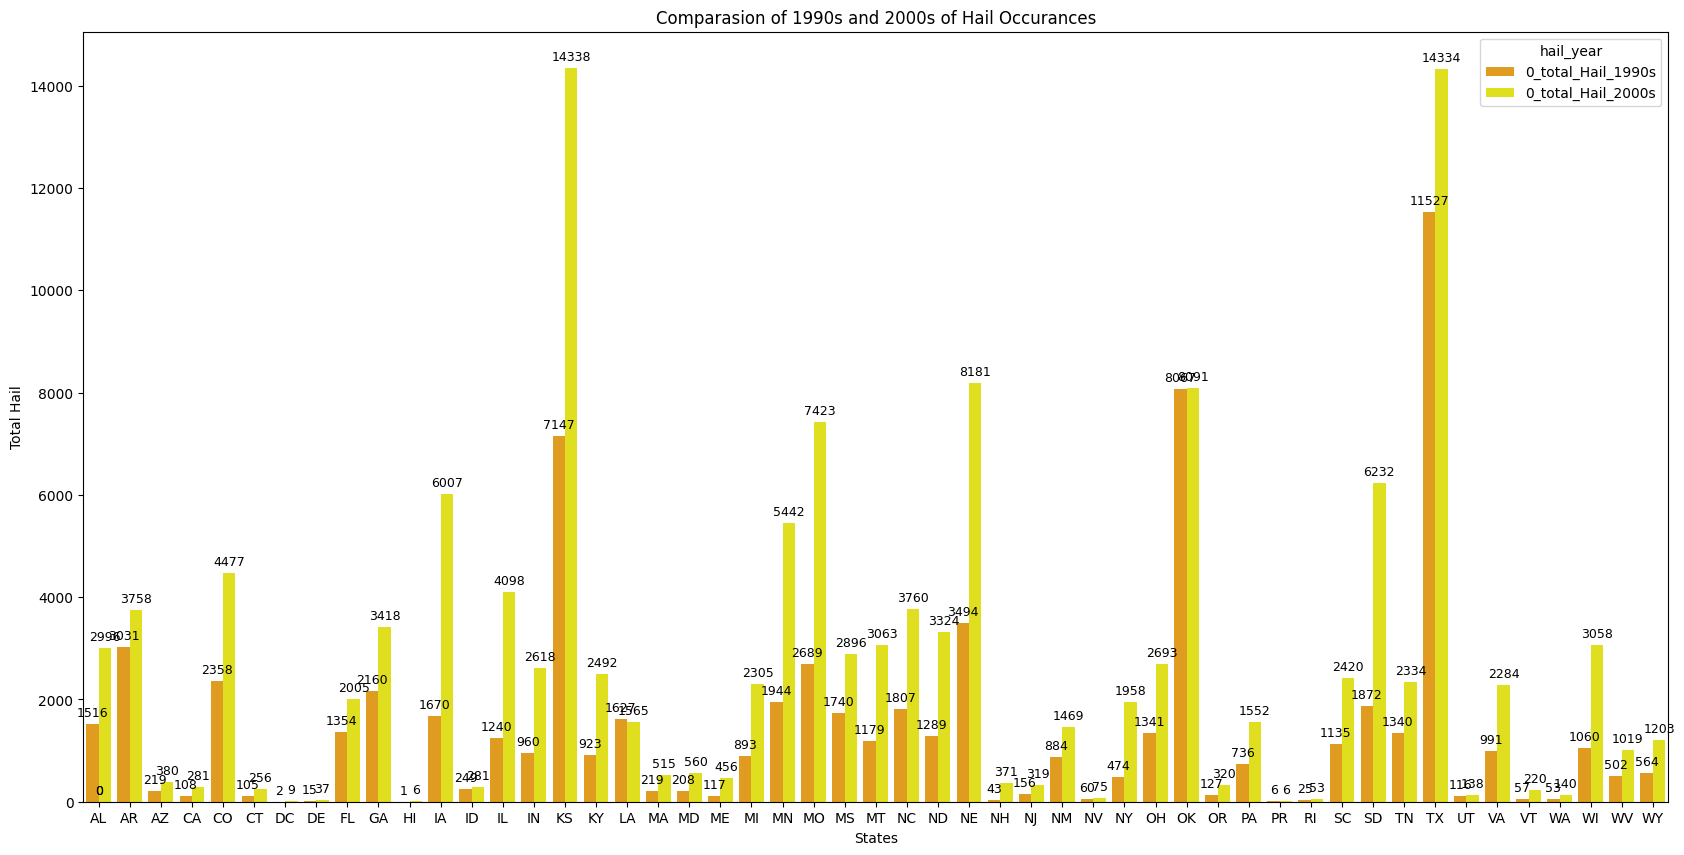

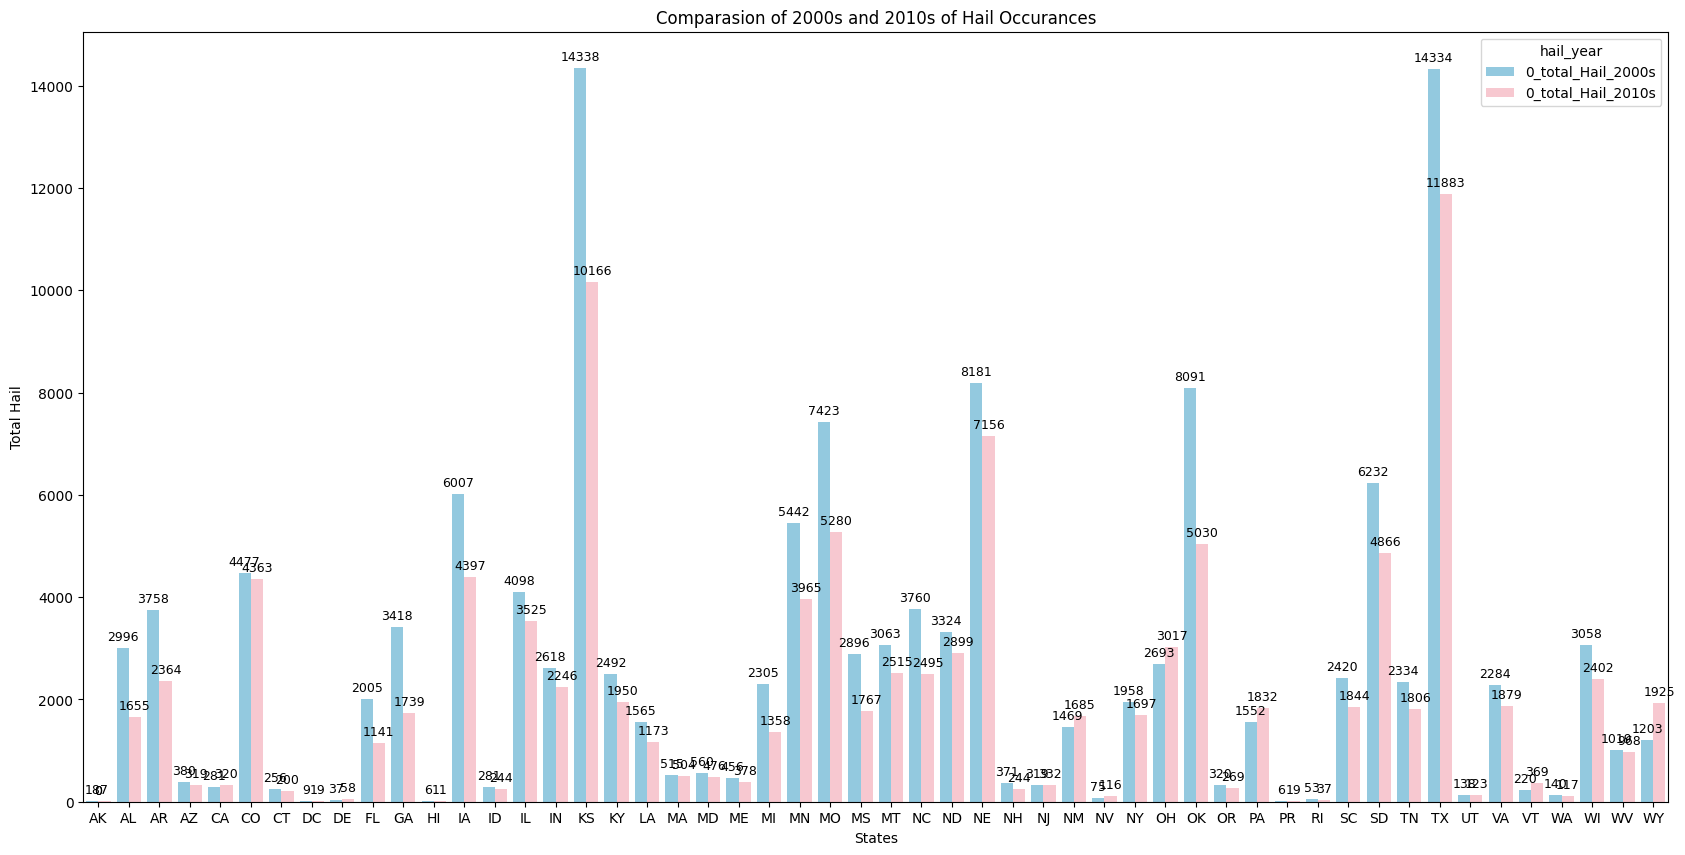

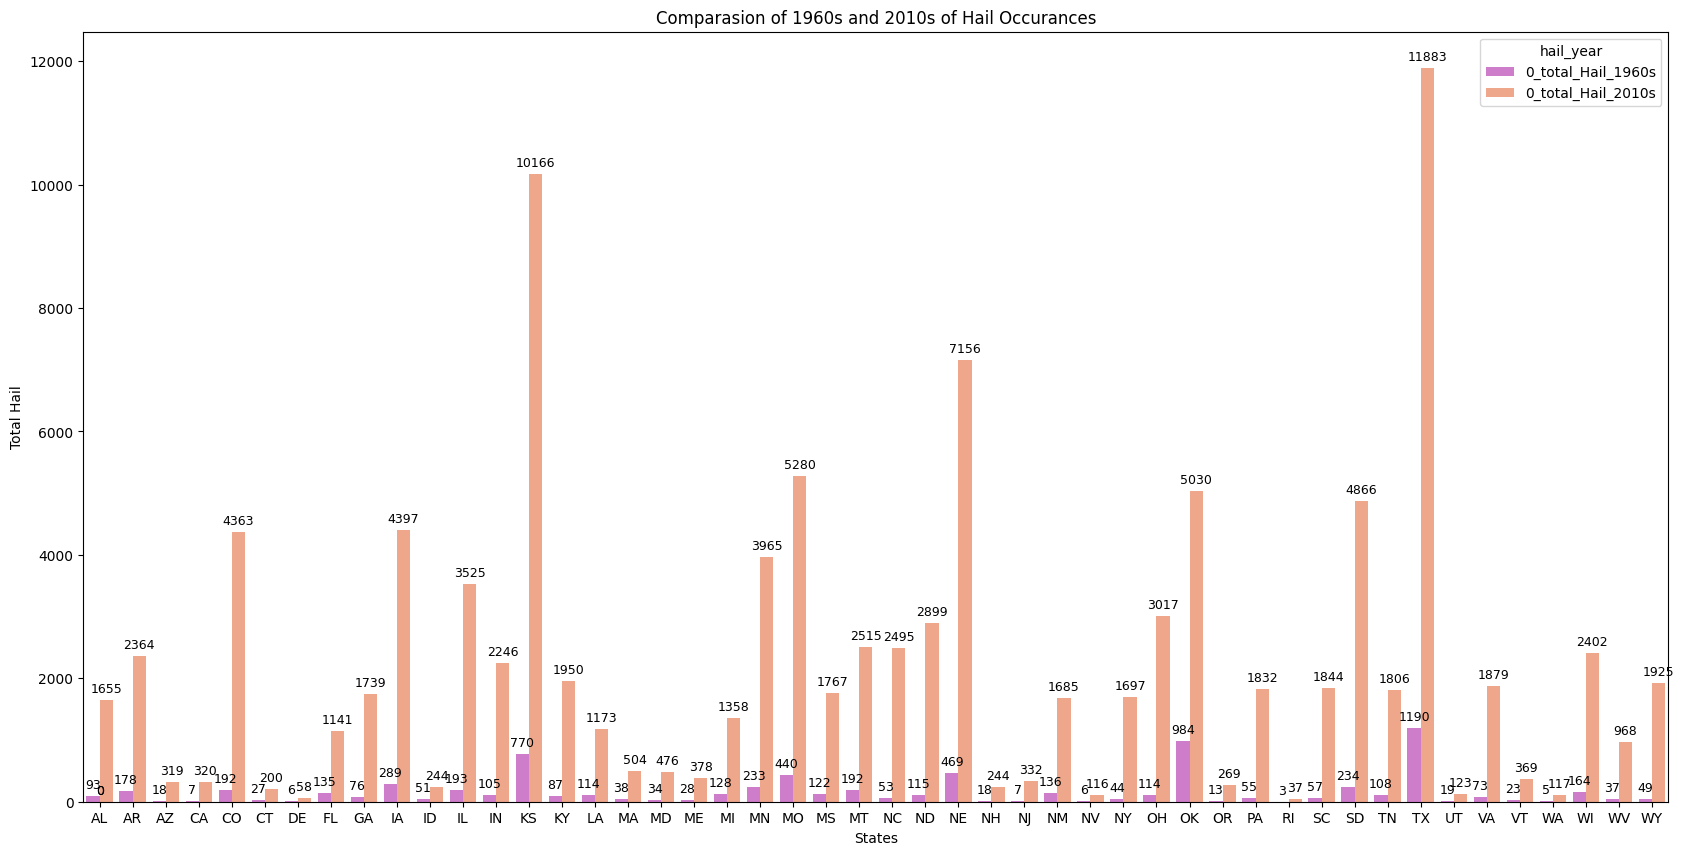

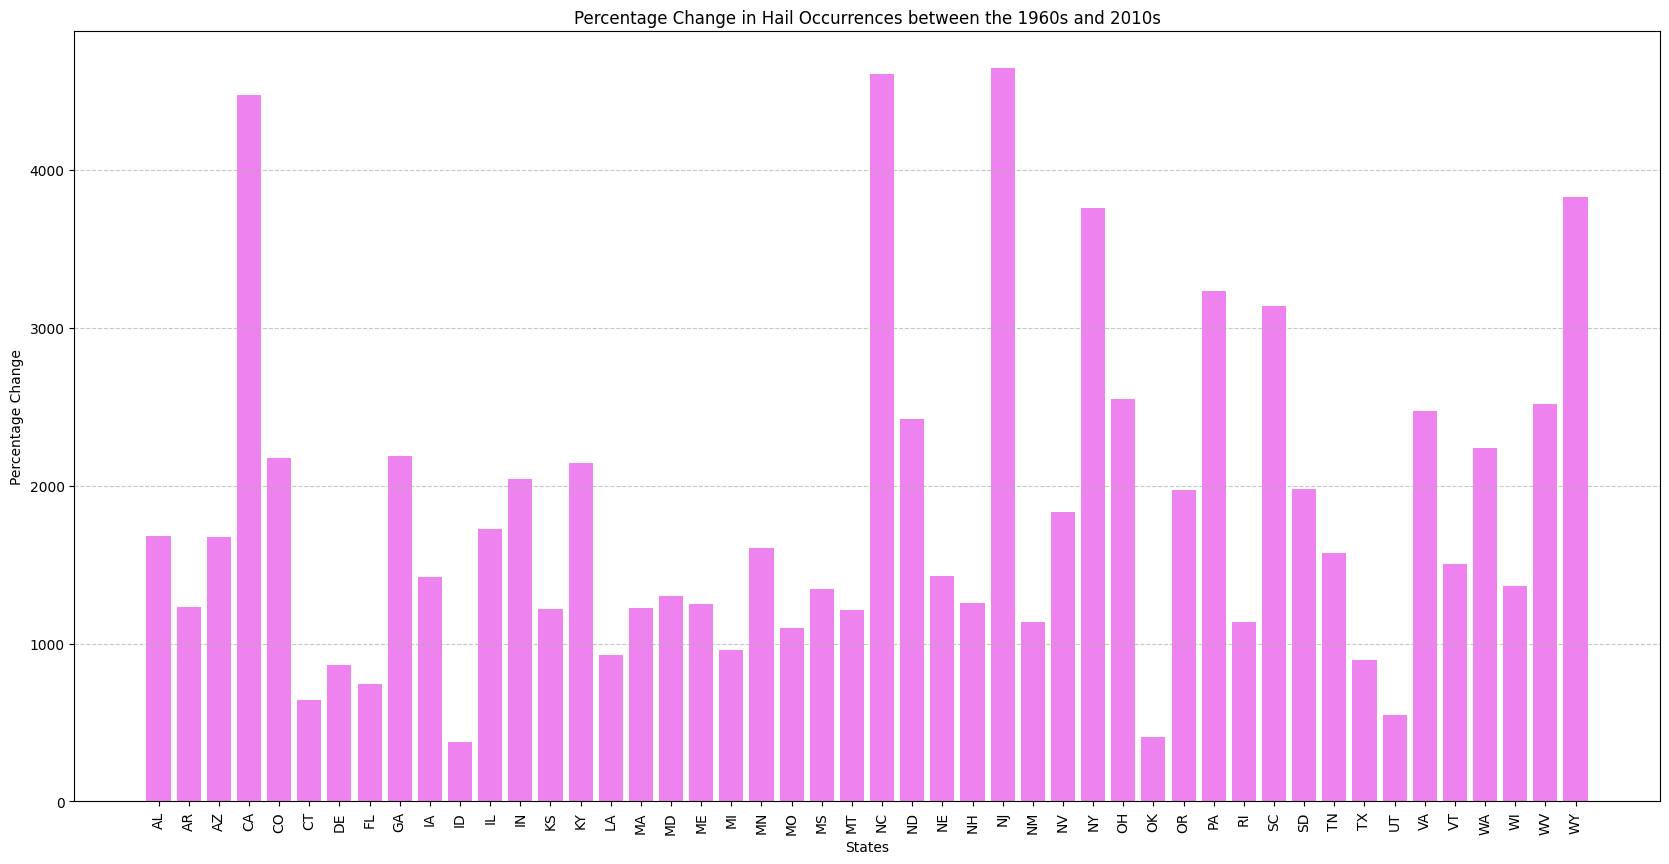

In [ ]:
# Noura Almasri's Contribution
# Hail Data:
hail_data = pd.read_csv('1955-2022_hail.csv')
hail_data['state_name'] = hail_data['st']
total_hail_1960s = hail_data[hail_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_hail_1970s = hail_data[hail_data['yr'].between(1970,1979)].groupby('state_name').size().reset_index()

combined_df = pd.merge(total_hail_1960s, total_hail_1970s, on='state_name', suffixes=('_total_Hail_1960s', '_total_Hail_1970s'))
two_plots = combined_df.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1960_1970')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph1 = sns.barplot(data=two_plots, x ='state_name', y='total_hail_1960_1970',hue='hail_year', palette = ['blue', 'red'])
for bar in graph1.patches:
    graph1.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 1970s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")

total_hail_1980s = hail_data[hail_data['yr'].between(1980,1989)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_1970s, total_hail_1980s, on='state_name', suffixes=('_total_Hail_1970s', '_total_Hail_1980s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1970_1980')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph2 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1970_1980',hue='hail_year', palette = ['green', 'pink'])
for bar in graph2.patches:
    graph2.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1970s and 1980s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")

total_hail_1990s = hail_data[hail_data['yr'].between(1990,1999)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_1980s, total_hail_1990s, on='state_name', suffixes=('_total_Hail_1980s', '_total_Hail_1990s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1980_1990')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph3 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1980_1990',hue='hail_year', palette = ['green', 'yellow'])
for bar in graph3.patches:
    graph3.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1980s and 1990s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")


total_hail_2000s = hail_data[hail_data['yr'].between(2000,2009)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_1990s, total_hail_2000s, on='state_name', suffixes=('_total_Hail_1990s', '_total_Hail_2000s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1990_2000')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph4 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1990_2000',hue='hail_year', palette = ['orange', 'yellow'])
for bar in graph4.patches:
    graph4.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1990s and 2000s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")


total_hail_2010s = hail_data[hail_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_hail_2000s, total_hail_2010s, on='state_name', suffixes=('_total_Hail_2000s', '_total_Hail_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_2000_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph5 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_2000_2010',hue='hail_year', palette = ['skyblue', 'pink'])
for bar in graph5.patches:
    graph5.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 2000s and 2010s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")

combined_df1 = pd.merge(total_hail_1960s, total_hail_2010s, on='state_name', suffixes=('_total_Hail_1960s', '_total_Hail_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='hail_year', value_name='total_hail_1960_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph6 = sns.barplot(data=two_plots1, x ='state_name', y='total_hail_1960_2010',hue='hail_year', palette = ['orchid', 'lightSalmon'])
for bar in graph6.patches:
    graph6.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 2010s of Hail Occurances")
plt.xlabel("States")
plt.ylabel("Total Hail")
###Percentage increase/decrease#######

percentage_changes = {}

total_count_1960s = hail_data[hail_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_count_2010s = hail_data[hail_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
merged_counts = pd.merge(total_count_1960s, total_count_2010s, on ='state_name', suffixes = ('_1960s', '_2010s'))
merged_counts['percentage_change'] = ((merged_counts['0_2010s'] - merged_counts['0_1960s']) / merged_counts['0_1960s'])*100
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
plt.bar(merged_counts['state_name'], merged_counts['percentage_change'], color=['violet' if x > 0 else 'red' for x in merged_counts['percentage_change']])
plt.title('Percentage Change in Hail Occurrences between the 1960s and 2010s')
plt.xlabel('States')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Explanation for Hail occurances:
The above graphs represent a visualization of the hail occurances from 1960 to 2019. The first 6 graphs show the comparasion the decade vs how much hail has occured that decade. The last graph shows the percentage increase/decrease of hail occurances in the 1960s compared to the 2010 decade.

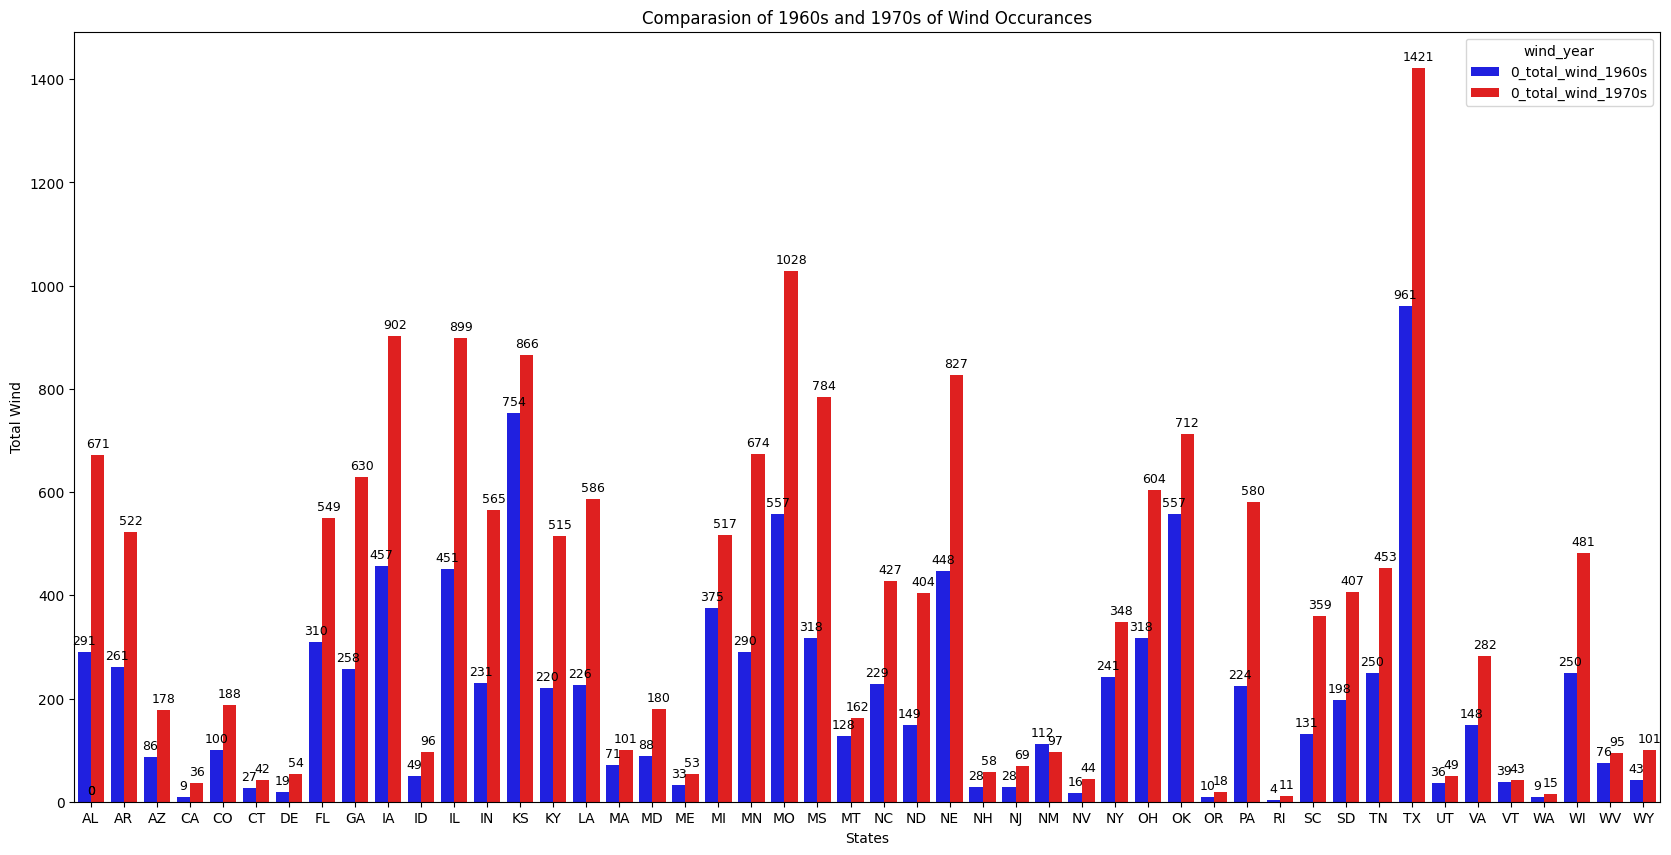

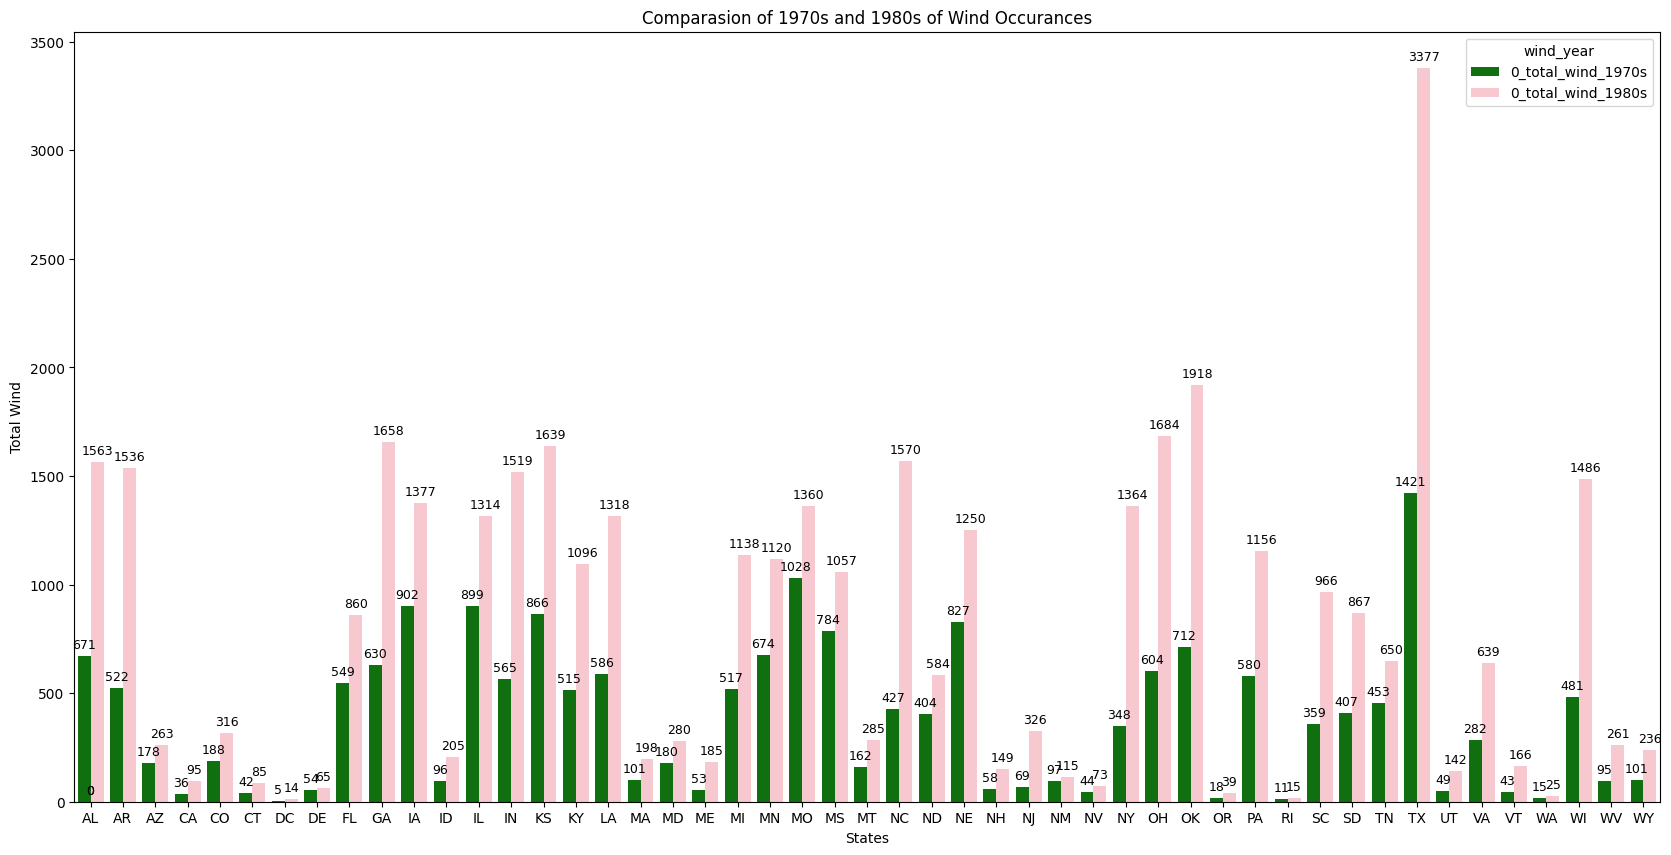

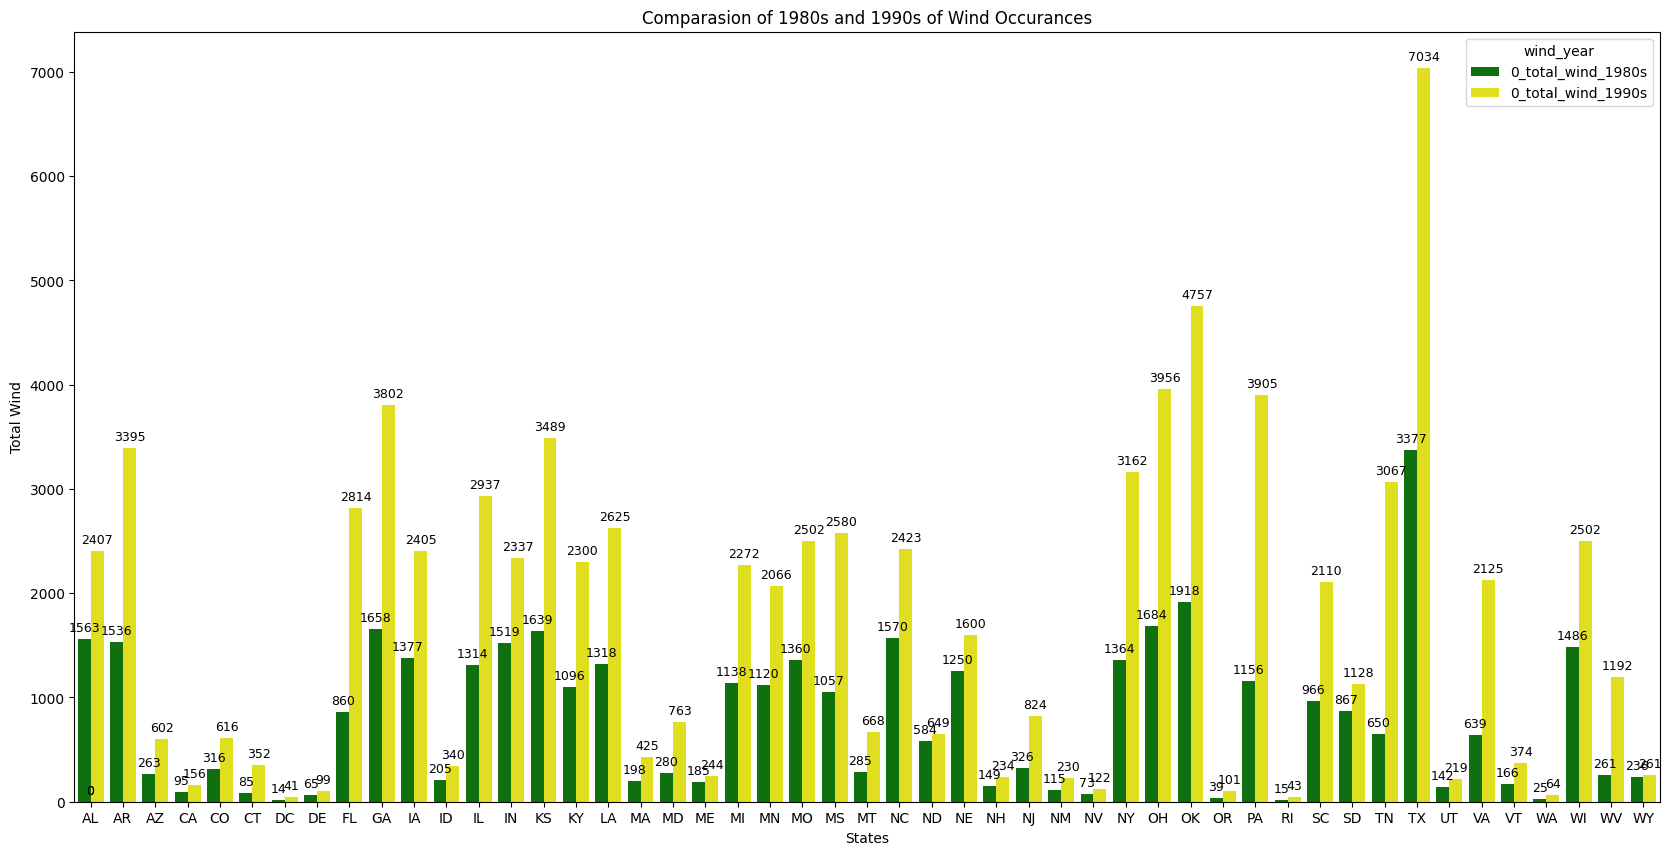

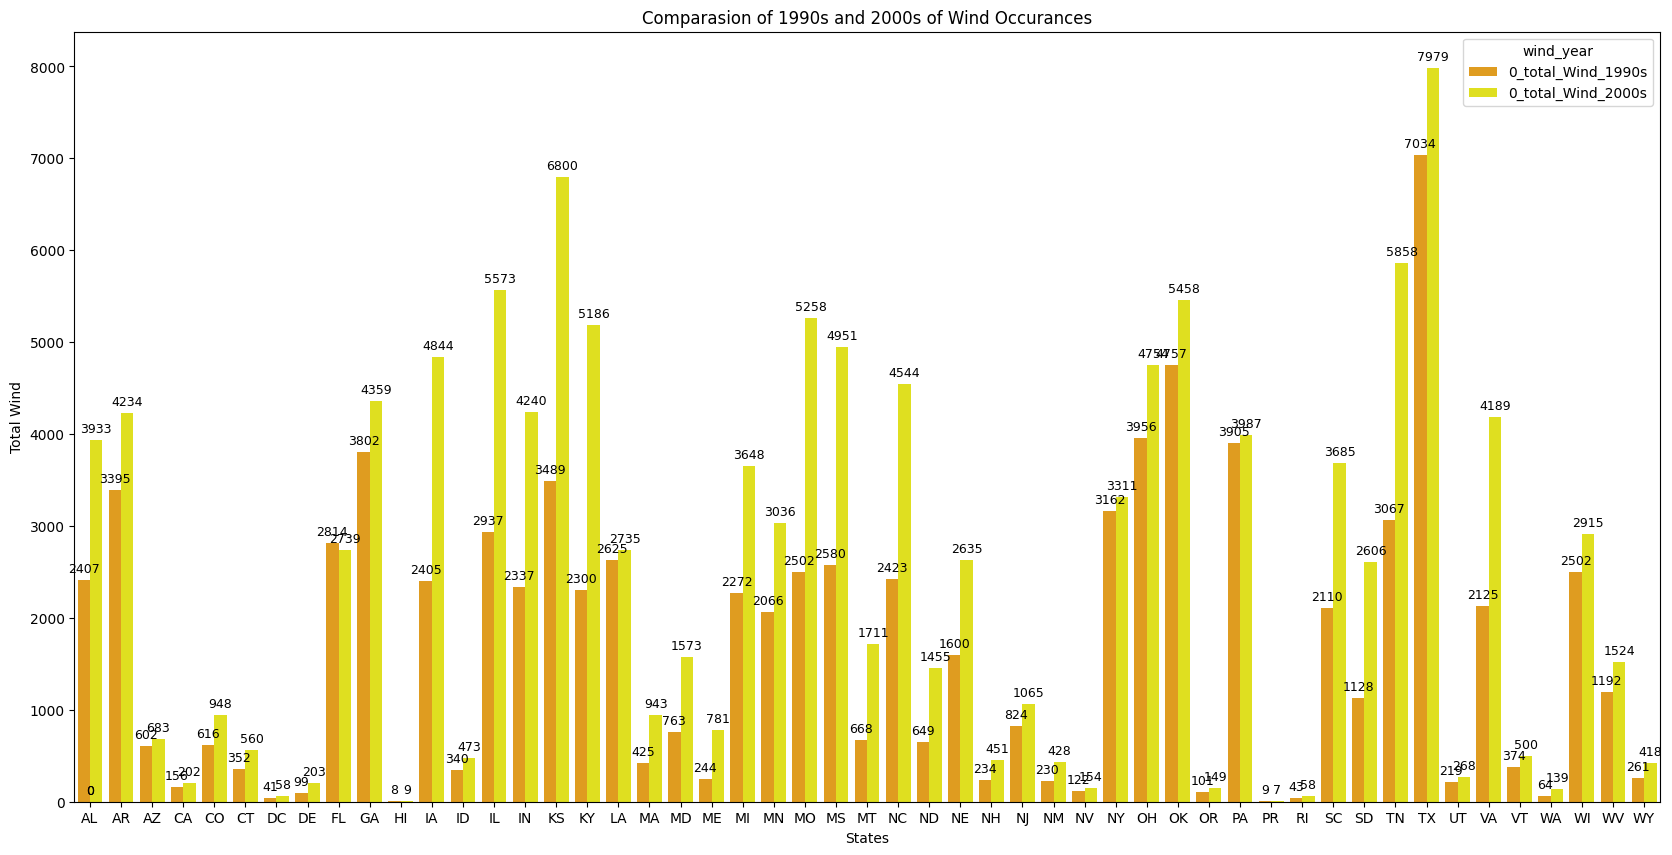

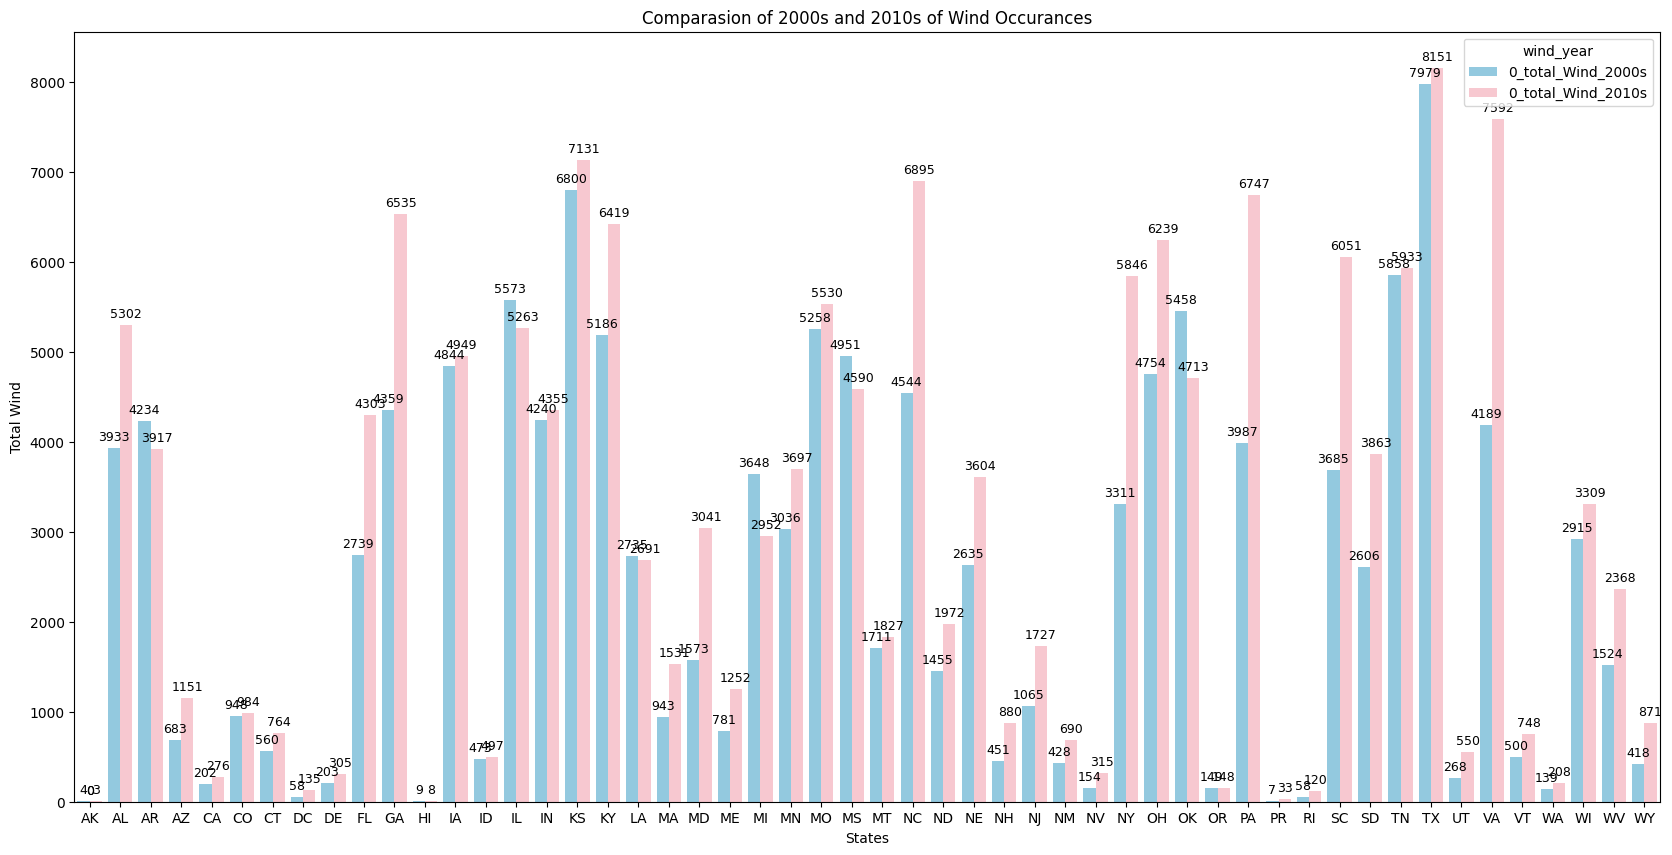

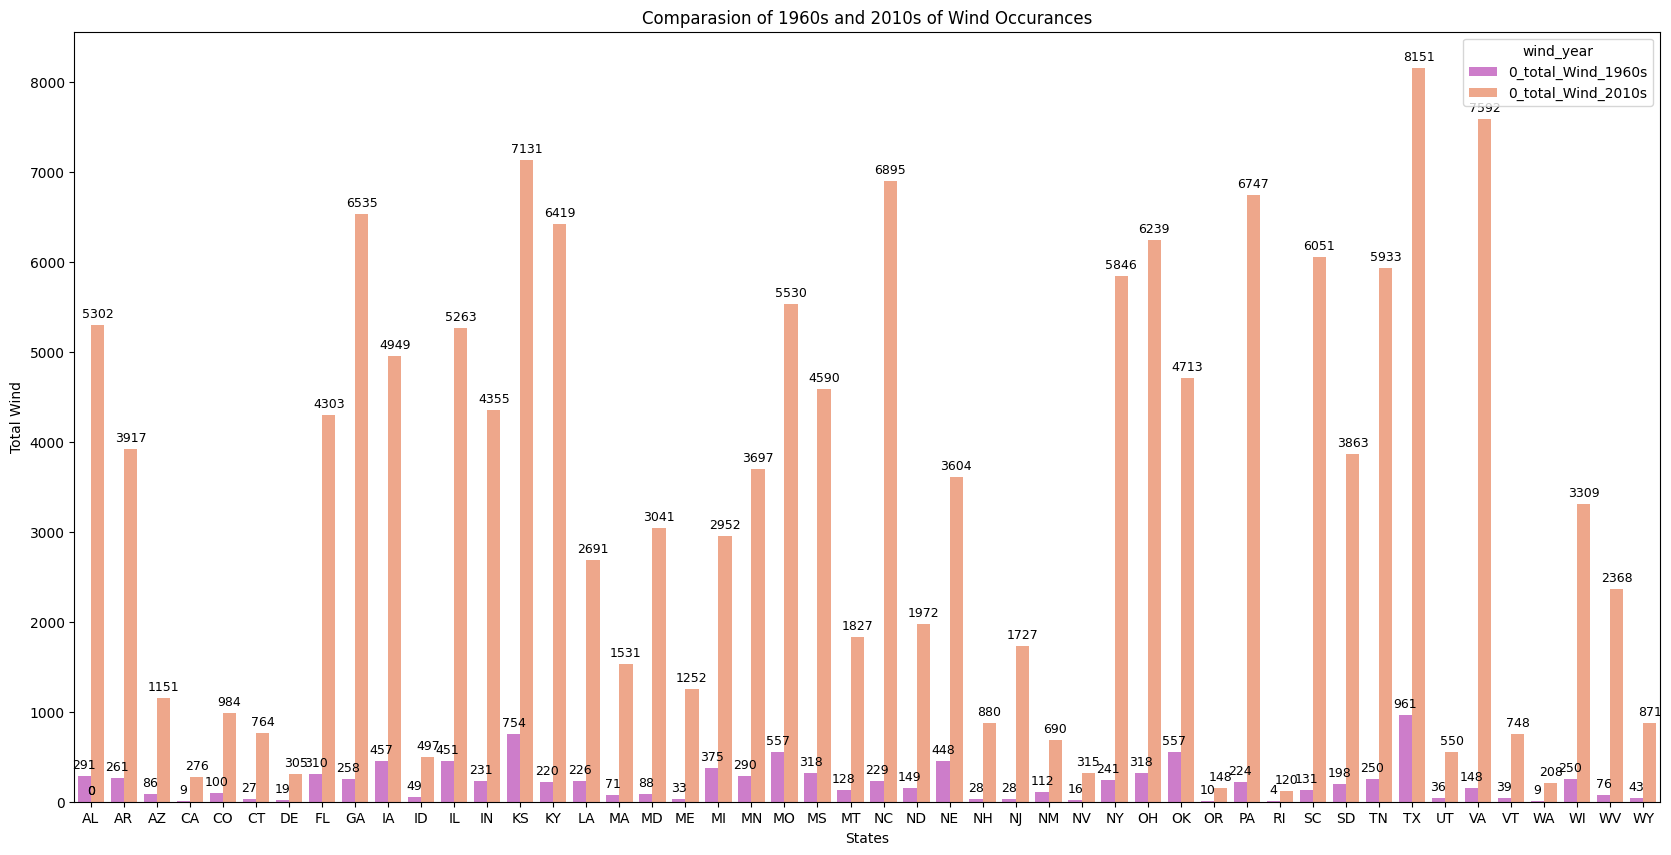

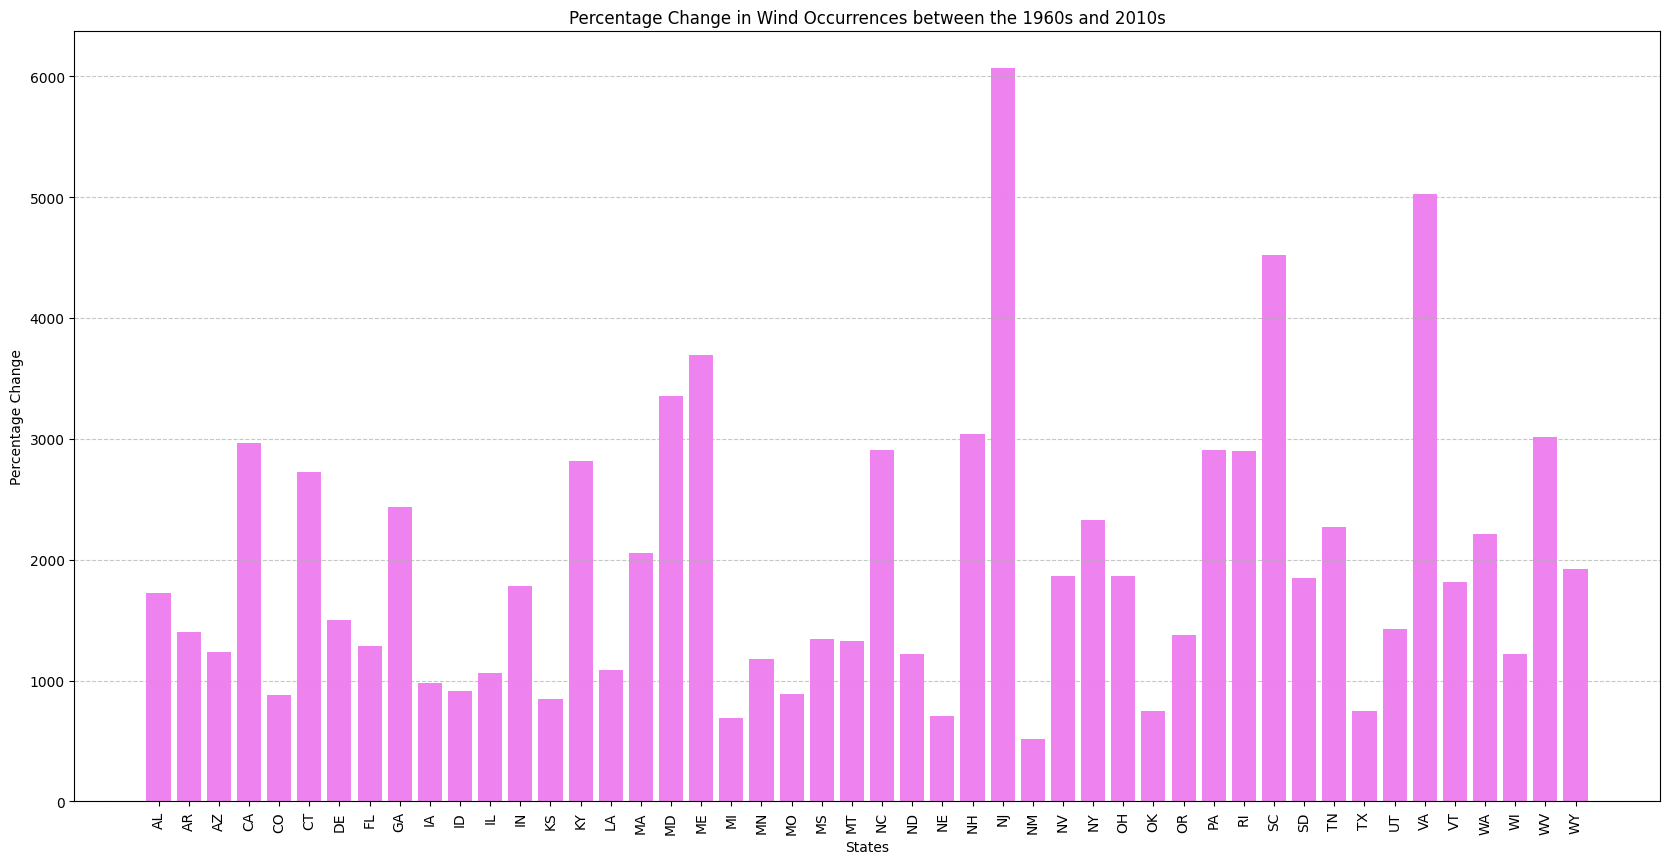

In [ ]:
# Noura Almasri's Contribution
# Wind Data:
import warnings
warnings.filterwarnings('ignore')
wind_data = pd.read_csv('1955-2022_wind.csv')
wind_data['state_name'] = wind_data['st']
total_wind_1960s = wind_data[wind_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_wind_1970s = wind_data[wind_data['yr'].between(1970,1979)].groupby('state_name').size().reset_index()

combined_df = pd.merge(total_wind_1960s, total_wind_1970s, on='state_name', suffixes=('_total_wind_1960s', '_total_wind_1970s'))
two_plots = combined_df.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1960_1970')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph1 = sns.barplot(data=two_plots, x ='state_name', y='total_wind_1960_1970',hue='wind_year', palette = ['blue', 'red'])
for bar in graph1.patches:
    graph1.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 1970s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")

total_wind_1980s = wind_data[wind_data['yr'].between(1980,1989)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_1970s, total_wind_1980s, on='state_name', suffixes=('_total_wind_1970s', '_total_wind_1980s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1970_1980')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph2 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1970_1980',hue='wind_year', palette = ['green', 'pink'])
for bar in graph2.patches:
    graph2.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1970s and 1980s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")

total_wind_1990s = wind_data[wind_data['yr'].between(1990,1999)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_1980s, total_wind_1990s, on='state_name', suffixes=('_total_wind_1980s', '_total_wind_1990s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1980_1990')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph3 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1980_1990',hue='wind_year', palette = ['green', 'yellow'])
for bar in graph3.patches:
    graph3.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1980s and 1990s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")


total_wind_2000s = wind_data[wind_data['yr'].between(2000,2009)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_1990s, total_wind_2000s, on='state_name', suffixes=('_total_Wind_1990s', '_total_Wind_2000s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1990_2000')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph4 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1990_2000',hue='wind_year', palette = ['orange', 'yellow'])
for bar in graph4.patches:
    graph4.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1990s and 2000s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")


total_wind_2010s = wind_data[wind_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
combined_df1 = pd.merge(total_wind_2000s, total_wind_2010s, on='state_name', suffixes=('_total_Wind_2000s', '_total_Wind_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_2000_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph5 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_2000_2010',hue='wind_year', palette = ['skyblue', 'pink'])
for bar in graph5.patches:
    graph5.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 2000s and 2010s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")

combined_df1 = pd.merge(total_wind_1960s, total_wind_2010s, on='state_name', suffixes=('_total_Wind_1960s', '_total_Wind_2010s'))
two_plots1 = combined_df1.melt(id_vars='state_name',var_name='wind_year', value_name='total_wind_1960_2010')
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
graph6 = sns.barplot(data=two_plots1, x ='state_name', y='total_wind_1960_2010',hue='wind_year', palette = ['orchid', 'lightSalmon'])
for bar in graph6.patches:
    graph6.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha = 'center', va='center',
                    size = 9, xytext=(0,8),
                    textcoords='offset points')
plt.title("Comparasion of 1960s and 2010s of Wind Occurances")
plt.xlabel("States")
plt.ylabel("Total Wind")
###Percentage increase/decrease#######

percentage_changes = {}

total_count_1960s = wind_data[wind_data['yr'].between(1960,1969)].groupby('state_name').size().reset_index()
total_count_2010s = wind_data[wind_data['yr'].between(2010,2019)].groupby('state_name').size().reset_index()
merged_counts = pd.merge(total_count_1960s, total_count_2010s, on ='state_name', suffixes = ('_1960s', '_2010s'))
merged_counts['percentage_change'] = ((merged_counts['0_2010s'] - merged_counts['0_1960s']) / merged_counts['0_1960s'])*100
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
plt.bar(merged_counts['state_name'], merged_counts['percentage_change'], color=['violet' if x > 0 else 'red' for x in merged_counts['percentage_change']])
plt.title('Percentage Change in Wind Occurrences between the 1960s and 2010s')
plt.xlabel('States')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Explantion for Wind Occurances:
The above graphs represent a visualization of the Wind occurances from 1960 to 2019. The first 6 graphs show the comparasion the decade vs how much hail has occured that decade. The last graph shows the percentage increase/decrease of wind occurances in the 1960s compared to the 2010 decade if the wind increased it will show in a vilot color but if it decreased it will show in a red color and as seen on the graph all wind data had an increase in wind occurances.


<Figure size 1800x600 with 0 Axes>

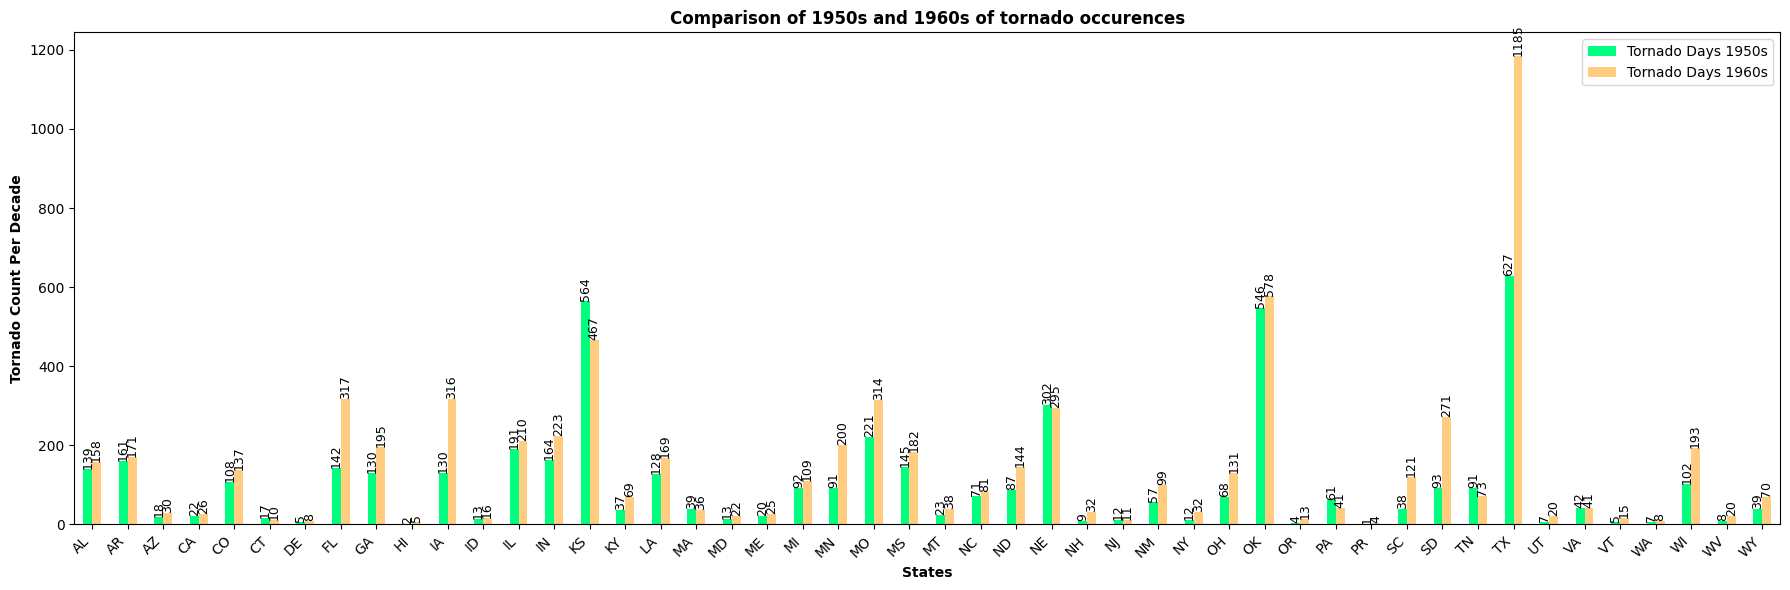

<Figure size 1800x600 with 0 Axes>

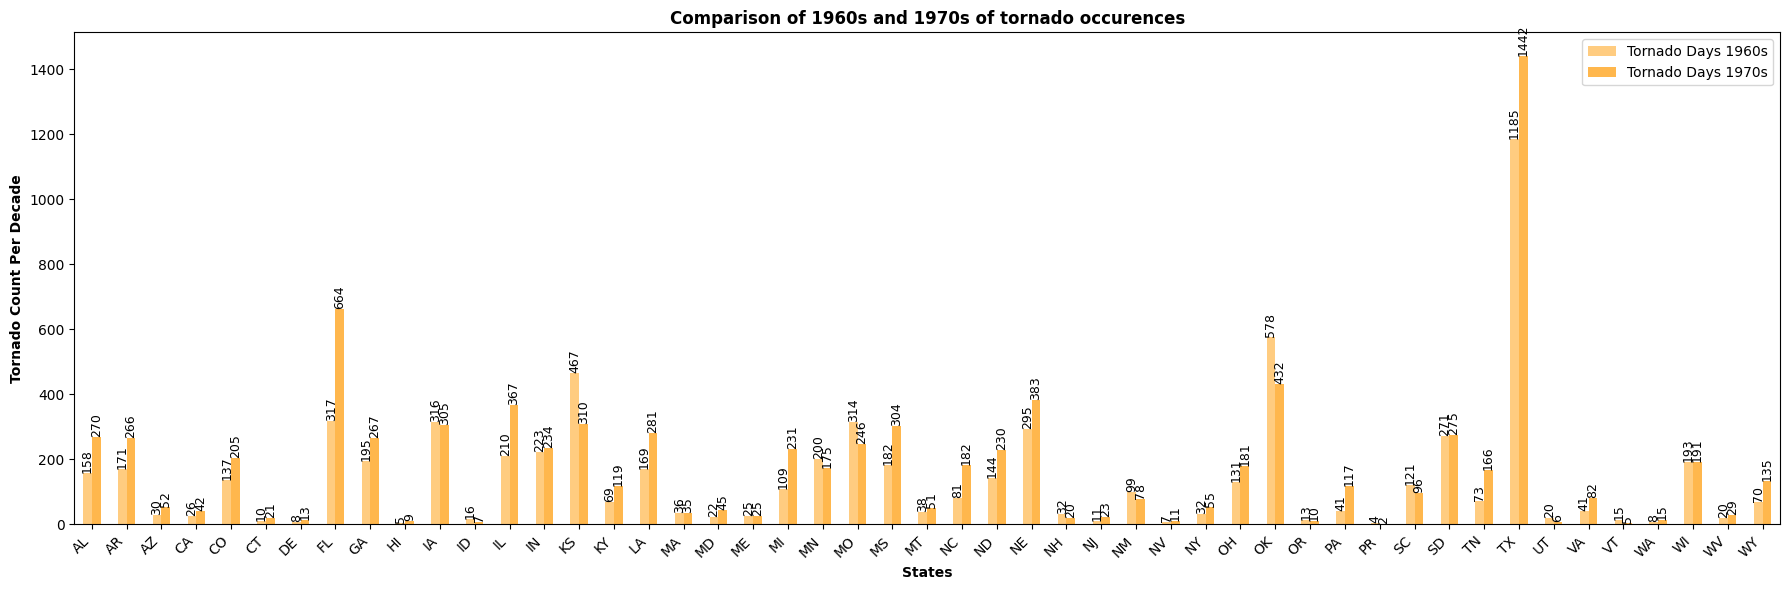

<Figure size 1800x600 with 0 Axes>

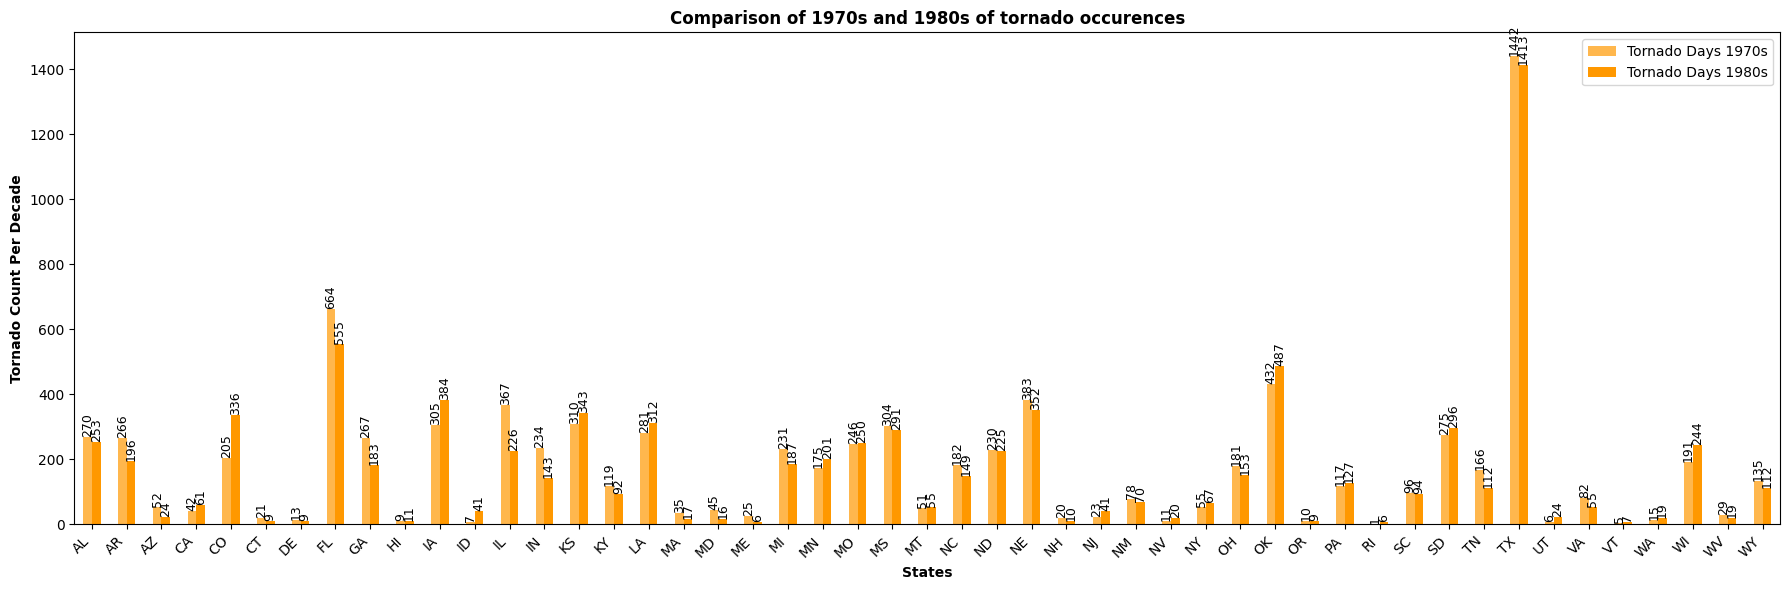

<Figure size 1800x600 with 0 Axes>

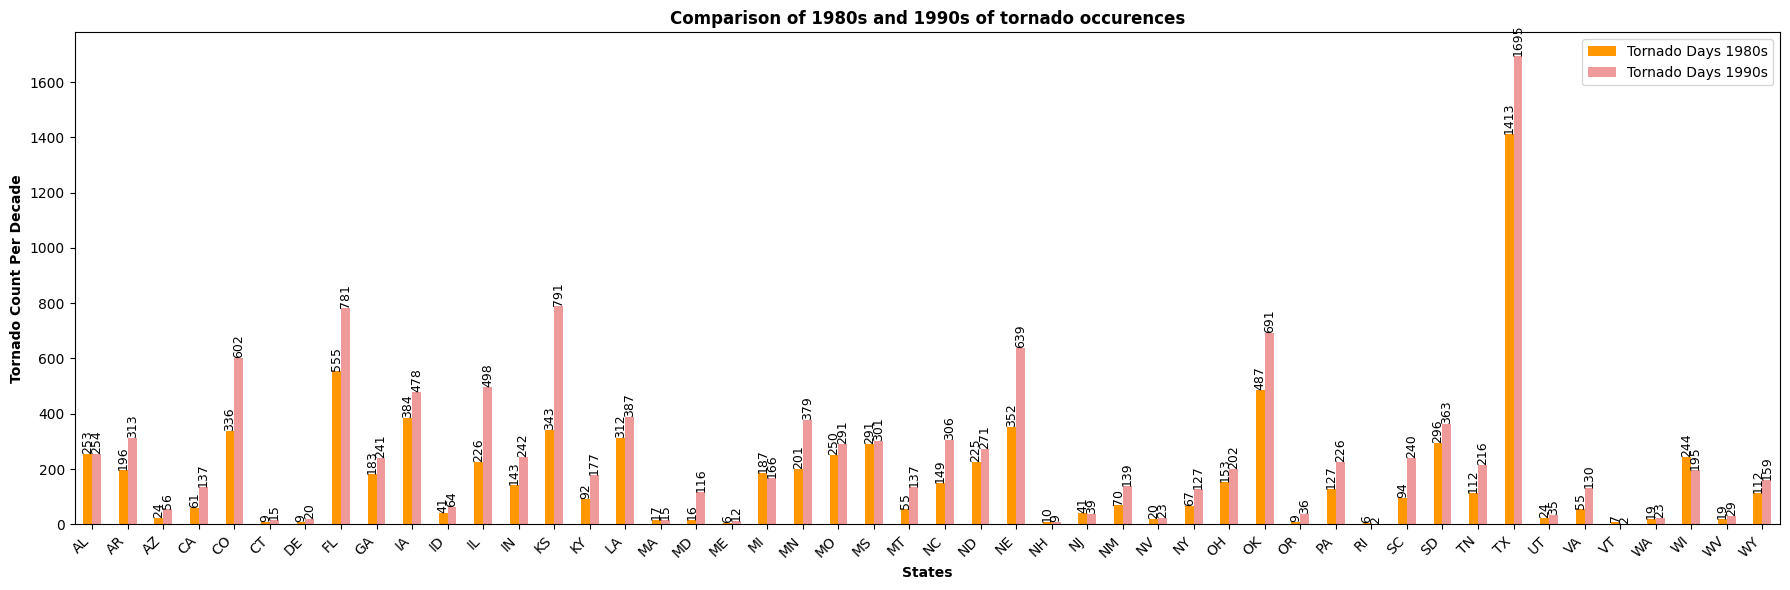

<Figure size 1800x600 with 0 Axes>

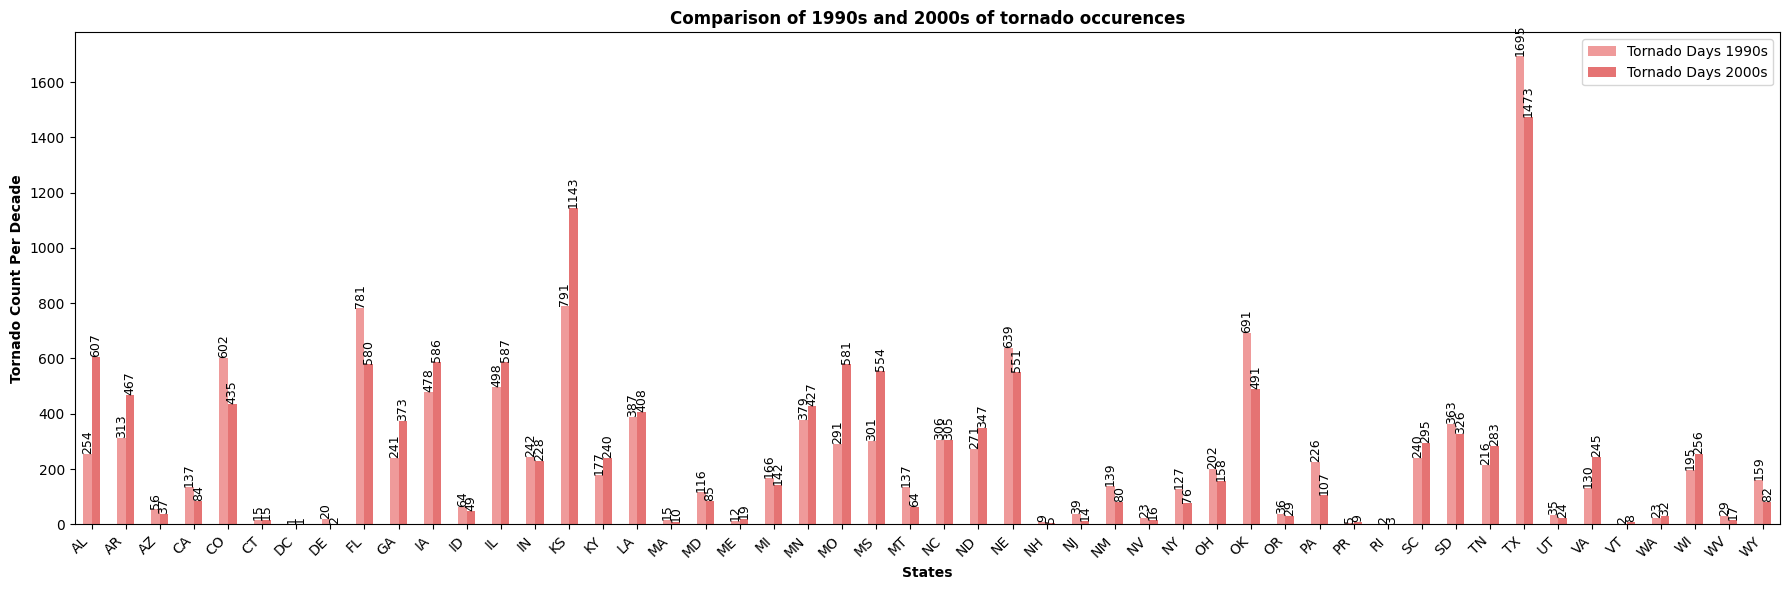

<Figure size 1800x600 with 0 Axes>

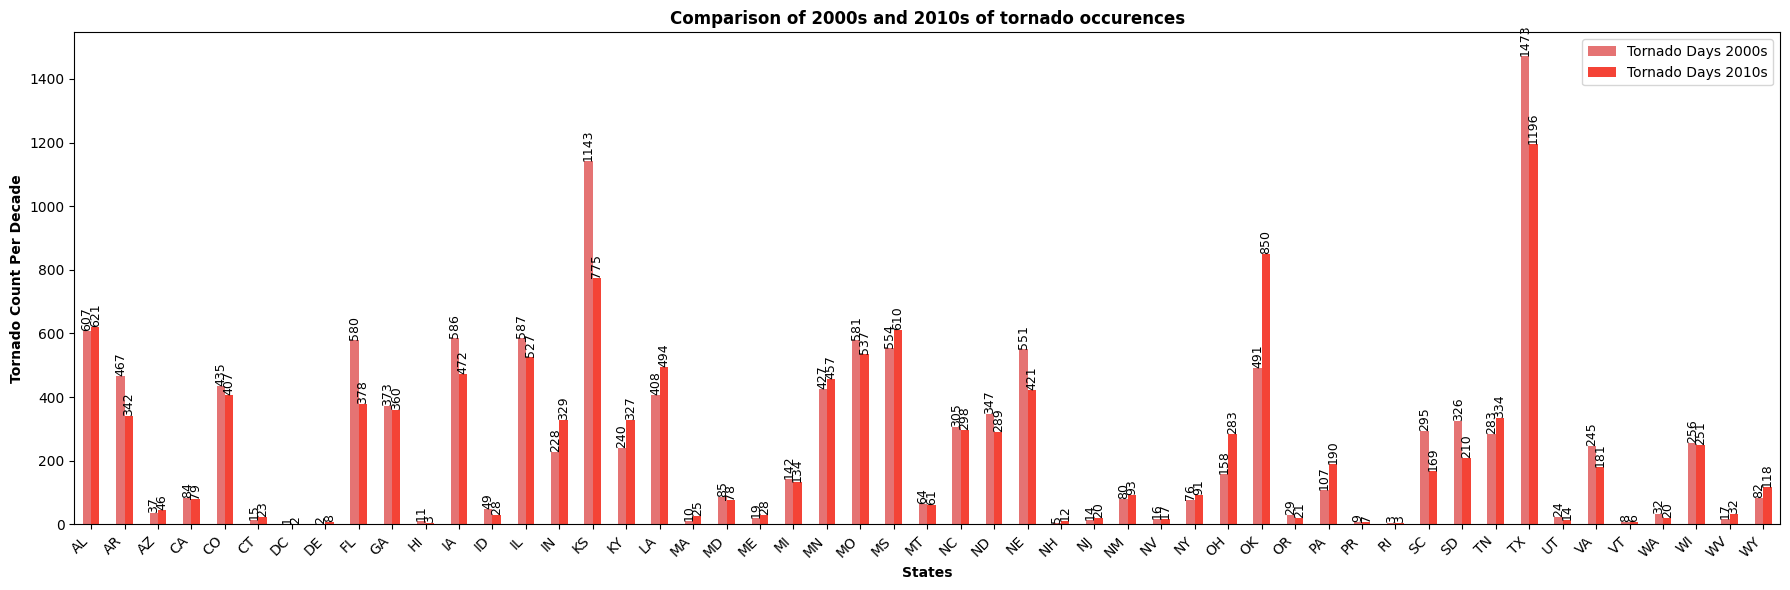

<Figure size 1800x600 with 0 Axes>

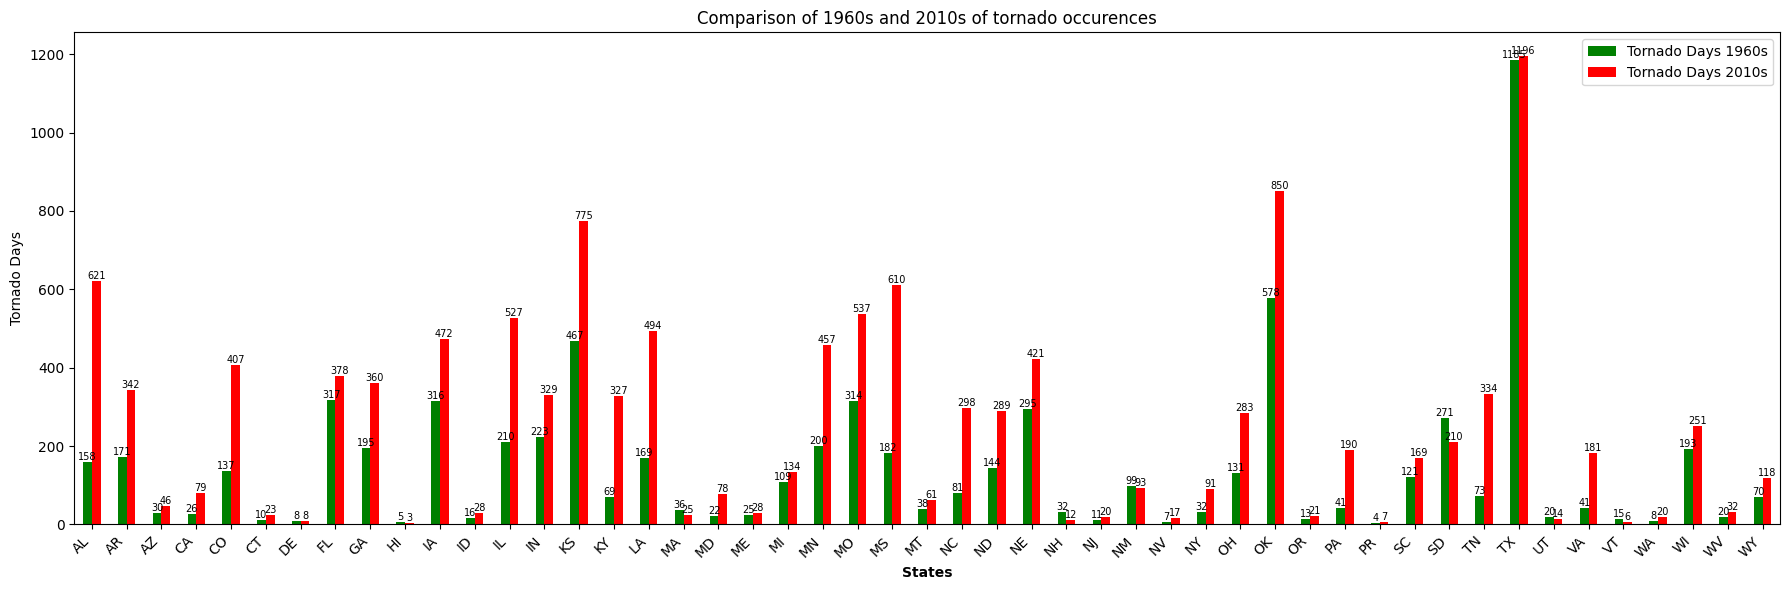

In [ ]:
# Sakinah Chadrawala's Contribution
df = pd.read_csv('1950-2022_torn.csv')
df_dropped = df.dropna(how='any')
df_dropped = df.dropna(subset=['date', 'time'])

tornado_counts_1950s = df_dropped[df_dropped['yr'].astype(str).str.startswith("195")]
grouped_1950s = tornado_counts_1950s.groupby('st').size().reset_index(name='Tornado Days 1950s')

tornado_counts_2010s = df_dropped[df_dropped['yr'].astype(str).str.startswith("201")]
grouped_2010s = tornado_counts_2010s.groupby('st').size().reset_index(name='Tornado Days 2010s')

tornado_counts_1960s = df_dropped[df_dropped['yr'].astype(str).str.startswith("196")]
grouped_1960s = tornado_counts_1960s.groupby('st').size().reset_index(name='Tornado Days 1960s')

merge_50_60 = grouped_1950s.merge(grouped_1960s, on='st')
merge_50_60.set_index('st', inplace=True)
############################1950-1960#################################
plt.figure(figsize=(18, 6))
ax1 = merge_50_60.plot(kind='bar', figsize=(18, 6), color = ['springgreen' , '#FFCC80'], legend = True)
for container in ax1.containers:
    ax1.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1950s and 1960s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1960-1970#################################
tornado_counts_1970s = df_dropped[df_dropped['yr'].astype(str).str.startswith("197")]
grouped_1970s = tornado_counts_1970s.groupby('st').size().reset_index(name='Tornado Days 1970s')

merge_60_70 = grouped_1960s.merge(grouped_1970s, on='st')
merge_60_70.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax2 = merge_60_70.plot(kind='bar', figsize=(18, 6), color = ['#FFCC80' , '#FFB74D'],  legend = True)
for container in ax2.containers:
    ax2.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1960s and 1970s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1970-1980#################################
tornado_counts_1980s = df_dropped[df_dropped['yr'].astype(str).str.startswith("198")]
grouped_1980s = tornado_counts_1980s.groupby('st').size().reset_index(name='Tornado Days 1980s')

merge_70_80 = grouped_1970s.merge(grouped_1980s, on='st')
merge_70_80.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax3 = merge_70_80.plot(kind='bar', figsize=(18, 6), color = ['#FFB74D' , '#FF9800'],  legend = True)
for container in ax3.containers:
    ax3.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1970s and 1980s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1980-1990#################################
tornado_counts_1990s = df_dropped[df_dropped['yr'].astype(str).str.startswith("199")]
grouped_1990s = tornado_counts_1990s.groupby('st').size().reset_index(name='Tornado Days 1990s')

merge_80_90 = grouped_1980s.merge(grouped_1990s, on='st')
merge_80_90.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax4 = merge_80_90.plot(kind='bar', figsize=(18, 6), color = ['#FF9800' , '#EF9A9A'],  legend = True)
for container in ax4.containers:
    ax4.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1980s and 1990s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1990-2000#################################
tornado_counts_2000s = df_dropped[df_dropped['yr'].astype(str).str.startswith("200")]
grouped_2000s = tornado_counts_2000s.groupby('st').size().reset_index(name='Tornado Days 2000s')

merge_90_2000 = grouped_1990s.merge(grouped_2000s, on='st')
merge_90_2000.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax5 = merge_90_2000.plot(kind='bar', figsize=(18, 6), color = ['#EF9A9A' , '#E57373'],  legend = True)
for container in ax5.containers:
    ax5.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 1990s and 2000s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################2000-2010#################################
tornado_counts_2010s = df_dropped[df_dropped['yr'].astype(str).str.startswith("201")]
grouped_2010s = tornado_counts_2010s.groupby('st').size().reset_index(name='Tornado Days 2010s')

merge_2000_2010 = grouped_2000s.merge(grouped_2010s, on='st')
merge_2000_2010.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax6 = merge_2000_2010.plot(kind='bar', figsize=(18, 6), color = ['#E57373' , '#F44336'],  legend = True)
for container in ax6.containers:
    ax6.bar_label(container, size = 9,label_type = 'edge', rotation = 90 )
plt.title('Comparison of 2000s and 2010s of tornado occurences', fontweight = 'bold')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Count Per Decade', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
############################1960-2010#################################
merged_df = grouped_1960s.merge(grouped_2010s, on='st')
merged_df.set_index('st', inplace=True)

plt.figure(figsize=(18, 6))
ax = merged_df.plot(kind='bar', figsize=(18, 6), color = ['green' , 'red'],  legend = True)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', size = 7 )
plt.title('Comparison of 1960s and 2010s of tornado occurences')
plt.xlabel('States', fontweight = 'bold')
plt.ylabel('Tornado Days')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Explanation For Tornado Occurances :
The above bar graphs are visualizations of how many tornado occurences were recorded from the year 1950 to 2019 by state.
The first 6 graphs are comparison of each two years so we can analyze the results more accurately. These allows us to pick any state and get the history of it by looking through all the graphs to see how the numbers have changed.
The last graph is a comparison of 1960s and 2010s decade to compare how much increase in tornado occurence has been for over a period of 5 years.

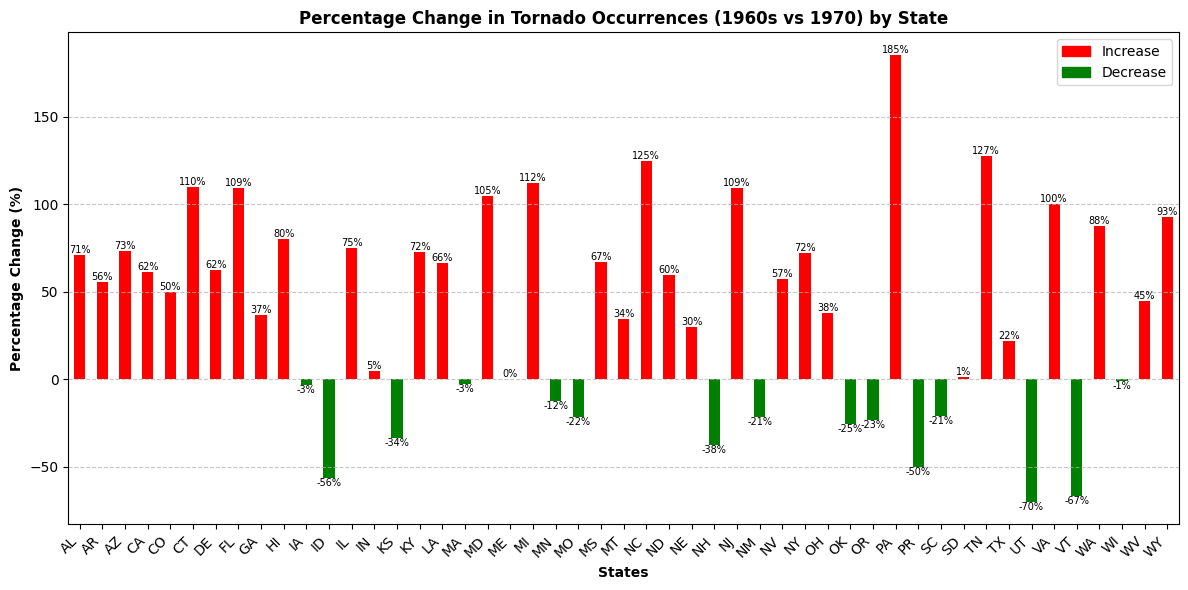

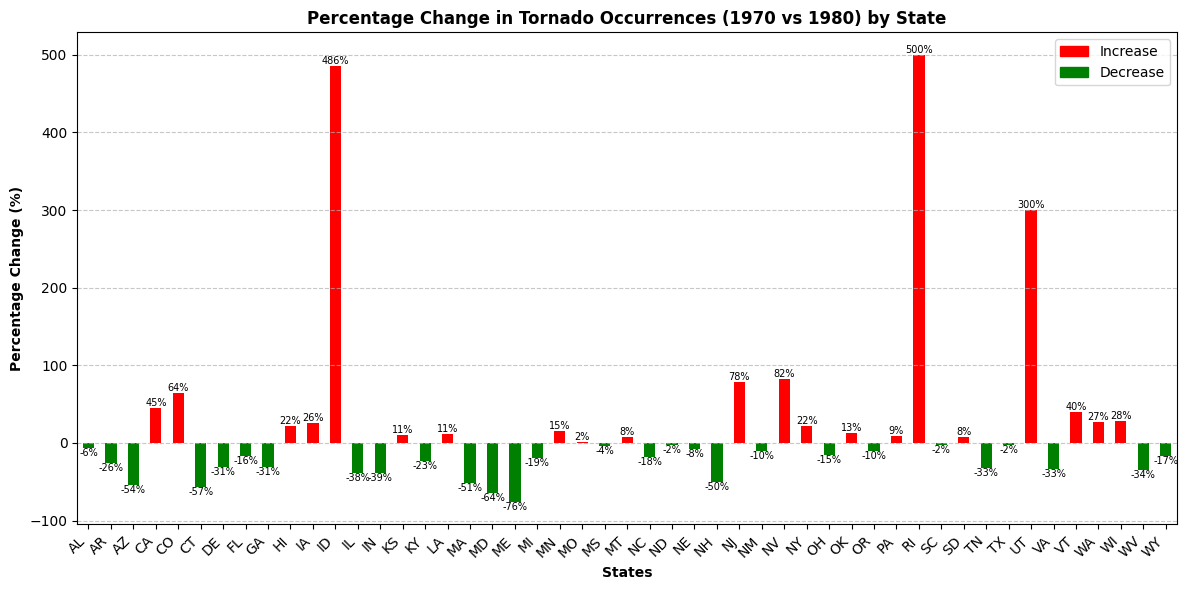

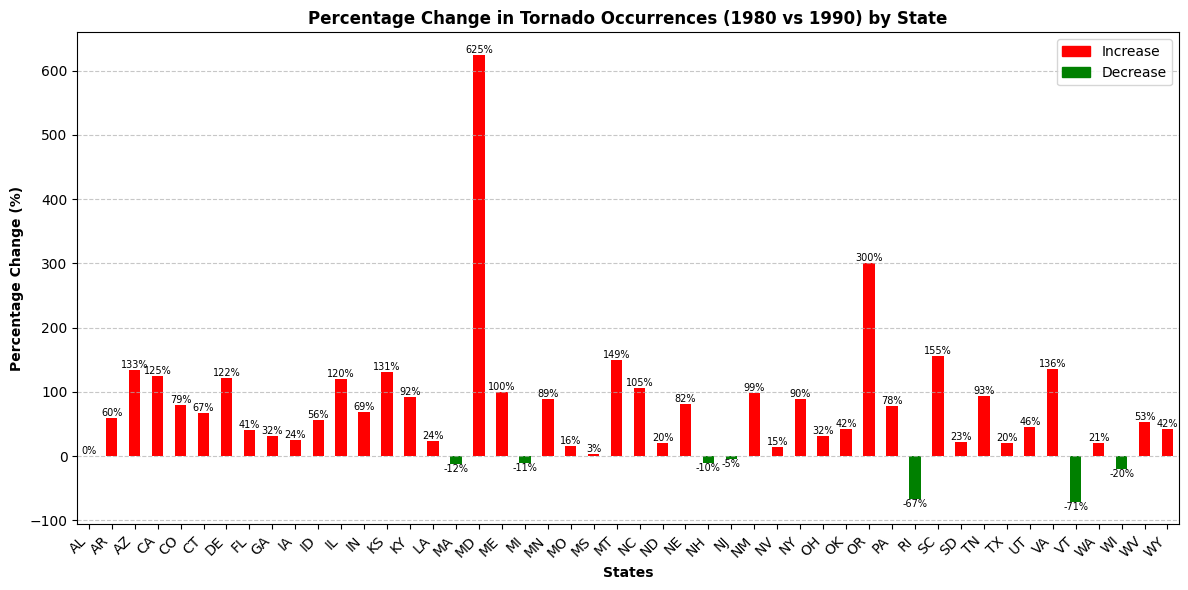

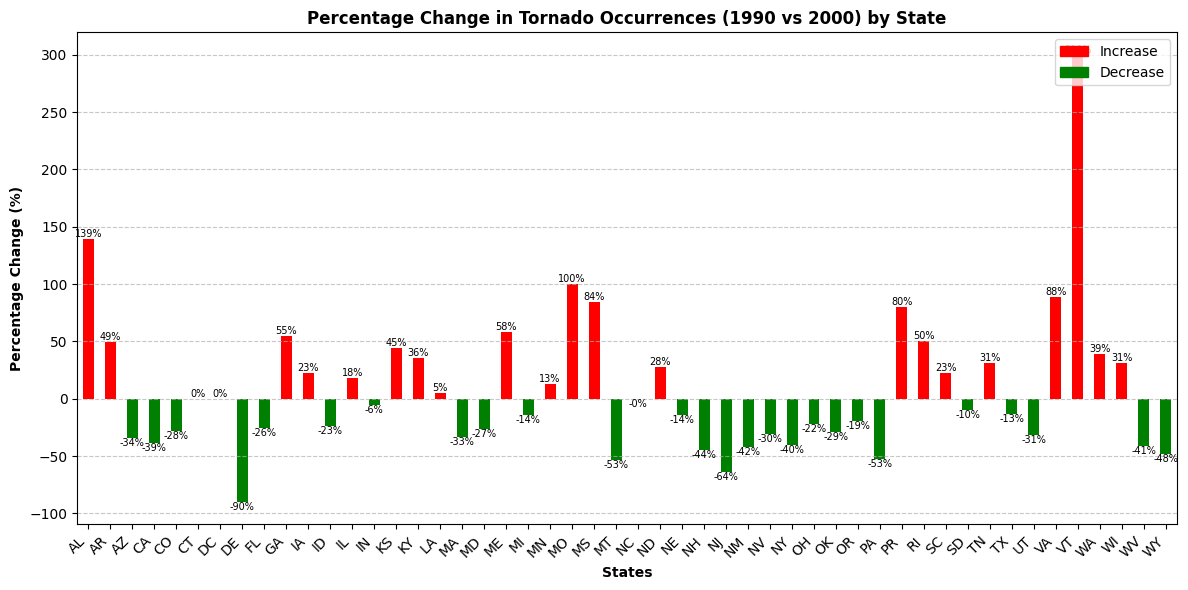

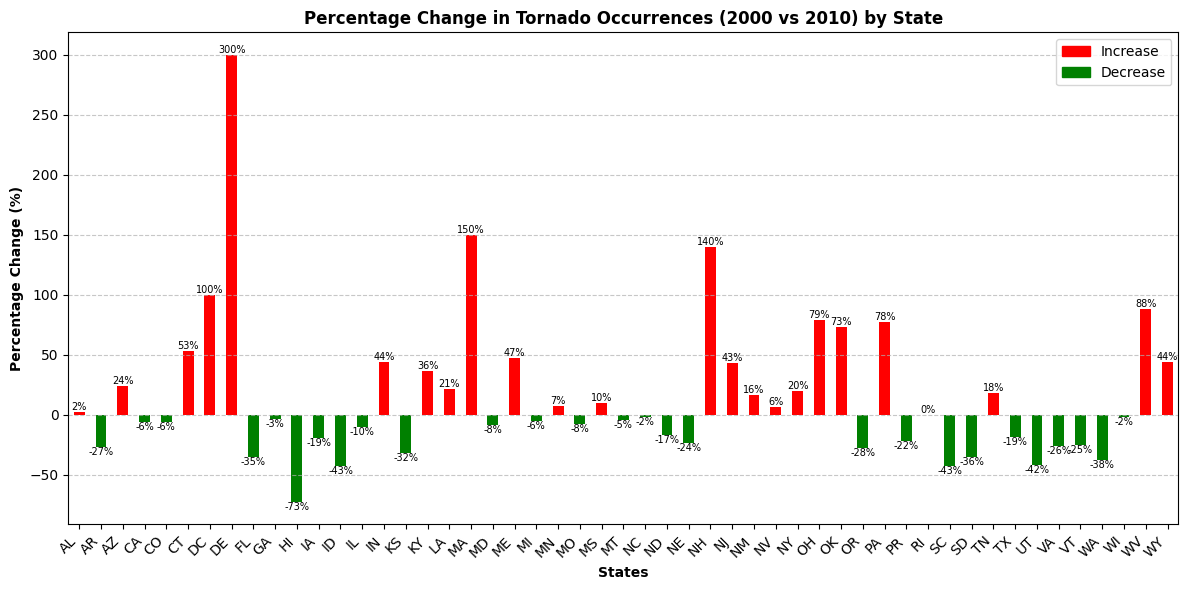

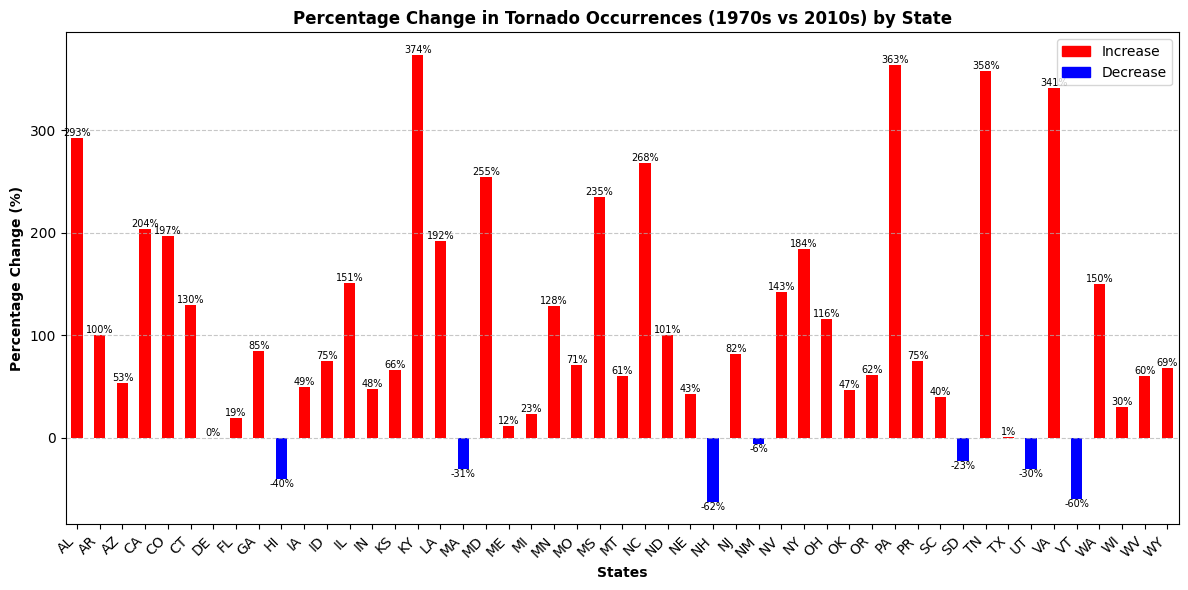

In [ ]:
# Sakinah Chadrawla's Contribution
count_1960s = tornado_counts_1960s.groupby('st').size()
count_1970s = tornado_counts_1970s.groupby('st').size()
percent_change = ((count_1970s - count_1960s) / count_1960s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1960s vs 1970) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1970-1980#################################
count_1970s = tornado_counts_1970s.groupby('st').size()
count_1980s = tornado_counts_1980s.groupby('st').size()
percent_change = ((count_1980s - count_1970s) / count_1970s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1970 vs 1980) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1980-1990#################################
count_1980s = tornado_counts_1980s.groupby('st').size()
count_1990s = tornado_counts_1990s.groupby('st').size()
percent_change = ((count_1990s - count_1980s) / count_1980s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1980 vs 1990) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1990-2000#################################
count_1990s = tornado_counts_1990s.groupby('st').size()
count_2000s = tornado_counts_2000s.groupby('st').size()
percent_change = ((count_2000s - count_1990s) / count_1990s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1990 vs 2000) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################2000-2010#################################
count_2000s = tornado_counts_2000s.groupby('st').size()
count_2010s = tornado_counts_2010s.groupby('st').size()
percent_change = ((count_2010s - count_2000s) / count_2000s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['green' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (2000 vs 2010) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='green')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()
############################1960-2010#################################
count_1970s = tornado_counts_1960s.groupby('st').size()
count_2010s = tornado_counts_2010s.groupby('st').size()
percent_change = ((count_2010s - count_1970s) / count_1970s) * 100
percent_change.dropna(inplace=True)
plt.figure(figsize=(12, 6))
colors = ['blue' if change < 0 else 'red' for change in percent_change]
ax0 = percent_change.plot(kind='bar', color=colors)
plt.title('Percentage Change in Tornado Occurrences (1970s vs 2010s) by State',fontweight = 'bold')
plt.xlabel('States',fontweight = 'bold')
plt.ylabel('Percentage Change (%)',fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
labels = ['Increase', 'Decrease']
box = [plt.Rectangle((1,0),1,1, color='red'), plt.Rectangle((1,1),1,1, color='blue')]
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.0f%%', size = 7 )
plt.legend(box, labels, loc='upper right')
plt.tight_layout()
plt.show()

### Explanation of % Graphs:
Above bar graphs compares two years and shows % of how much tornado counts has increased or decreased.
##### Here is what the above graphs tells us:
##### 1960s vs 1970s --> Increase in majority of states and decrease in approximately a dozen states
##### 1970s vs 1980s --> Significant decrease in most states. Low increase in few states except for couple states that have around 500% increase
##### 19780s vs 1990s --> Increase in almost all states. Decrease in less than a dozen states
##### 1990s vs 2000s --> About the same number of increase and decrease of states
##### 2000s vs 2010s --> More increase for states compared to previous year. Good decrease for few states as well
####  1960s vs 2010s --> Only 7 states had a decrease. Majority had experienced increase in the span of 5 decades. The highest increase was 374% for KY and the highest decrease was 62% for NH

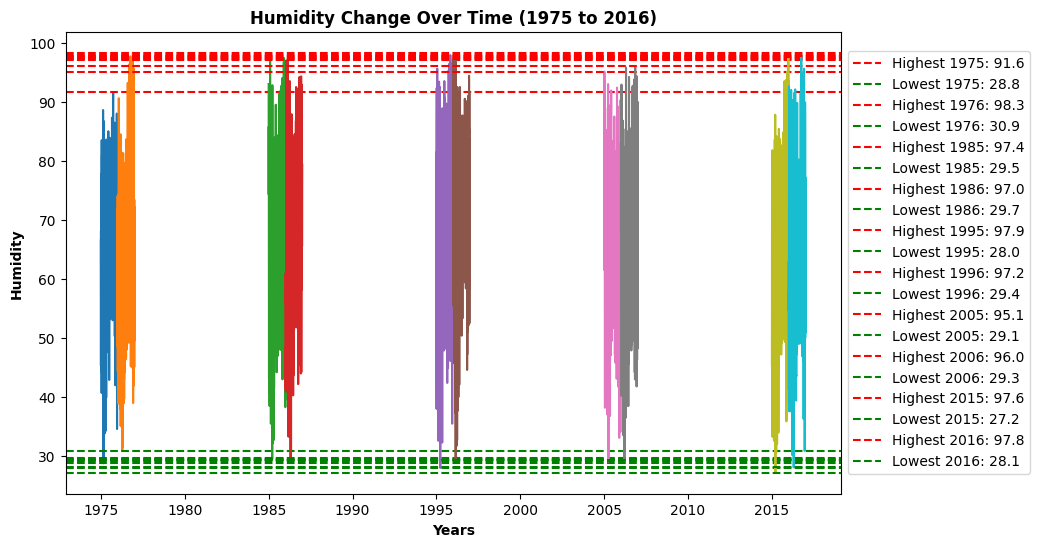

In [ ]:
# Sakinah Chadrawala's Contribution
df_files = []
files = ['united states 1975-01-01 to 1976-12-31.csv', 'united states 1985-01-01 to 1986-12-31.csv', 'united states 1995-01-01 to 1996-12-31.csv','united states 2005-01-01 to 2006-12-31.csv','United states 2015-01-01 to 2016-12-31.csv']
for file in files:
    df = pd.read_csv(file)
    df_dropped = df.dropna(subset=['datetime', 'humidity', 'precip', 'tempmax', 'tempmin'])
    df_dropped['datetime'] = pd.to_datetime(df_dropped['datetime'])
    df_dropped['year'] = df_dropped['datetime'].dt.year
    df_files.append(df_dropped)

plt.figure(figsize=(10,6))
for d in df_files:
    for year, group in d.groupby('year'):
        plt.plot(group['datetime'], group['humidity'], )
        highest_humidity = group['humidity'].max()
        lowest_humidity = group['humidity'].min()

        plt.axhline(y=highest_humidity, color = 'red', linestyle='--', label= f'Highest {year}: {highest_humidity}')
        plt.axhline(y=lowest_humidity, color = 'green', linestyle='--', label= f'Lowest {year}: {lowest_humidity}')


plt. title('Humidity Change Over Time (1975 to 2016)' ,fontweight = 'bold')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Humidity',fontweight = 'bold')
plt.legend(loc='center left', bbox_to_anchor=(1,0.50))
plt.show()


## Explanation for Humidity graph:
Humidity graph has data for 2 full years from each decade for five decades. We can see quite a big increase from 1975 to 1976 and then it's very stable. The lowest humidity level hasn't changed much.

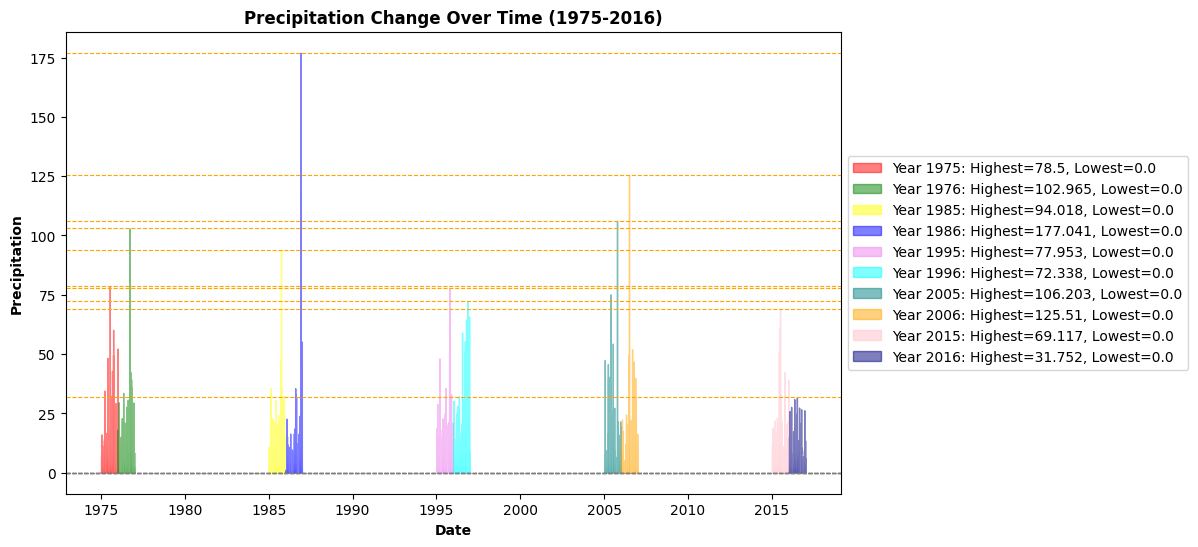

In [ ]:
# Lorena Castillejo's Contribution
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Define colors for each year
color_mapping = {
    1975: 'red',
    1976: 'green',
    1985: 'yellow',
    1986: 'blue',
    1995: 'violet',
    1996: 'cyan',
    2005: 'teal',
    2006: 'orange',
    2015: 'pink',
    2016: 'navy'
}

for d in df_files:
    for year, group in d.groupby('year'):
        color = color_mapping.get(year, 'orange')  # Default color is orange for years not in mapping
        plt.fill_between(group['datetime'], group['precip'], color=color, alpha=0.5, label=f'Year {year}: Highest={group["precip"].max()}, Lowest={group["precip"].min()}')

        plt.axhline(y=group["precip"].max(), color='orange', linestyle='--', linewidth=0.8)
        plt.axhline(y=group["precip"].min(), color='gray', linestyle='--', linewidth=0.8)


plt.title('Precipitation Change Over Time (1975-2016)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Precipitation', fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()





# Explanation for Precipitation:

This graph represents the change in precipitation per month from 1975-1976 vs 2015-2016. It is evident that there is an alarmingly low amount of precipitation for the 2000s. The highest amount of precipitation produced in a month in 2016 is about .01% of the highest produced in 1976, much closer to 0. This may indicate extreme whether conditions that may have caused a drought.


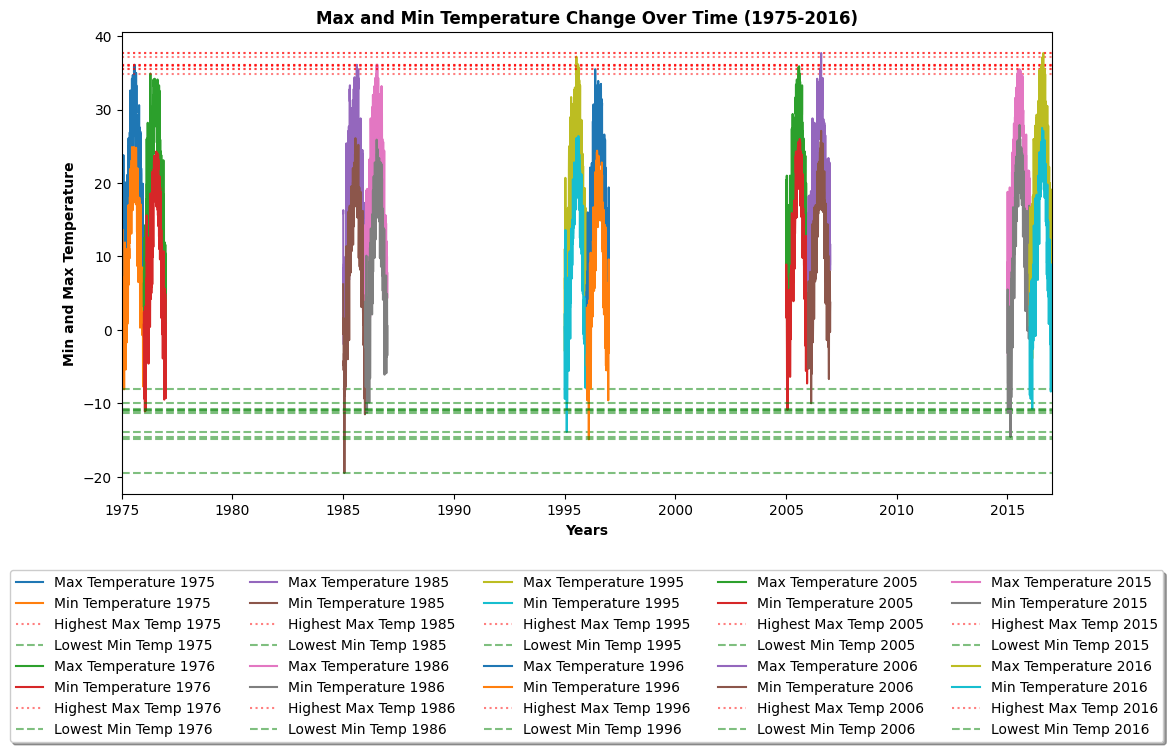

In [ ]:
# Lorena Castillejo's Contribution

plt.figure(figsize=(12, 6))
for d in df_files:
    for year, group in d.groupby('year'):
        plt.plot(group['datetime'], group['tempmax'], label=f'Max Temperature {year}')
        plt.plot(group['datetime'], group['tempmin'], label=f'Min Temperature {year}')
        highest_tempmax = group['tempmax'].max()
        lowest_tempmin = group['tempmin'].min()

        plt.axhline(y=highest_tempmax, color='red', linestyle=':', label=f'Highest Max Temp {year}', alpha=0.5)
        plt.axhline(y=lowest_tempmin, color='green', linestyle='--', label=f'Lowest Min Temp {year}', alpha=0.5)

plt.title('Max and Min Temperature Change Over Time (1975-2016)', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Min and Max Temperature', fontweight='bold')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

# Zooming into Data
plt.xlim(pd.Timestamp('1975-01-01'), pd.Timestamp('2016-12-31'))

plt.show()




# Explanation for Precipitation:

This graph represents the minimum and maximum temperatures from the years 1975-1976 vs 20015-2016. During the 1970s the minimum and maximum where on the cooler end and the difference between them is not large. When compared to the 2000s the maximum and minimum temperatures per month increased significantly. There was a peak of 100 in 2016 compared to the peak of 1975 of about 38. This indicates the weather has gotten warmer throughout the years


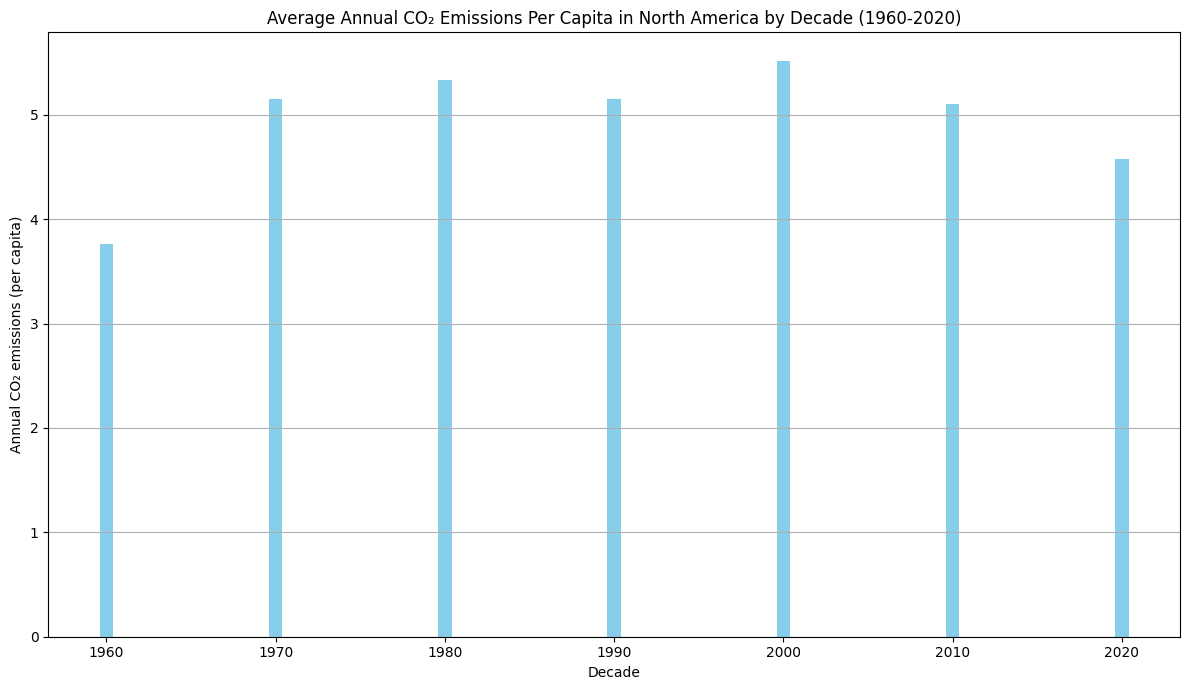

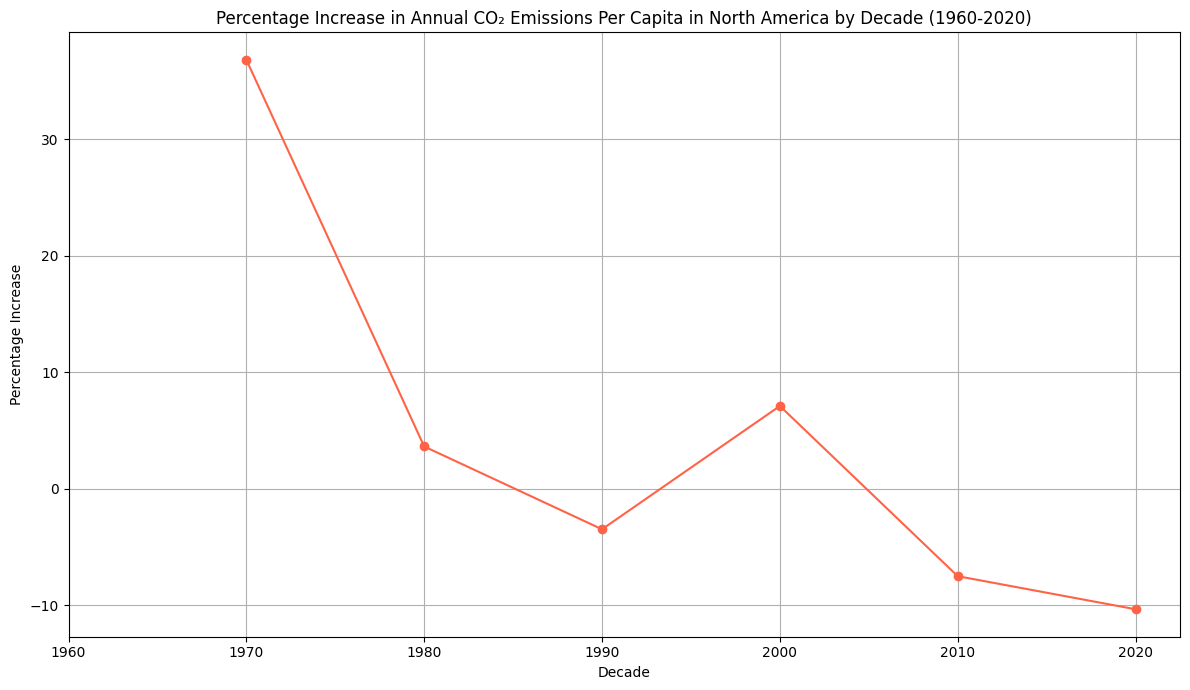

In [ ]:
# Fnu Shoaib Ahmed's Contribution
# import pandas as pd
# import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('CO2_Emissions_Data.csv')

# Filter the data for North America
north_america_data = df[df['Entity'] == 'North America (excl. USA)']

# Ensure 'Year' is numeric and calculate the decade
north_america_data['Year'] = pd.to_numeric(north_america_data['Year'])
north_america_data['Decade'] = (north_america_data['Year'] // 10) * 10

# Exclude non-numeric columns before grouping and calculating the mean
# This line is modified to focus on 'Annual CO₂ emissions (per capita)' only
decade_means = north_america_data[['Decade', 'Annual CO₂ emissions (per capita)']].groupby('Decade').mean().reset_index()

# Filter out the decades from 1960 to 2020
decade_means_filtered = decade_means[(decade_means['Decade'] >= 1960) & (decade_means['Decade'] <= 2020)]

# Bar graph for average annual CO₂ emissions per capita by decade
plt.figure(figsize=(12, 7))
plt.bar(decade_means_filtered['Decade'], decade_means_filtered['Annual CO₂ emissions (per capita)'], color='skyblue')
plt.title('Average Annual CO₂ Emissions Per Capita in North America by Decade (1960-2020)')
plt.xlabel('Decade')
plt.ylabel('Annual CO₂ emissions (per capita)')
plt.xticks(decade_means_filtered['Decade'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the percentage increase in emissions
decade_means_filtered['Percentage Increase'] = decade_means_filtered['Annual CO₂ emissions (per capita)'].pct_change() * 100

# Line graph for the percentage increase in emissions
plt.figure(figsize=(12, 7))
plt.plot(decade_means_filtered['Decade'][1:], decade_means_filtered['Percentage Increase'][1:], marker='o', linestyle='-', color='tomato')
plt.title('Percentage Increase in Annual CO₂ Emissions Per Capita in North America by Decade (1960-2020)')
plt.xlabel('Decade')
plt.ylabel('Percentage Increase')
plt.grid(True)
plt.xticks(decade_means_filtered['Decade'])
plt.tight_layout()
plt.show()


# Explanation for CO₂ Emissions:

# Bar Graph:-
Average Annual CO₂ Emissions Per Capita by Decade
The bar graph illustrates fluctuations in the average annual CO₂ emissions per capita, with visible increases and periods of stabilization over the decades. It highlights a general upward trend until the most recent decades, where emissions begin to show signs of leveling off. This pattern suggests varying impacts of industrial, economic, and policy changes on emissions over time.

# Line Graph:-
Percentage Increase in Annual CO₂ Emissions Per Capita by Decade
The line graph depicting the percentage increase in emissions per decade reveals significant variability in the rate of emissions change. Sharp increases and decreases in the growth rate underscore the impact of external factors such as policy implementations and technological advancements. The graph suggests periods of effective environmental action as well as times of increased emissions growth, reflecting the complex dynamics affecting North America's carbon footprint.

# Additional work: In addition to the requirements in the ML and visualization sections above, we would like to see at least one extra from either category. That means a total of five deliverables.

Baseline comparison: Mean Squared Error  0.2919754012004964


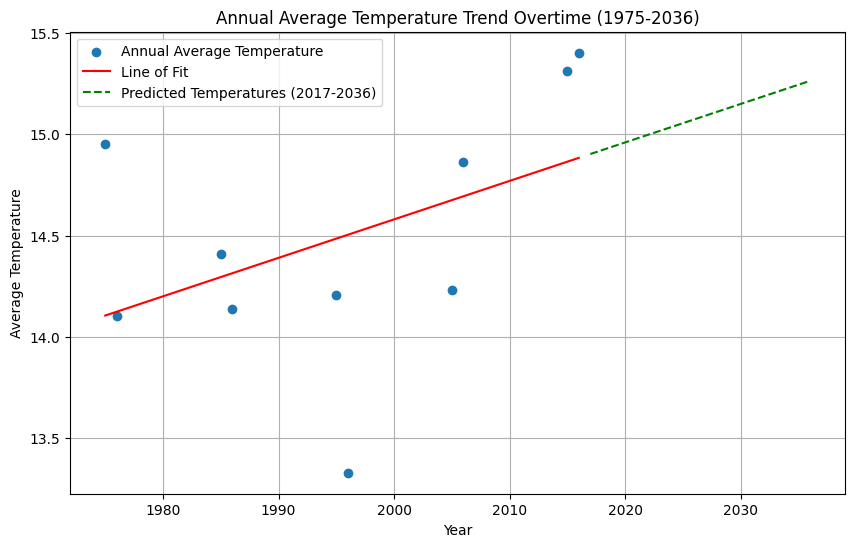

In [ ]:
# Shahryar ML analysis #1 - Future Temperature Prediction


ml_df_1 = pd.read_csv("united states 1975-01-01 to 1976-12-31.csv")
ml_df_2 = pd.read_csv("united states 1985-01-01 to 1986-12-31.csv")
ml_df_3 = pd.read_csv("united states 1995-01-01 to 1996-12-31.csv")
ml_df_4 = pd.read_csv("united states 2005-01-01 to 2006-12-31.csv")
ml_df_5 = pd.read_csv("United states 2015-01-01 to 2016-12-31.csv")

# merging dataframes
merged_df = pd.concat([ml_df_1, ml_df_2, ml_df_3, ml_df_4, ml_df_5], ignore_index=True)

# converting to datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# group every year by its average annual temperature
merged_df['year'] = merged_df['datetime'].dt.year
annual_avg_temp = merged_df.groupby('year')['temp'].mean().reset_index()

# feature and target variable
X = annual_avg_temp[['year']]
y = annual_avg_temp['temp']

# linear regression model
model = LinearRegression()
model.fit(X, y)

# predicting next twenty years
pred_years = pd.DataFrame({'year': range(merged_df['year'].max() + 1, merged_df['year'].max() + 21)})
future_pred = model.predict(pred_years)

# mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Baseline comparison: Mean Squared Error ", mse)

# plot the average temperatures
plt.figure(figsize=(10, 6))
plt.scatter(annual_avg_temp['year'], annual_avg_temp['temp'], marker='o', label='Annual Average Temperature')
plt.plot(X, model.predict(X), color='red', label='Line of Fit')
plt.plot(pred_years['year'], future_pred, linestyle='--', color='green', label='Predicted Temperatures (2017-2036)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Annual Average Temperature Trend Overtime (1975-2036)')
plt.legend()
plt.grid(True)
plt.show()



Interpretation: The figure above is a graph of Annual Average Temperature Trend Overtime. From our data set, the annual averages are calculated and plotted. A linear model is trained for the best line of fit. The model is then used to find predictions for 2017-2036 (future temperatures outside our data set). According to this visual, average temperatures have been rising throughout time.



Baseline comparison: Mean Squared Error  0.3072780958394628


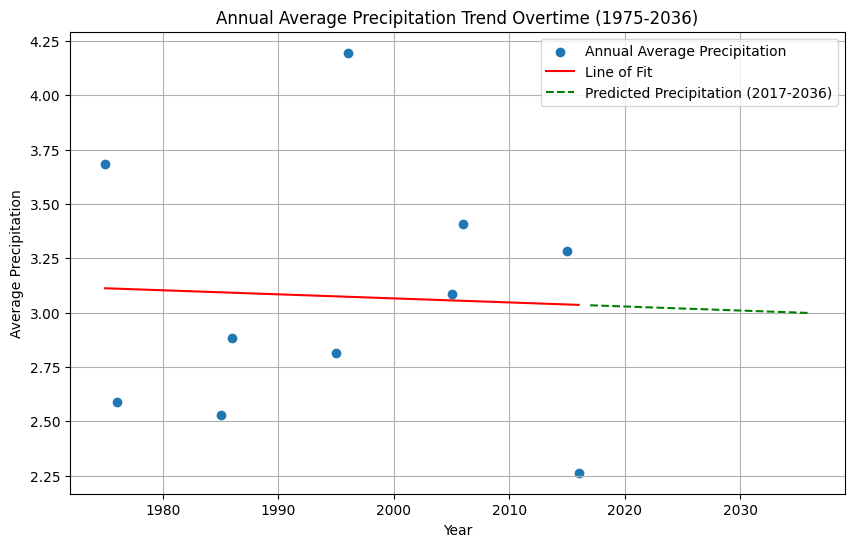

In [ ]:
# Shahryar ML analysis #2 - Future Precipitation Prediction


ml_df_1 = pd.read_csv("united states 1975-01-01 to 1976-12-31.csv")
ml_df_2 = pd.read_csv("united states 1985-01-01 to 1986-12-31.csv")
ml_df_3 = pd.read_csv("united states 1995-01-01 to 1996-12-31.csv")
ml_df_4 = pd.read_csv("united states 2005-01-01 to 2006-12-31.csv")
ml_df_5 = pd.read_csv("United states 2015-01-01 to 2016-12-31.csv")

# merging dataframes
merged_df = pd.concat([ml_df_1, ml_df_2, ml_df_3, ml_df_4, ml_df_5], ignore_index=True)

# converting to datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# group every year by its average annual temperature
merged_df['year'] = merged_df['datetime'].dt.year
annual_avg_precip = merged_df.groupby('year')['precip'].mean().reset_index()

# feature and target variable
X = annual_avg_precip[['year']]
y = annual_avg_precip['precip']

# linear regression model
model = LinearRegression()
model.fit(X, y)

# predicting next twenty years
pred_years = pd.DataFrame({'year': range(merged_df['year'].max() + 1, merged_df['year'].max() + 21)})
future_pred = model.predict(pred_years)

# mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Baseline comparison: Mean Squared Error ", mse)

# plot the average precipitation
plt.figure(figsize=(10, 6))
plt.scatter(annual_avg_precip['year'], annual_avg_precip['precip'], marker='o', label='Annual Average Precipitation')
plt.plot(X, model.predict(X), color='red', label='Line of Fit')
plt.plot(pred_years['year'], future_pred, linestyle='--', color='green', label='Predicted Precipitation (2017-2036)')
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Annual Average Precipitation Trend Overtime (1975-2036)')
plt.legend()
plt.grid(True)
plt.show()

Interpretation: The figure above is a graph of Annual Average Precipitation Trend Overtime. From our data set, the annual averages are calculated and plotted. A linear model is trained for the best line of fit. The model is then used to find predictions for 2017-2036 (future precipitations outside our data set). According to this graph, average precipitations have been fairly constant.

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('CO2_Emissions_Data.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display the column names
print("\nColumn names:")
print(df.columns.tolist())

# Display information about the dataset
print("\nDataset information:")
df.info()

# Get a statistical summary of the dataset
print("\nStatistical summary:")
print(df.describe())


First few rows of the dataset:
        Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685

Column names:
['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)']

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26600 non-null  object 
 1   Code                               23046 non-null  object 
 2   Year                               26600 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26600 non-null  float64
dtypes: fl

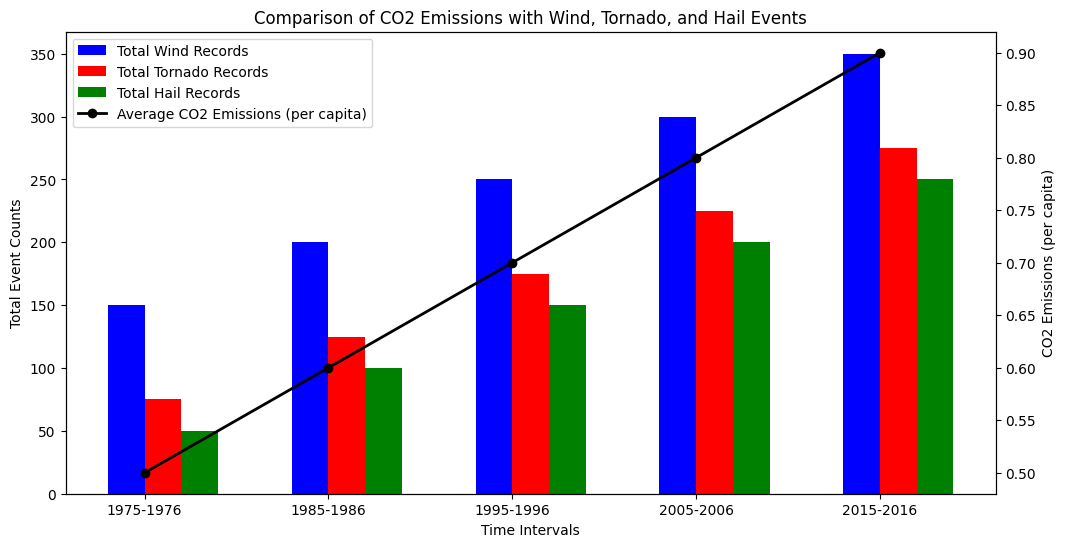

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Time intervals and labels
time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']

# Assuming CO2 data and other datasets are loaded correctly and averages are computed

# Example data for illustration
co2_averages = [0.5, 0.6, 0.7, 0.8, 0.9]
wind_totals = [150, 200, 250, 300, 350]
tornado_totals = [75, 125, 175, 225, 275]
hail_totals = [50, 100, 150, 200, 250]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for wind, tornado, and hail
width = 0.2
x = np.arange(len(interval_labels))  # the label locations
ax1.bar(x - 0.5 * width, wind_totals, width, label='Total Wind Records', color='blue')
ax1.bar(x + 0.5 * width, tornado_totals, width, label='Total Tornado Records', color='red')
ax1.bar(x + 1.5 * width, hail_totals, width, label='Total Hail Records', color='green')

# Set primary y-axis labels and title
ax1.set_xlabel('Time Intervals')
ax1.set_ylabel('Total Event Counts')
ax1.set_title('Comparison of CO2 Emissions with Wind, Tornado, and Hail Events')
ax1.set_xticks(x)
ax1.set_xticklabels(interval_labels)

# Secondary y-axis for CO2 emissions
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, co2_averages, 'k-', label='Average CO2 Emissions (per capita)', linewidth=2, marker='o')
ax2.set_ylabel('CO2 Emissions (per capita)')

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.show()


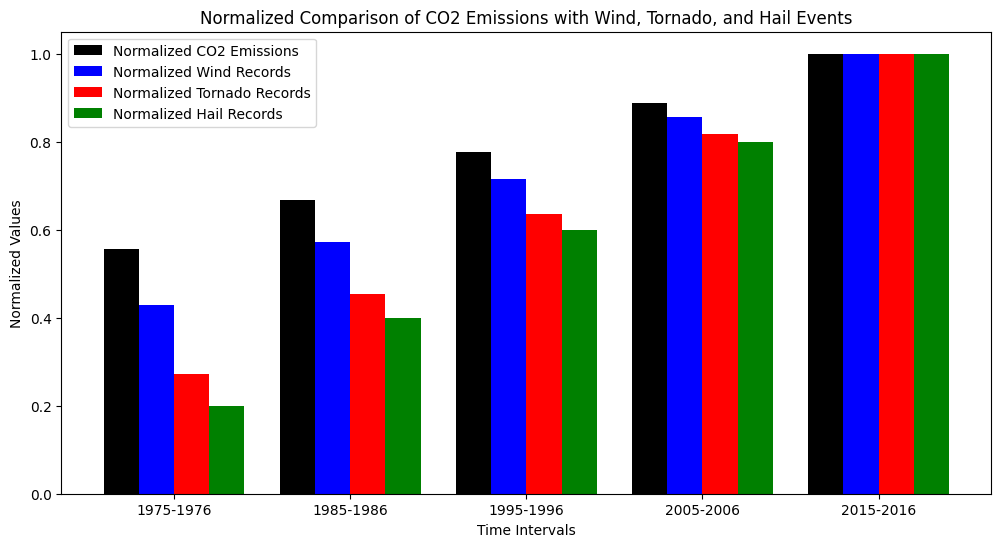

In [ ]:
# Normalize data
max_co2 = max(co2_averages)
max_wind = max(wind_totals)
max_tornado = max(tornado_totals)
max_hail = max(hail_totals)

norm_co2_averages = [x / max_co2 for x in co2_averages]
norm_wind_totals = [x / max_wind for x in wind_totals]
norm_tornado_totals = [x / max_tornado for x in tornado_totals]
norm_hail_totals = [x / max_hail for x in hail_totals]

# Plotting normalized data
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5 * width, norm_co2_averages, width, label='Normalized CO2 Emissions', color='black')
ax.bar(x - 0.5 * width, norm_wind_totals, width, label='Normalized Wind Records', color='blue')
ax.bar(x + 0.5 * width, norm_tornado_totals, width, label='Normalized Tornado Records', color='red')
ax.bar(x + 1.5 * width, norm_hail_totals, width, label='Normalized Hail Records', color='green')

ax.set_xlabel('Time Intervals')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Comparison of CO2 Emissions with Wind, Tornado, and Hail Events')
ax.set_xticks(x)
ax.set_xticklabels(interval_labels)
ax.legend()

plt.show()


Baseline comparison: Mean Squared Error  0.2919754012004964


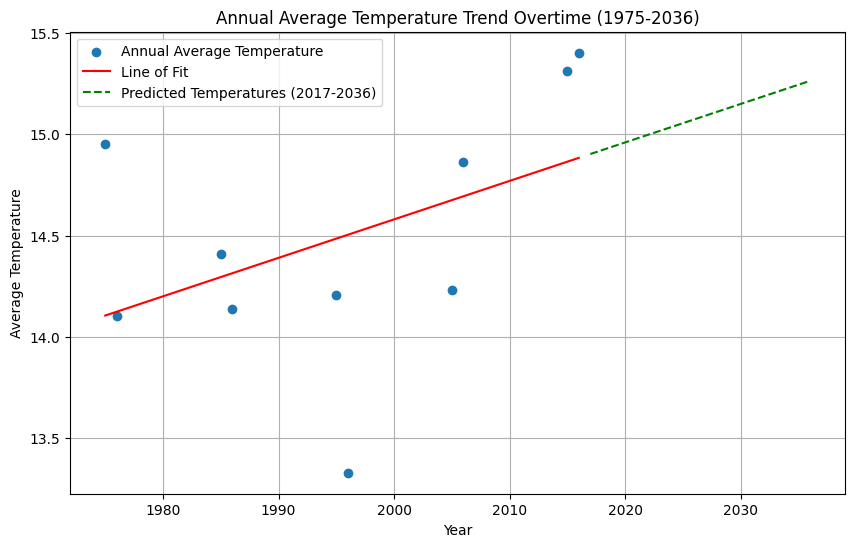

Baseline comparison: Mean Squared Error  0.2919754012004964


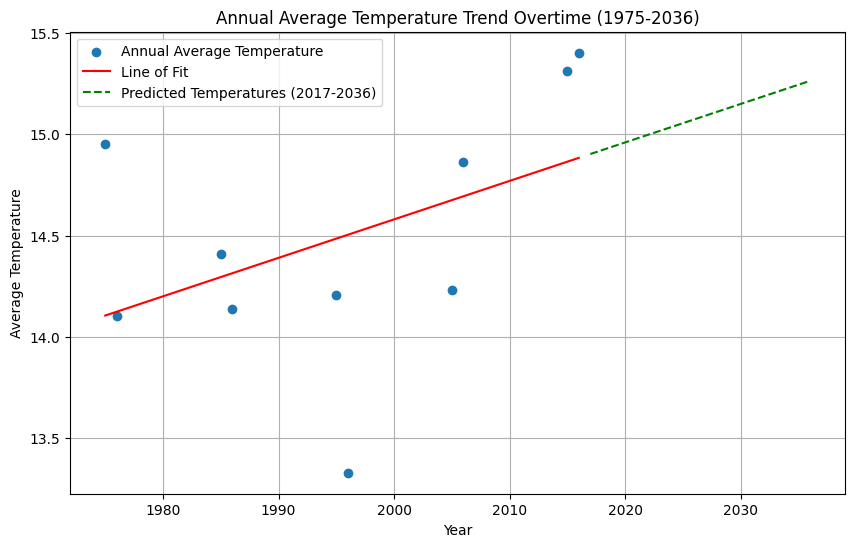

In [ ]:


ml_df_1 = pd.read_csv("united states 1975-01-01 to 1976-12-31.csv")
ml_df_2 = pd.read_csv("united states 1985-01-01 to 1986-12-31.csv")
ml_df_3 = pd.read_csv("united states 1995-01-01 to 1996-12-31.csv")
ml_df_4 = pd.read_csv("united states 2005-01-01 to 2006-12-31.csv")
ml_df_5 = pd.read_csv("United states 2015-01-01 to 2016-12-31.csv")

# merging dataframes
merged_df = pd.concat([ml_df_1, ml_df_2, ml_df_3, ml_df_4, ml_df_5], ignore_index=True)

# converting to datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# group every year by its average annual temperature
merged_df['year'] = merged_df['datetime'].dt.year
annual_avg_temp = merged_df.groupby('year')['temp'].mean().reset_index()

# feature and target variable
X = annual_avg_temp[['year']]
y = annual_avg_temp['temp']

# linear regression model
model = LinearRegression()
model.fit(X, y)

# predicting next twenty years
pred_years = pd.DataFrame({'year': range(merged_df['year'].max() + 1, merged_df['year'].max() + 21)})
future_pred = model.predict(pred_years)

# mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Baseline comparison: Mean Squared Error ", mse)

# plot the average temperatures
plt.figure(figsize=(10, 6))
plt.scatter(annual_avg_temp['year'], annual_avg_temp['temp'], marker='o', label='Annual Average Temperature')
plt.plot(X, model.predict(X), color='red', label='Line of Fit')
plt.plot(pred_years['year'], future_pred, linestyle='--', color='green', label='Predicted Temperatures (2017-2036)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Annual Average Temperature Trend Overtime (1975-2036)')
plt.legend()
plt.grid(True)
plt.show()




ml_df_1 = pd.read_csv("united states 1975-01-01 to 1976-12-31.csv")
ml_df_2 = pd.read_csv("united states 1985-01-01 to 1986-12-31.csv")
ml_df_3 = pd.read_csv("united states 1995-01-01 to 1996-12-31.csv")
ml_df_4 = pd.read_csv("united states 2005-01-01 to 2006-12-31.csv")
ml_df_5 = pd.read_csv("United states 2015-01-01 to 2016-12-31.csv")

# merging dataframes
merged_df = pd.concat([ml_df_1, ml_df_2, ml_df_3, ml_df_4, ml_df_5], ignore_index=True)

# converting to datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# group every year by its average annual temperature
merged_df['year'] = merged_df['datetime'].dt.year
annual_avg_temp = merged_df.groupby('year')['temp'].mean().reset_index()

# feature and target variable
X = annual_avg_temp[['year']]
y = annual_avg_temp['temp']

# linear regression model
model = LinearRegression()
model.fit(X, y)

# predicting next twenty years
pred_years = pd.DataFrame({'year': range(merged_df['year'].max() + 1, merged_df['year'].max() + 21)})
future_pred = model.predict(pred_years)

# mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Baseline comparison: Mean Squared Error ", mse)

# plot the average temperatures
plt.figure(figsize=(10, 6))
plt.scatter(annual_avg_temp['year'], annual_avg_temp['temp'], marker='o', label='Annual Average Temperature')
plt.plot(X, model.predict(X), color='red', label='Line of Fit')
plt.plot(pred_years['year'], future_pred, linestyle='--', color='green', label='Predicted Temperatures (2017-2036)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Annual Average Temperature Trend Overtime (1975-2036)')
plt.legend()
plt.grid(True)
plt.show()



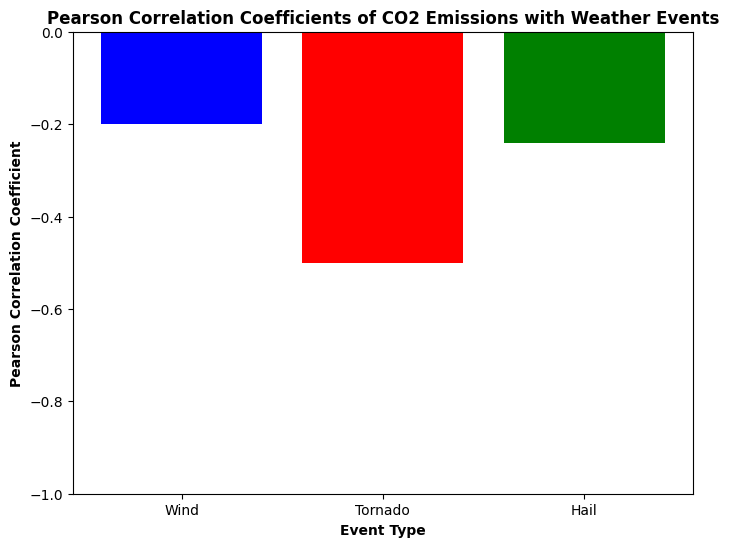

In [ ]:
import matplotlib.pyplot as plt

# Given Pearson correlation coefficients
CO2_wind_corr = -0.20
CO2_tornado_corr = -0.50
CO2_hail_corr = -0.24

# Labels for the bar chart
labels = ['Wind', 'Tornado', 'Hail']
correlations = [CO2_wind_corr, CO2_tornado_corr, CO2_hail_corr]
colors = ['blue', 'red', 'green']

# Creating the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, correlations, color=colors)

# Setting the labels and title
ax.set_xlabel('Event Type', fontweight='bold')
ax.set_ylabel('Pearson Correlation Coefficient', fontweight='bold')
ax.set_title('Pearson Correlation Coefficients of CO2 Emissions with Weather Events', fontweight='bold')

# Adjusting y-axis to show negative correlations clearly
ax.set_ylim(-1, 0)  # Setting limits from -1 to 0 to include all negative values up to -0.69

# Displaying the chart
plt.show()


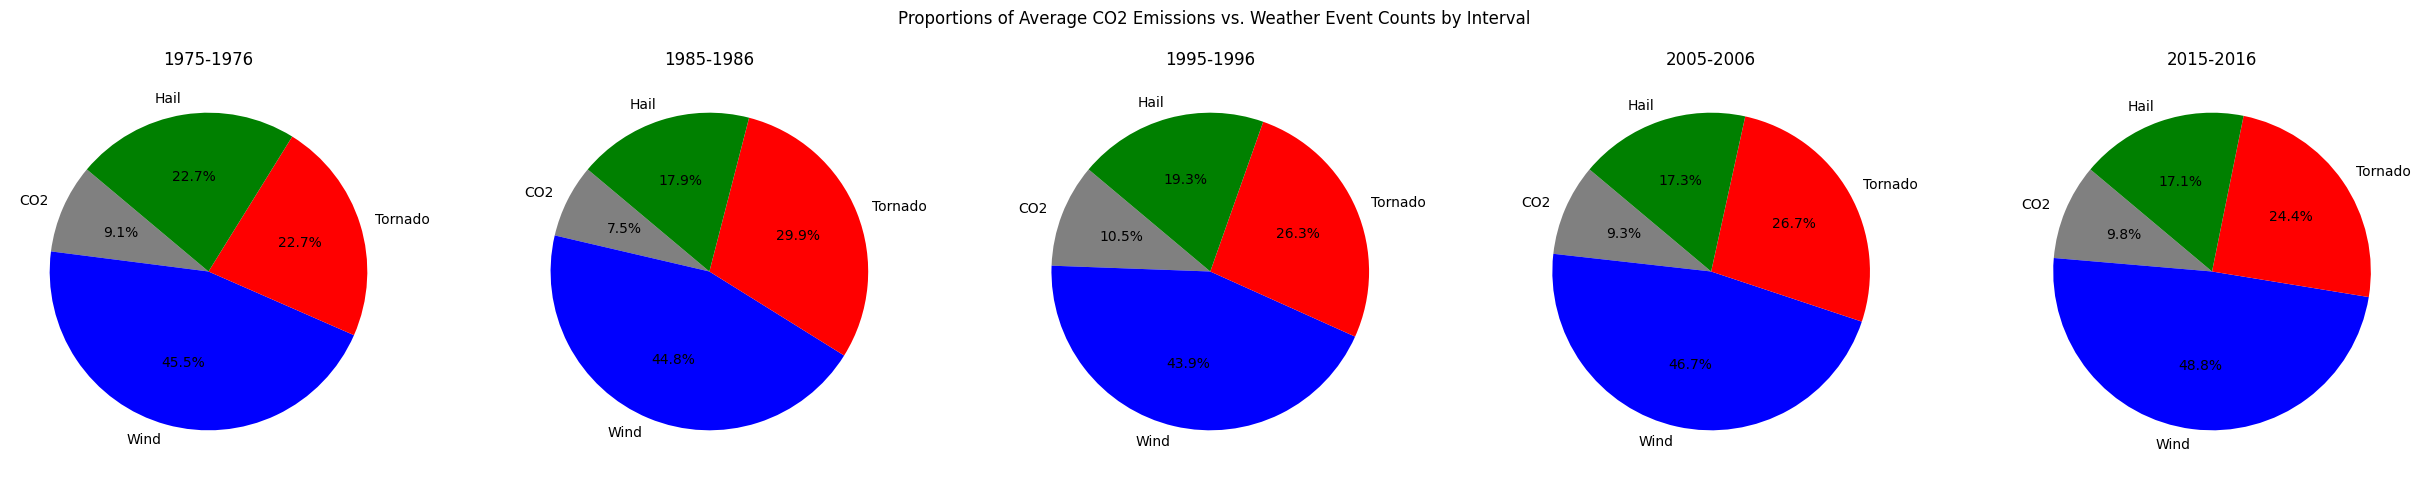

In [ ]:
import matplotlib.pyplot as plt

# Sample data
interval_labels = ['1975-1976', '1985-1986', '1995-1996', '2005-2006', '2015-2016']
co2_averages = [40, 50, 60, 70, 80]  # Placeholder CO2 averages for each interval
wind_totals =  [200, 300, 250, 350, 400] # Placeholder total wind event counts
tornado_totals = [100, 200, 150, 200, 200]  # Placeholder total tornado counts
hail_totals = [100, 120, 110, 130, 140]  # Placeholder total hail counts

# Creating pie charts for each time interval
fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Adjust figsize as needed

for i, ax in enumerate(axs):
    sizes = [co2_averages[i], wind_totals[i], tornado_totals[i], hail_totals[i]]
    labels = ['CO2', 'Wind', 'Tornado', 'Hail']
    colors = ['grey', 'blue', 'red', 'green']
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(interval_labels[i])

plt.suptitle('Proportions of Average CO2 Emissions vs. Weather Event Counts by Interval')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


<ipython-input-8-cf5407412a69>:16: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_data = pd.read_csv('1955-2022_wind.csv')


Changes in counts for 1975-1976 compared to previous interval:
Tornadoes: 0.00%
Wind events: 0.00%
Hail events: 0.00%
Changes in counts for 1985-1986 compared to previous interval:
Tornadoes: -16.31%
Wind events: 87.07%
Hail events: 179.43%
Changes in counts for 1995-1996 compared to previous interval:
Tornadoes: 64.13%
Wind events: 133.20%
Hail events: 143.31%
Changes in counts for 2005-2006 compared to previous interval:
Tornadoes: -1.03%
Wind events: 35.08%
Hail events: 81.31%
Changes in counts for 2015-2016 compared to previous interval:
Tornadoes: -8.59%
Wind events: 14.80%
Hail events: -38.20%


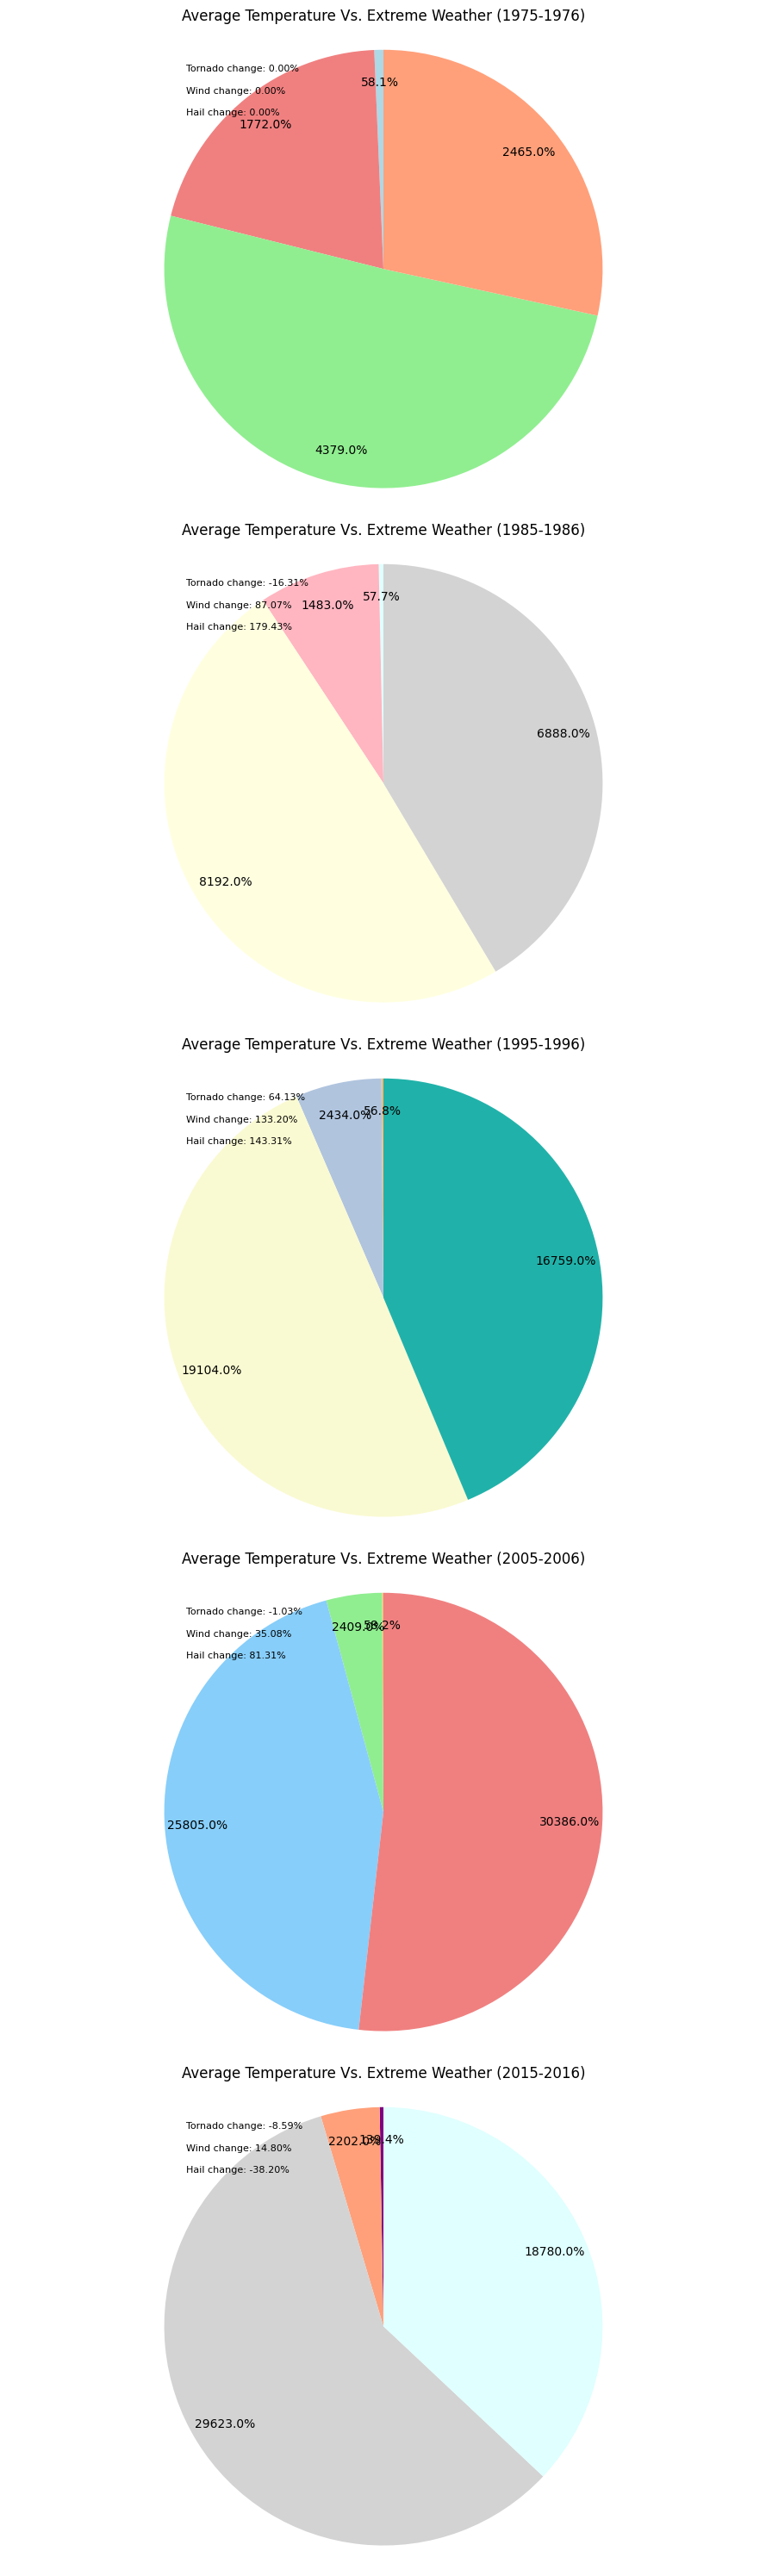

In [8]:


import matplotlib.pyplot as plt
import pandas as pd

# Define time intervals
time_intervals = [(1975, 1976), (1985, 1986), (1995, 1996), (2005, 2006), (2015, 2016)]

# List of files for temperature
files = ['united states 1975-01-01 to 1976-12-31.csv',
         'united states 1985-01-01 to 1986-12-31.csv',
         'united states 1995-01-01 to 1996-12-31.csv',
         'united states 2005-01-01 to 2006-12-31.csv',
         'unitedStates_2015-01-01_to_2016-12-31.csv']

# Load tornado, wind, and hail data
tornado_data = pd.read_csv('1950-2022_torn.csv')
wind_data = pd.read_csv('1955-2022_wind.csv')
hail_data = pd.read_csv('1955-2022_hail.csv')

# Define color palettes for each interval
color_palettes = [
    ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon'],
    ['lightcyan', 'lightpink', 'lightyellow', 'lightgrey'],
    ['#ffbb78', 'lightsteelblue', 'lightgoldenrodyellow', 'lightseagreen'],
    ['#ffbb78', 'lightgreen', 'lightskyblue', 'lightcoral'],
    ['purple', 'lightsalmon', 'lightgrey', 'lightcyan']
]

# Initialize subplots
fig, axs = plt.subplots(len(time_intervals), 1, figsize=(9, 6*len(time_intervals)))

# Loop through time intervals
for i, interval in enumerate(time_intervals):
    # Extract start and end year of the interval
    start_year, end_year = interval

    # Filter temperature data for the current interval
    df = pd.read_csv(files[i])
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    interval_temp_data = df[df['year'].between(start_year, end_year)]
    avg_temp = (9/5 * interval_temp_data['temp'] + 32).mean()

    # Filter tornado data for the current interval
    tornado_interval_data = tornado_data[tornado_data['yr'].between(start_year, end_year)]
    total_tornado = tornado_interval_data.shape[0]

    # Filter wind data for the current interval
    wind_interval_data = wind_data[wind_data['yr'].between(start_year, end_year)]
    total_wind = wind_interval_data.shape[0]

    # Filter hail data for the current interval
    hail_interval_data = hail_data[hail_data['yr'].between(start_year, end_year)]
    total_hail = hail_interval_data.shape[0]

    # Calculate the changes in counts for each category
    if i > 0:
        prev_interval = time_intervals[i - 1]
        prev_start_year, prev_end_year = prev_interval
        prev_tornado_data = tornado_data[tornado_data['yr'].between(prev_start_year, prev_end_year)]
        prev_wind_data = wind_data[wind_data['yr'].between(prev_start_year, prev_end_year)]
        prev_hail_data = hail_data[hail_data['yr'].between(prev_start_year, prev_end_year)]

        tornado_change = (total_tornado - prev_tornado_data.shape[0]) / prev_tornado_data.shape[0] * 100
        wind_change = (total_wind - prev_wind_data.shape[0]) / prev_wind_data.shape[0] * 100
        hail_change = (total_hail - prev_hail_data.shape[0]) / prev_hail_data.shape[0] * 100
    else:
        tornado_change = wind_change = hail_change = 0

    # Print the changes in counts as percentages
    print(f"Changes in counts for {start_year}-{end_year} compared to previous interval:")
    print(f"Tornadoes: {tornado_change:.2f}%")
    print(f"Wind events: {wind_change:.2f}%")
    print(f"Hail events: {hail_change:.2f}%")

    sizes = [avg_temp, total_tornado, total_wind, total_hail]

    # Create the pie chart with the specified color palette and adjust pctdistance
    wedges, texts, autotexts = axs[i].pie(sizes, colors=color_palettes[i], autopct='', startangle=90, pctdistance=0.85)

    # Print percentages for each category
    for j, autotext in enumerate(autotexts):
        autotext.set_text(f"{sizes[j]:.1f}%")

    # Add annotations for the percentage changes
    axs[i].annotate(f"Tornado change: {tornado_change:.2f}%", xy=(-0.9, 0), xytext=(-0.9, 0.9), ha='left', fontsize=8)
    axs[i].annotate(f"Wind change: {wind_change:.2f}%", xy=(-0.9, 0), xytext=(-0.9, 0.8), ha='left', fontsize=8)
    axs[i].annotate(f"Hail change: {hail_change:.2f}%", xy=(-0.9, 0), xytext=(-0.9, 0.7), ha='left', fontsize=8)

    # Equal aspect ratio ensures that pie is drawn as a circle
    axs[i].axis('equal')

    # Set title for each subplot
    axs[i].set_title(f'Average Temperature Vs. Extreme Weather ({start_year}-{end_year})')

# Show the plot
plt.tight_layout()
plt.show()


# Results: Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.

Overall, the climate variables had either a slight or moderate positive relashionship which indicates that our climate variables increase our weather variables. As shown in the ML analysis we could see an increase over the years which concludes our hypothesis is true.